In [360]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [361]:
df = pd.read_csv('usjobs_train.csv')


In [499]:
test = pd.read_csv('usjobs_test.csv')

In [362]:
pd.set_option('display.max_column',None)

In [363]:
df.head()

ID                                                Job  \
0  job_f2c807527f687b96  Part-time Reporting Business Analyst, Data & A...   
1  job_2660d4c53505af10                                         Controller   
2   sj_50358c44328ae06a                                 Sr Finance Analyst   
3  job_a087fd700e3e85f0               Senior Business Intelligence Analyst   
4  job_d2a2538a2c4d2033  Data Center Operations Analyst (Temporary Assi...   

              Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                                URL  
0             NaN  https://www.sandyhookpromise.org/  
1            0.70                                NaN  
2             NaN                                NaN  
3            0.70       https://www.richmondfed.org/  
4            0.85                                NaN

In [364]:
df.drop(['ID','URL'],axis=1,inplace=True)

In [365]:
df.head()

Job             Jobs_Group  \
0  Part-time Reporting Business Analyst, Data & A...      Financial Analyst   
1                                         Controller             Controller   
2                                 Sr Finance Analyst      Financial Analyst   
3               Senior Business Intelligence Analyst  Business Intelligence   
4  Data Center Operations Analyst (Temporary Assi...     Operations Analyst   

  Profile  Remote                                 Company  \
0     NaN  Remote           Sandy Hook Promise Foundation   
1     NaN     NaN     Building Service 32BJ Benefit Funds   
2  Senior     NaN                                     LCS   
3  Senior  Hybrid        Federal Reserve Bank of Richmond   
4     NaN  Remote  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score  
0             NaN  
1            0.70  
2             NaN  
3            0.70  
4            0.85

In [366]:
def summery(df):
    data = pd.DataFrame(index=df.columns)
    data['dtypes'] = df.dtypes
    data['counts'] = df.count()
    data['#missing'] = df.isna().sum()
    data['%missing'] = df.isna().sum()/len(df)*100
    data  = pd.concat([data,df.describe().T.drop('count',axis=1)], axis=1)
    return data

In [367]:
summery(df).style.background_gradient('YlGnBu')


In [368]:
df['Job'].value_counts()

Job
Controller                                                              1132
Accounting Manager                                                      1012
Financial Analyst                                                        883
Business Analyst                                                         630
Data Analyst                                                             533
                                                                        ... 
Data Reporting and Analytics Consultant III, Programming Programming       1
5+ Years in DCPS POWER BI APPLICATIONS ARCHITECT ENTRY - Remote            1
Strategy & Operations Manager - Data, Developer & AI Infra                 1
Research Data Analyst II                                                   1
BA with Management of Change                                               1
Name: count, Length: 17227, dtype: int64

In [369]:

df['Job'] =df['Job'].apply(lambda x: ' '.join(x.split()[:5]))



In [370]:
df.head()

Job             Jobs_Group Profile  \
0  Part-time Reporting Business Analyst, Data      Financial Analyst     NaN   
1                                  Controller             Controller     NaN   
2                          Sr Finance Analyst      Financial Analyst  Senior   
3        Senior Business Intelligence Analyst  Business Intelligence  Senior   
4   Data Center Operations Analyst (Temporary     Operations Analyst     NaN   

   Remote                                 Company  \
0  Remote           Sandy Hook Promise Foundation   
1     NaN     Building Service 32BJ Benefit Funds   
2     NaN                                     LCS   
3  Hybrid        Federal Reserve Bank of Richmond   
4  Remote  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score  
0             NaN  
1            0.70  
2             NaN  
3            0.70  
4            0.85

In [371]:
df['Job'].value_counts()

Job
Controller                                     1132
Accounting Manager                             1012
Financial Analyst                               883
Business Analyst                                630
Data Analyst                                    533
                                               ... 
Controller- Client Facing                         1
Director, Marketing Data Solutions -              1
Materials Science - Machine Learning              1
Senior Accountant/Fiscal Analyst / 61015637       1
BA with Management of Change                      1
Name: count, Length: 16813, dtype: int64

There is huge number of different job title which means it can be not so much importance for model bnulding. On the other side we have Job_group column which have good information.

In [372]:
df.drop(['Job'],axis=1,inplace=True)

In [373]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score  
0             NaN  
1            0.70  
2             NaN  
3            0.70  
4            0.85

# Visualizaion

In [374]:
import matplotlib.pyplot as plt
import seaborn as sns

def premium_barplot(plot):
    # Use a premium color palette, adjust the font scale, and set a context
    sns.set(style="whitegrid", palette="viridis", font_scale=1.2, rc={"figure.figsize": (10, 5)})
    
    # Create the bar plot
    ax = sns.barplot(x=plot, y='Mean_Salary', data=df)
    
    # Customize aesthetics
    ax.set(xlabel="X-axis Label", ylabel="Mean Salary", title="Premium Bar Plot")
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    sns.despine()  # Remove the top and right spines for cleaner appearance
    
    # Show the plot
    plt.show()

# Call the function with the desired plot variable



C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Cat

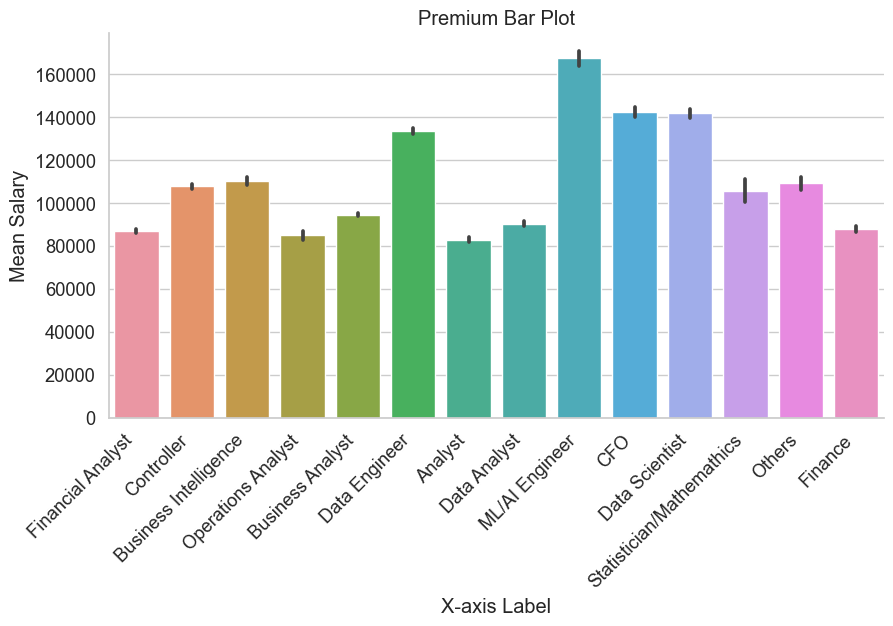

In [31]:
premium_barplot(df['Jobs_Group'])

In [375]:
def pie(df, column_names):
    for column_name in column_names:
        label_status = df[column_name].value_counts()
        transaction = label_status.index.tolist()  # Convert the index to a list
        quantity = label_status.values

        figure = px.pie(df, values=quantity, names=transaction, hole=0.6, title=f"Pie Chart for {column_name}")
        figure.show()

In [44]:
# Example usage:
pie(df, ['Jobs_Group'])


In [229]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score  
0             NaN  
1            0.70  
2             NaN  
3            0.70  
4            0.85

In [46]:
pie(df,['Profile'])

In [230]:
df['Profile'].value_counts()

Profile
Senior    6021
Lead      5761
Junior     359
Name: count, dtype: int64

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



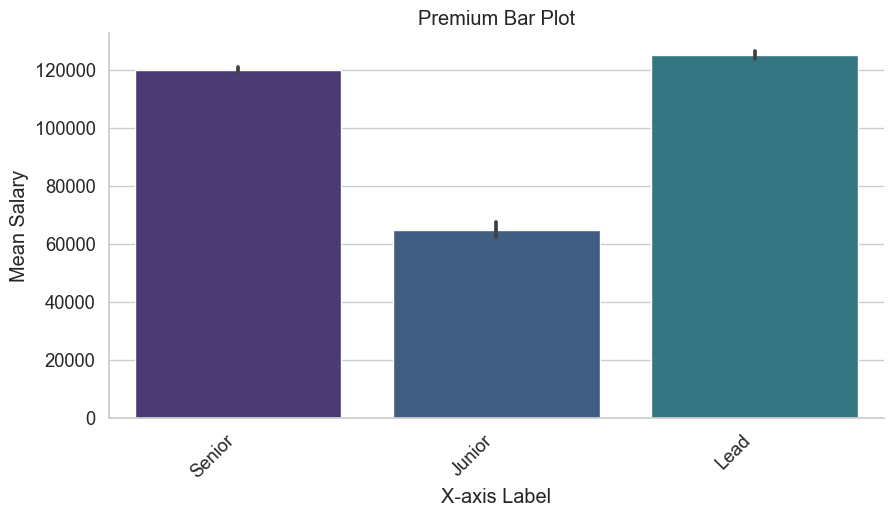

In [231]:
premium_barplot(df['Profile'])

In [232]:
df['Profile'].isnull().sum()

21107

# fill na vaues of Profile columns by using Mean_Salary values

In [376]:
mask = (df['Mean_Salary'] >= 0) & (df['Mean_Salary'] <= 60000)
df.loc[mask & df['Profile'].isnull(), 'Profile'] = 'Junior'

In [377]:
df['Profile'].isnull().sum()

18029

In [378]:
mask1 = (df['Mean_Salary'] >= 61000) & (df['Mean_Salary'] <= 120000)
df.loc[mask1 & df['Profile'].isnull(), 'Profile'] = 'Senior'

In [379]:
df.shape

(33248, 18)

In [380]:
df['Profile'].isnull().sum()

4463

In [381]:
df['Profile'] = df['Profile'].fillna('Lead')

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



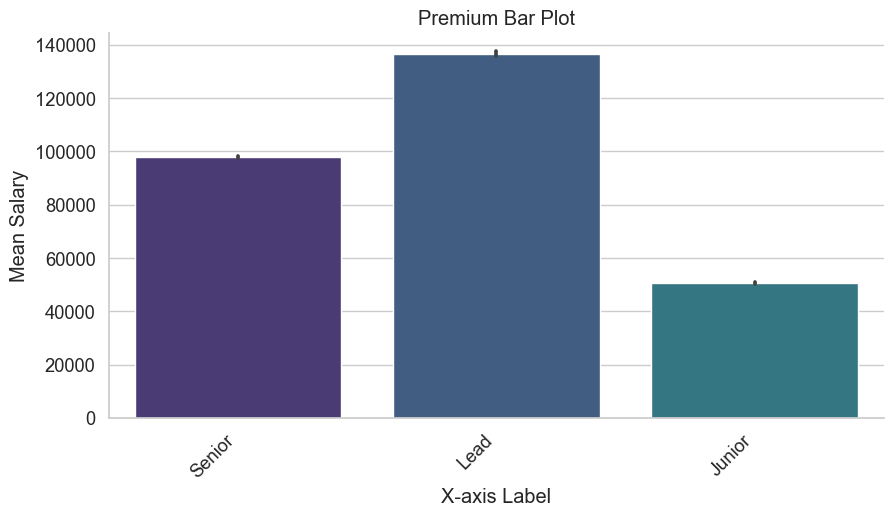

In [240]:
premium_barplot(df['Profile'])

In [241]:
df[['Profile','Mean_Salary']]

Profile  Mean_Salary
0      Senior   115000.000
1        Lead   185000.000
2      Senior    84500.000
3      Senior   111625.000
4      Senior   102690.400
...       ...          ...
33243  Junior    47206.495
33244  Senior    79741.000
33245  Senior   119908.000
33246  Senior   115000.000
33247    Lead   155000.000

[33248 rows x 2 columns]

In [66]:
pie(df,['Profile'])

In [242]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score  
0             NaN  
1            0.70  
2             NaN  
3            0.70  
4            0.85

In [68]:
pie(df,['Remote'])

In [243]:
df['Remote'].value_counts()

Remote
Remote    10578
Hybrid     3351
Name: count, dtype: int64

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



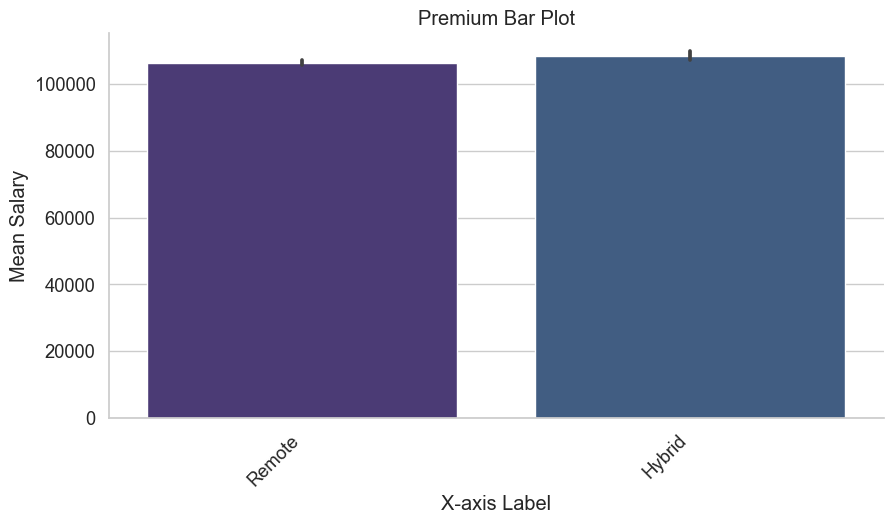

In [70]:
premium_barplot(df['Remote'])

In [244]:
df[['Remote','Mean_Salary']]

Remote  Mean_Salary
0      Remote   115000.000
1         NaN   185000.000
2         NaN    84500.000
3      Hybrid   111625.000
4      Remote   102690.400
...       ...          ...
33243     NaN    47206.495
33244     NaN    79741.000
33245     NaN   119908.000
33246     NaN   115000.000
33247     NaN   155000.000

[33248 rows x 2 columns]

In [245]:
df['Remote'].isnull().sum()

19319

Fill na vlaues of Remote column with Remote 50% of values and 50% with Hybride

In [382]:
import numpy as np

# Assuming df is your DataFrame and 'Profile' is the column of interest
mask2 = df['Remote'].isnull()

# Generate a random array of True and False with a 50% probability for each
random_mask = np.random.choice([True, False], size=mask2.sum(), p=[0.5, 0.5])

# Use the random mask to fill NaN values with 'Remote' and 'Hybrid'
df.loc[mask2, 'Remote'] = np.where(random_mask, 'Remote', 'Hybrid')


In [383]:
df.shape

(33248, 18)

In [500]:
import numpy as np

# Assuming df is your DataFrame and 'Profile' is the column of interest
mask2 = test['Remote'].isnull()

# Generate a random array of True and False with a 50% probability for each
random_mask = np.random.choice([True, False], size=mask2.sum(), p=[0.5, 0.5])

# Use the random mask to fill NaN values with 'Remote' and 'Hybrid'
test.loc[mask2, 'Remote'] = np.where(random_mask, 'Remote', 'Hybrid')

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



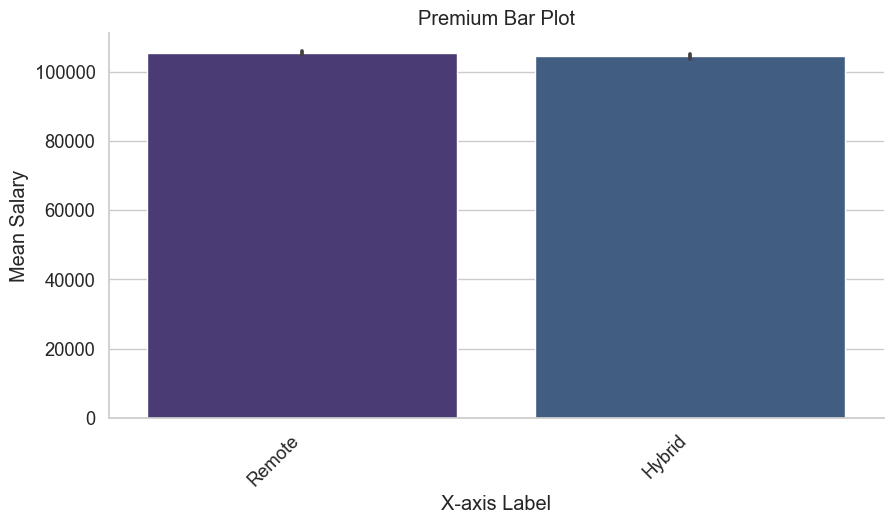

In [75]:
premium_barplot(df['Remote'])

In [249]:
df['Remote'].isnull().sum()

0

In [250]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score  
0             NaN  
1            0.70  
2             NaN  
3            0.70  
4            0.85

In [251]:
df['Company'].value_counts()

Company
Booz Allen Hamilton                                   233
Amazon.com Services LLC                               221
Citi                                                  191
JPMorgan Chase & Co                                   142
CVS Health                                            141
                                                     ... 
The Arthur Home (Skilled Nursing & Rehabilitation)      1
The Marvin Group                                        1
Hampton Roads ABA llc                                   1
Southeast Texas Regional Advisory Council               1
NYS Bridge Authority                                    1
Name: count, Length: 13995, dtype: int64

In [81]:
top_n = 10  # Choose the top N companies
top_companies = df['Company'].value_counts().nlargest(top_n).index
df['Company_TopN'] = np.where(df['Company'].isin(top_companies), df['Company'], 'Other')


In [82]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Hybrid   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score Company_TopN  
0             NaN        Other  
1            0.70        Other  
2             NaN        Other  
3            0.70        Other  
4            0.85        Other

In [83]:
frequency_threshold = 20  # Choose a frequency threshold
frequent_companies = df['Company'].value_counts()[df['Company'].value_counts() > frequency_threshold].index
df['Company_Frequent'] = np.where(df['Company'].isin(frequent_companies), df['Company'], 'Other')


In [84]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Hybrid   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score Company_TopN Company_Frequent  
0             NaN        Other            Other  
1            0.70        Other            Other  
2             NaN        Other            Other  
3            0.70        Other            Other  
4            0.85        Other            Other

In [88]:
df['Company_TopN'].shape

(33248,)

In [89]:
df['Company_Frequent'].value_counts()

Company_Frequent
Other                                           26748
Booz Allen Hamilton                               233
Amazon.com Services LLC                           221
Citi                                              191
JPMorgan Chase & Co                               142
                                                ...  
T-Mobile                                           21
US Department of the Air Force - Agency Wide       21
TekwissenGroup                                     21
State of Maryland                                  21
Procter & Gamble                                   21
Name: count, Length: 144, dtype: int64

In [90]:
# Assuming df is your DataFrame
company_names = df['Company'].unique()
print(company_names)


['Sandy Hook Promise Foundation' 'Building Service 32BJ Benefit Funds'
 'LCS' ... 'Denver Zoological Foundation' 'Yavapai County Human Resources'
 'NYS Bridge Authority']


In [91]:
# Assuming df is your DataFrame
unique_company_names = df['Company'].unique().tolist()


In [386]:
import pandas as pd

# Assuming df is your DataFrame and 'Company' is the column with company names
df['Cleaned_Company'] = df['Company'].str.replace(r"\(.*\)", "")  # Remove parentheses and content
df['Cleaned_Company'] = df['Cleaned_Company'].str.replace(r"\bInc\b", "Inc.")  # Standardize 'Inc'

# Convert to lowercase (or uppercase) for consistency
df['Cleaned_Company'] = df['Cleaned_Company'].str.lower()

# Display the cleaned DataFrame
print(df[['Company', 'Cleaned_Company']])



                                      Company  \
0               Sandy Hook Promise Foundation   
1         Building Service 32BJ Benefit Funds   
2                                         LCS   
3            Federal Reserve Bank of Richmond   
4      Los Angeles County Office of Education   
...                                       ...   
33243          Yavapai County Human Resources   
33244                            Pinal County   
33245            US Naval Air Systems Command   
33246                           Source Mantra   
33247                    NYS Bridge Authority   

                              Cleaned_Company  
0               sandy hook promise foundation  
1         building service 32bj benefit funds  
2                                         lcs  
3            federal reserve bank of richmond  
4      los angeles county office of education  
...                                       ...  
33243          yavapai county human resources  
33244                      

In [524]:
import pandas as pd

# Assuming df is your DataFrame and 'Company' is the column with company names
test['Cleaned_Company'] = test['Company'].str.replace(r"\(.*\)", "")  # Remove parentheses and content
test['Cleaned_Company'] = test['Cleaned_Company'].str.replace(r"\bInc\b", "Inc.")  # Standardize 'Inc'

# Convert to lowercase (or uppercase) for consistency
test['Cleaned_Company'] = test['Cleaned_Company'].str.lower()

# Display the cleaned DataFrame
print(test[['Company', 'Cleaned_Company']])



                                                 Company  \
0                        Dryden Mutual Insurance Company   
1                                       Esphera Concepts   
2           Volkswagen Group of America - Chattanooga...   
3                                     The New York Times   
4      Metropolitan Government of Nashville & Davidso...   
...                                                  ...   
22161                                   The Warren Group   
22162                      Grocery Outlet Bargain Market   
22163                              Avis Technologies LLC   
22164                             University of Colorado   
22165                                    The Cigna Group   

                                         Cleaned_Company  
0                        dryden mutual insurance company  
1                                       esphera concepts  
2           volkswagen group of america - chattanooga...  
3                                     the n

In [390]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Hybrid   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  
0             NaN           sandy hook promise foundation  
1            0.70     building service 32bj benefit funds  
2             NaN                                     lcs  
3            0.70        federal reserve bank of richmond  
4            0.85  los angeles county office of education

In [393]:
# df.drop(['Company','Company_TopN','Company_Frequent'],axis=1,inplace=True)

In [392]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Hybrid   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company  \
0           Sandy Hook Promise Foundation   
1     Building Service 32BJ Benefit Funds   
2                                     LCS   
3        Federal Reserve Bank of Richmond   
4  Los Angeles County Office of Education   

                                   Location      City State Frecuency_Salary  \
0                                    Remote       NaN   NaN             hour   
1         New York, NY 10013 (Tribeca area)  New York    NY             year   
2                                       NaN       NaN   NaN             year   
3  Richmond, VA 23219 (Central Office area)  Richmond    VA             year   
4              Downey, CA 90242+1 ubicación    Downey    CA             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  
0             NaN           sandy hook promise foundation  
1            0.70     building service 32bj benefit funds  
2             NaN                                     lcs  
3            0.70        federal reserve bank of richmond  
4            0.85  los angeles county office of education

In [254]:
df['Cleaned_Company'].unique()

array(['sandy hook promise foundation',
       'building service 32bj benefit funds', 'lcs', ...,
       'denver zoological foundation', 'yavapai county human resources',
       'nys bridge authority'], dtype=object)

In [104]:
df['Cleaned_Company'] = df['Cleaned_Company'].replace('...',np.nan)

In [255]:
df['Cleaned_Company'].unique()

array(['sandy hook promise foundation',
       'building service 32bj benefit funds', 'lcs', ...,
       'denver zoological foundation', 'yavapai county human resources',
       'nys bridge authority'], dtype=object)

In [394]:
# Assuming your DataFrame is named df
df['Cleaned_Company'] = df['Cleaned_Company'].astype(str)

In [502]:
test['Cleaned_Company'] = test['Cleaned_Company'].astype(str)

In [503]:
print(df.shape)
print(test.shape)

(33248, 14)
(22166, 21)


In [265]:
df['Cleaned_Company'].value_counts()

Cleaned_Company
booz allen hamilton                                   233
amazon.com services llc                               221
citi                                                  191
jpmorgan chase & co                                   142
cvs health                                            141
                                                     ... 
xduce                                                   1
athena consulting group                                 1
stanford federal credit union                           1
the arthur home (skilled nursing & rehabilitation)      1
nys bridge authority                                    1
Name: count, Length: 13879, dtype: int64

In [268]:
test.head()

ID                                      Job  \
544   job_695a5e47e5c18a34  Analyst, Finance Operations (Fall 2024)   
705   job_695ee77ffe792ab7                             Data Analyst   
1156  job_4456853f60fff60e         Sr. Architect, Data Science / AI   
3216  job_1b2a91d9f6f0e8fd                         Business Analyst   
3801  job_d2e49fe18bb20cdb           Lead Machine Learning Engineer   

             Jobs_Group Profile  Remote Company  \
544   Financial Analyst     NaN  Remote      K1   
705        Data Analyst     NaN  Hybrid      NY   
1156     Data Scientist  Senior  Remote      f5   
3216   Business Analyst     NaN  Remote      HP   
3801     ML/AI Engineer    Lead  Remote      2U   

                                        Location             City State  \
544                    Manhattan Beach, CA 90266  Manhattan Beach    CA   
705   Los Angeles, CA 90003 (Vermont Vista area)      Los Angeles    CA   
1156           Seattle, WA 98119 (Interbay area)          Seattle    WA   
3216                 Manhattan, NY+5 ubicaciones        Manhattan    NY   
3801                                      Remote              NaN   NaN   

     Frecuency_Salary                                    Skills  \
544              year                              ['Bachelor']   
705              hour              ['AWS', 'Salesforce', 'SQL']   
1156             year               ['Artificial Intelligence']   
3216             year                              ['Bachelor']   
3801             year  ['Python', 'Docker', 'Machine Learning']   

                      Sector            Sector_Group Revenue Employee  \
544                      NaN                     NaN     NaN      NaN   
705          Private Housing             Real Estate     NaN      NaN   
1156  Information Technology  Information Technology     NaN      NaN   
3216  Information Technology  Information Technology    XXXL     XXXL   
3801  Information Technology  Information Technology       M       XL   

      Company_Score  Reviews                   Director  Director_Score  \
544             3.0      3.0                        NaN             NaN   
705             4.2     58.0                        NaN             NaN   
1156            3.3      4.0                        NaN             NaN   
3216            NaN      NaN              Enrique Lores            0.78   
3801            3.2    124.0  Christopher "Chip" Paucek            0.73   

                            URL Cleaned_Company  
544                         NaN              k1  
705                         NaN              ny  
1156                        NaN              f5  
3216  https://jobs.hp.com/en-us              hp  
3801         http://www.2u.com/              2u

In [119]:
df.head()

Jobs_Group Profile  Remote                               Location  \
1056    ML/AI Engineer  Senior  Hybrid  Vancouver, WA 98683 (Bennington area)   
1506  Business Analyst    Lead  Hybrid      Seattle, WA 98119 (Interbay area)   
1812    Data Scientist    Lead  Remote                          Maplewood, MN   
1965    ML/AI Engineer    Lead  Remote                              Minnesota   
2765      Data Analyst  Senior  Hybrid                            Seattle, WA   

           City State Frecuency_Salary  Mean_Salary  \
1056  Vancouver    WA             year      99500.0   
1506    Seattle    WA             year     129590.0   
1812  Maplewood    MN             year     128452.5   
1965        NaN    MN             year     148261.5   
2765    Seattle    WA             year      83889.0   

                                                 Skills  \
1056  ['English', 'Bachelor', 'Artificial Intelligen...   
1506                                       ['Bachelor']   
1812                                                 []   
1965  ['Python', 'Master', 'PHP', 'Java', 'Bachelor'...   
2765  ['SQL', 'Tableau', 'Snowflake', 'Salesforce', ...   

                      Sector            Sector_Group Revenue Employee  \
1056  Information Technology  Information Technology    XXXL     XXXL   
1506  Information Technology  Information Technology     NaN      NaN   
1812           Manufacturing   Product Manufacturing    XXXL     XXXL   
1965           Manufacturing   Product Manufacturing    XXXL     XXXL   
2765  Information Technology  Information Technology     NaN      NaN   

      Company_Score  Reviews       Director  Director_Score Cleaned_Company  
1056            NaN      NaN  Enrique Lores            0.78              hp  
1506            3.3      4.0            NaN             NaN              f5  
1812            3.9   5146.0     Mike Roman            0.79              3m  
1965            3.9   5146.0     Mike Roman            0.79              3m  
2765            3.3      4.0            NaN             NaN              f5

In [504]:
df.drop(['Location','State'],axis=1,inplace=True)


KeyError: "['Location', 'State'] not found in axis"

In [505]:
test.drop(['Location','State'],axis=1,inplace=True)

In [341]:
df.head()

ID                                                Job  \
0  job_f2c807527f687b96  Part-time Reporting Business Analyst, Data & A...   
1  job_2660d4c53505af10                                         Controller   
2   sj_50358c44328ae06a                                 Sr Finance Analyst   
3  job_a087fd700e3e85f0               Senior Business Intelligence Analyst   
4  job_d2a2538a2c4d2033  Data Center Operations Analyst (Temporary Assi...   

              Jobs_Group Profile  Remote  \
0      Financial Analyst     NaN  Remote   
1             Controller     NaN     NaN   
2      Financial Analyst  Senior     NaN   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst     NaN  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation       NaN             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS       NaN             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                                URL  
0             NaN  https://www.sandyhookpromise.org/  
1            0.70                                NaN  
2             NaN                                NaN  
3            0.70       https://www.richmondfed.org/  
4            0.85                                NaN

In [271]:
df.isnull().sum()

Jobs_Group              0
Profile                 0
Remote                  0
Company                 9
City                 3824
Frecuency_Salary        0
Mean_Salary             0
Skills                  0
Sector               7214
Sector_Group         7214
Revenue             18318
Employee            12799
Company_Score        8762
Reviews              8762
Director            20785
Director_Score      21924
Cleaned_Company         0
dtype: int64

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



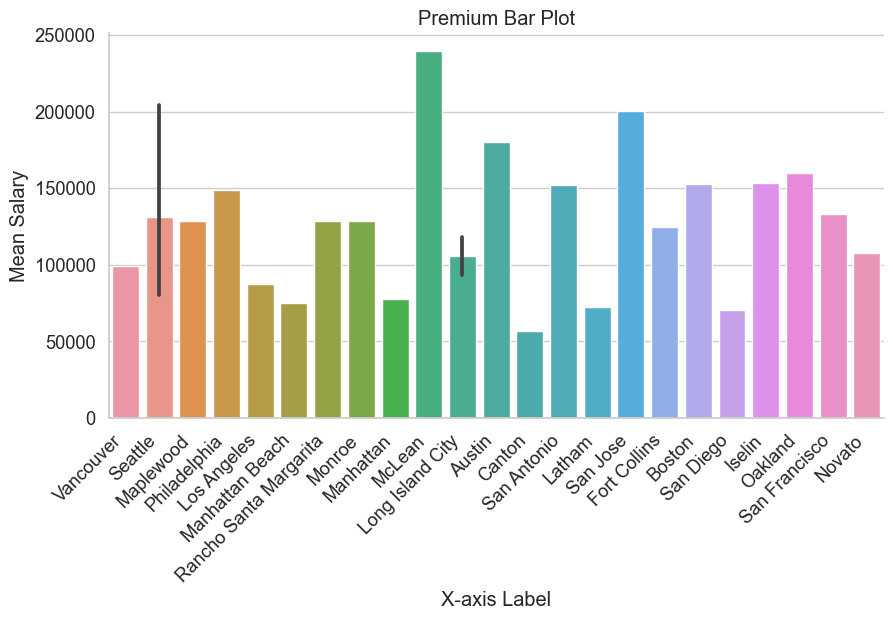

In [124]:
premium_barplot(df['City'])

In [398]:
df['City'] = df['City'].fillna(df['City'].mode()[0])

In [399]:
# pie(df,['City'])

In [400]:
test['City'] = test['City'].fillna(test['City'].mode()[0])

In [277]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation  New York             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS  New York             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                                             Skills  \
0     115000.0                         ['Salesforce', 'Bachelor']   
1     185000.0  ['SQL', 'Master', 'Dynamics 365', 'Snowflake',...   
2      84500.0                      ['Word', 'Bachelor', 'Excel']   
3     111625.0  ['PowerPoint', 'Power BI', 'Tableau', 'Word', ...   
4     102690.4                                         ['Office']   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  
0             NaN           sandy hook promise foundation  
1            0.70     building service 32bj benefit funds  
2             NaN                                     lcs  
3            0.70        federal reserve bank of richmond  
4            0.85  los angeles county office of education

In [278]:
df['Frecuency_Salary'].isnull().sum()

0

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



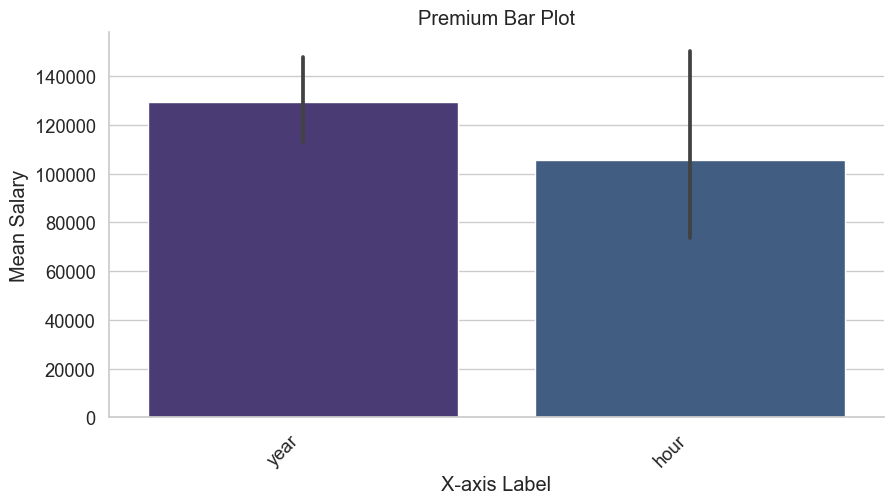

In [130]:
premium_barplot(df['Frecuency_Salary'])

In [279]:
df['Skills'].unique()

array(["['Salesforce', 'Bachelor']",
       "['SQL', 'Master', 'Dynamics 365', 'Snowflake', 'AWS', 'Qlik', 'CFA', 'Azure', 'CPA', 'Bachelor']",
       "['Word', 'Bachelor', 'Excel']", ...,
       "['PowerPoint', 'MBA', 'Bachelor']",
       "['Python', 'Power BI', 'SQL', 'Tableau', 'AWS', 'MongoDB', 'Qlik', 'Java', 'Cognos', 'Azure', 'Bachelor', 'Oracle', 'R', 'Office']",
       "['Power BI', 'Tableau', 'SQL', 'SSRS', 'Excel', 'Sisense']"],
      dtype=object)

In [401]:
import ast

# Assuming your DataFrame is named df
df['Skills'] = df['Skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
df['Simplified_Skills'] = df['Skills'].apply(lambda skills: ', '.join(skills) if skills else 'No Skills')

# Now, 'Simplified_Skills' column contains a comma-separated string of skills or 'No Skills' if the list is empty


In [506]:
import ast

# Assuming your DataFrame is named df
test['Skills'] = test['Skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else [])
test['Simplified_Skills'] = test['Skills'].apply(lambda skills: ', '.join(skills) if skills else 'No Skills')

# Now, 'Simplified_Skills' column contains a comma-separated string of skills or 'No Skills' if the list is empty


In [282]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation  New York             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS  New York             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                                             Skills  \
0     115000.0                             [Salesforce, Bachelor]   
1     185000.0  [SQL, Master, Dynamics 365, Snowflake, AWS, Ql...   
2      84500.0                            [Word, Bachelor, Excel]   
3     111625.0  [PowerPoint, Power BI, Tableau, Word, Excel, B...   
4     102690.4                                           [Office]   

                             Sector             Sector_Group Revenue Employee  \
0  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN       XS   
1  NGOs and Nonprofit Organizations  Nonprofit Organizations     NaN        M   
2        Personal Consumer Services                    Sales    XXXS     XXXS   
3       Banking and Credit Services                  Finance     XXL       XL   
4       State and Regional Agencies               Government     NaN       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  \
0             NaN           sandy hook promise foundation   
1            0.70     building service 32bj benefit funds   
2             NaN                                     lcs   
3            0.70        federal reserve bank of richmond   
4            0.85  los angeles county office of education   

                                   Simplified_Skills  
0                               Salesforce, Bachelor  
1  SQL, Master, Dynamics 365, Snowflake, AWS, Qli...  
2                              Word, Bachelor, Excel  
3  PowerPoint, Power BI, Tableau, Word, Excel, Ba...  
4                                             Office

In [283]:
df['Simplified_Skills'].unique()

array(['Salesforce, Bachelor',
       'SQL, Master, Dynamics 365, Snowflake, AWS, Qlik, CFA, Azure, CPA, Bachelor',
       'Word, Bachelor, Excel', ..., 'PowerPoint, MBA, Bachelor',
       'Python, Power BI, SQL, Tableau, AWS, MongoDB, Qlik, Java, Cognos, Azure, Bachelor, Oracle, R, Office',
       'Power BI, Tableau, SQL, SSRS, Excel, Sisense'], dtype=object)

In [403]:
df.drop(['Skills'],axis=1,inplace=True)


In [507]:

test.drop(['Skills'],axis=1,inplace=True)

In [285]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation  New York             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS  New York             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                            Sector             Sector_Group  \
0     115000.0  NGOs and Nonprofit Organizations  Nonprofit Organizations   
1     185000.0  NGOs and Nonprofit Organizations  Nonprofit Organizations   
2      84500.0        Personal Consumer Services                    Sales   
3     111625.0       Banking and Credit Services                  Finance   
4     102690.4       State and Regional Agencies               Government   

  Revenue Employee  Company_Score  Reviews  \
0     NaN       XS            4.2     20.0   
1     NaN        M            3.5     58.0   
2    XXXS     XXXS            3.4     88.0   
3     XXL       XL            3.8     30.0   
4     NaN       XL            4.2    186.0   

                               Director  Director_Score  \
0                                   NaN             NaN   
1  Peter Goldberger, Executive Director            0.70   
2                                   NaN             NaN   
3                            Tom Barkin            0.70   
4                          Debra Duardo            0.85   

                          Cleaned_Company  \
0           sandy hook promise foundation   
1     building service 32bj benefit funds   
2                                     lcs   
3        federal reserve bank of richmond   
4  los angeles county office of education   

                                   Simplified_Skills  
0                               Salesforce, Bachelor  
1  SQL, Master, Dynamics 365, Snowflake, AWS, Qli...  
2                              Word, Bachelor, Excel  
3  PowerPoint, Power BI, Tableau, Word, Excel, Ba...  
4                                             Office

In [286]:
df['Sector'].isnull().sum()

7214

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



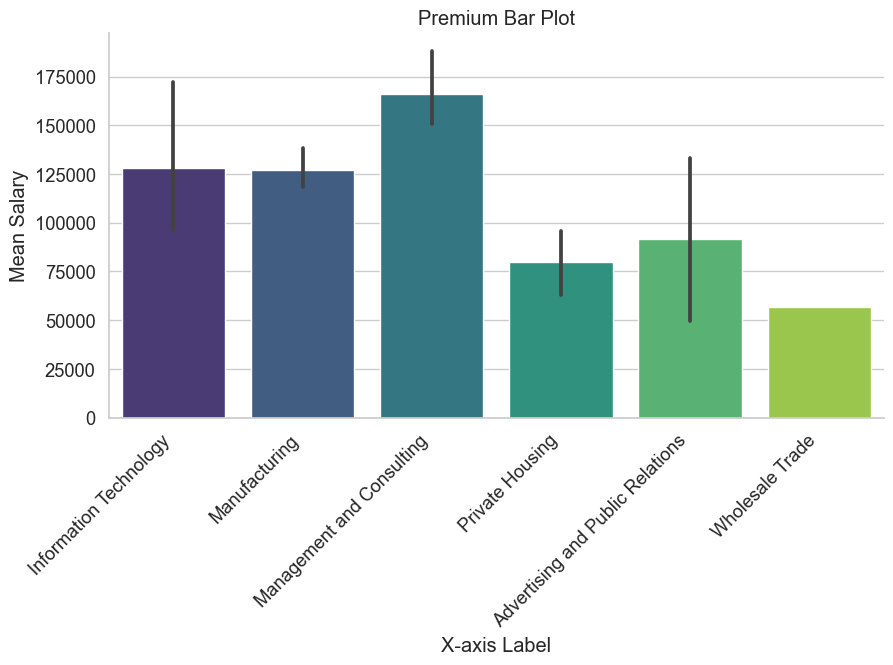

In [145]:
premium_barplot(df['Sector'])

In [404]:
df['Sector']  = df['Sector'].fillna(df['Sector'].mode()[0])


In [508]:
test['Sector'] = test['Sector'].fillna(test['Sector'].mode()[0])

In [405]:
df.drop(['Sector_Group'],axis=1,inplace=True)


In [509]:
test.drop(['Sector_Group'],axis=1,inplace=True)

In [148]:
df.head()

Jobs_Group Profile  Remote       City Frecuency_Salary  \
1056    ML/AI Engineer  Senior  Hybrid  Vancouver             year   
1506  Business Analyst    Lead  Hybrid    Seattle             year   
1812    Data Scientist    Lead  Remote  Maplewood             year   
1965    ML/AI Engineer    Lead  Remote    Seattle             year   
2765      Data Analyst  Senior  Hybrid    Seattle             year   

      Mean_Salary                  Sector Revenue Employee  Company_Score  \
1056      99500.0  Information Technology    XXXL     XXXL            NaN   
1506     129590.0  Information Technology     NaN      NaN            3.3   
1812     128452.5           Manufacturing    XXXL     XXXL            3.9   
1965     148261.5           Manufacturing    XXXL     XXXL            3.9   
2765      83889.0  Information Technology     NaN      NaN            3.3   

      Reviews       Director  Director_Score Cleaned_Company  \
1056      NaN  Enrique Lores            0.78              hp   
1506      4.0            NaN             NaN              f5   
1812   5146.0     Mike Roman            0.79              3m   
1965   5146.0     Mike Roman            0.79              3m   
2765      4.0            NaN             NaN              f5   

                                      Simplified_Skills  
1056         English, Bachelor, Artificial Intelligence  
1506                                           Bachelor  
1812                                          No Skills  
1965  Python, Master, PHP, Java, Bachelor, R, Artifi...  
2765  SQL, Tableau, Snowflake, Salesforce, Bachelor,...

In [149]:
pie(df,['Sector'])

In [289]:
df['Revenue'].isnull().sum()

18318

In [290]:
df['Revenue'].unique()

array([nan, 'XXXS', 'XXL', 'XL', 'XXS', 'XXXL', 'S', 'M', 'L', 'XS'],
      dtype=object)

In [292]:
pie(df,['Revenue'])

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



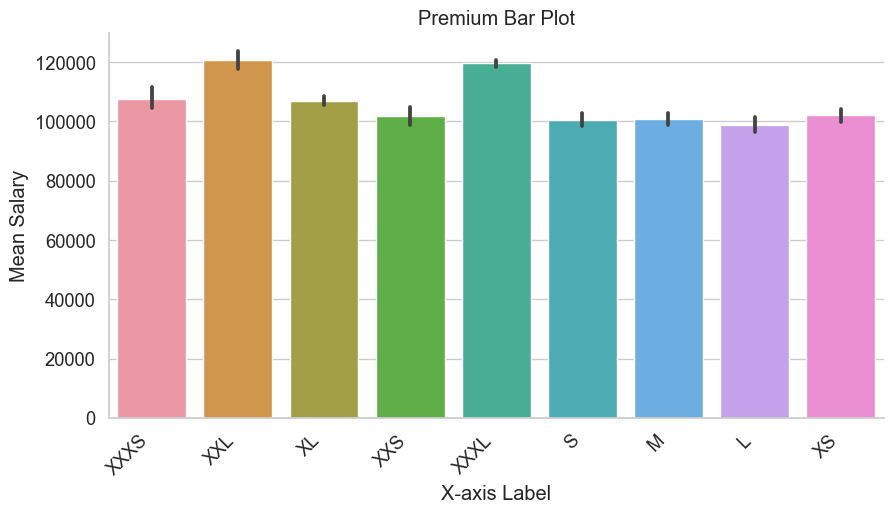

In [293]:
premium_barplot(df['Revenue'])

In [406]:
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mode()[0])


In [510]:
test['Revenue'] = test['Revenue'].fillna(test['Revenue'].mode()[0])

In [156]:
df.head()

Jobs_Group Profile  Remote       City Frecuency_Salary  \
1056    ML/AI Engineer  Senior  Hybrid  Vancouver             year   
1506  Business Analyst    Lead  Hybrid    Seattle             year   
1812    Data Scientist    Lead  Remote  Maplewood             year   
1965    ML/AI Engineer    Lead  Remote    Seattle             year   
2765      Data Analyst  Senior  Hybrid    Seattle             year   

      Mean_Salary                  Sector Employee  Company_Score  Reviews  \
1056      99500.0  Information Technology     XXXL            NaN      NaN   
1506     129590.0  Information Technology      NaN            3.3      4.0   
1812     128452.5           Manufacturing     XXXL            3.9   5146.0   
1965     148261.5           Manufacturing     XXXL            3.9   5146.0   
2765      83889.0  Information Technology      NaN            3.3      4.0   

           Director  Director_Score Cleaned_Company  \
1056  Enrique Lores            0.78              hp   
1506            NaN             NaN              f5   
1812     Mike Roman            0.79              3m   
1965     Mike Roman            0.79              3m   
2765            NaN             NaN              f5   

                                      Simplified_Skills  
1056         English, Bachelor, Artificial Intelligence  
1506                                           Bachelor  
1812                                          No Skills  
1965  Python, Master, PHP, Java, Bachelor, R, Artifi...  
2765  SQL, Tableau, Snowflake, Salesforce, Bachelor,...

In [295]:
pie(df,['Employee'])

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



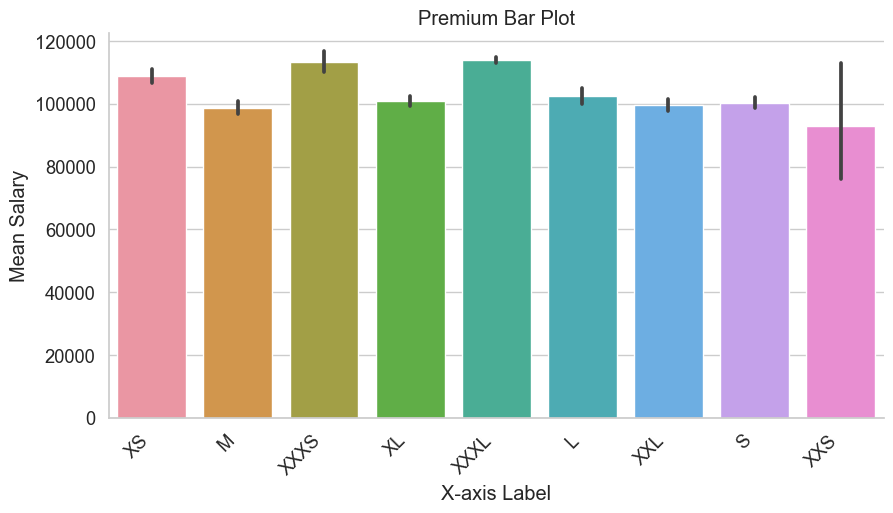

In [296]:
premium_barplot(df['Employee'])

In [297]:
df['Employee'].isnull().sum()

12799

In [407]:
df['Employee'] = df['Employee'].fillna(df['Employee'].mode()[0])


In [511]:
test['Employee'] = test['Employee'].fillna(df['Employee'].mode()[0])

In [299]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation  New York             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS  New York             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                            Sector Revenue Employee  \
0     115000.0  NGOs and Nonprofit Organizations    XXXL       XS   
1     185000.0  NGOs and Nonprofit Organizations    XXXL        M   
2      84500.0        Personal Consumer Services    XXXS     XXXS   
3     111625.0       Banking and Credit Services     XXL       XL   
4     102690.4       State and Regional Agencies    XXXL       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  \
0             NaN           sandy hook promise foundation   
1            0.70     building service 32bj benefit funds   
2             NaN                                     lcs   
3            0.70        federal reserve bank of richmond   
4            0.85  los angeles county office of education   

                                   Simplified_Skills  
0                               Salesforce, Bachelor  
1  SQL, Master, Dynamics 365, Snowflake, AWS, Qli...  
2                              Word, Bachelor, Excel  
3  PowerPoint, Power BI, Tableau, Word, Excel, Ba...  
4                                             Office

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



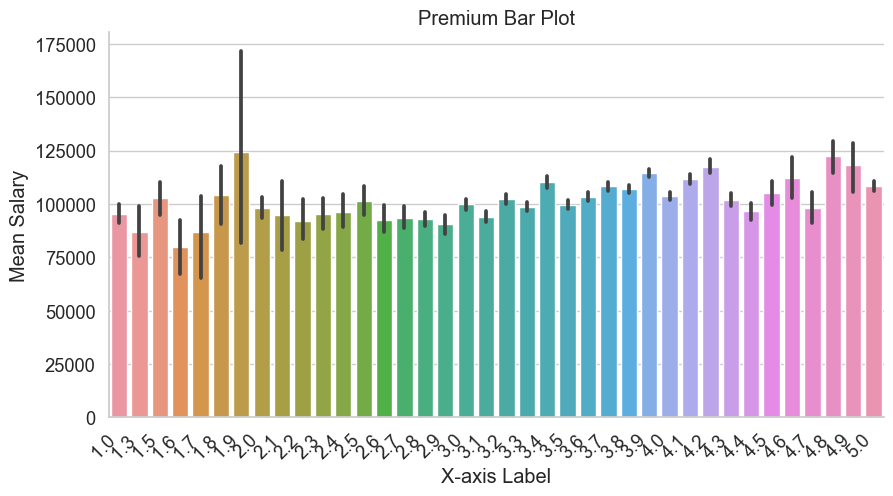

In [300]:
premium_barplot(df['Company_Score'])

In [164]:
pie(df,['Company_Score'])

In [301]:
df['Company_Score'].dtypes

dtype('float64')

In [302]:
df['Company_Score'].isnull().sum()

8762

In [408]:
df['Company_Score'] = df['Company_Score'].fillna(df['Company_Score'].median())


In [512]:
test['Company_Score'] = test['Company_Score'].fillna(test['Company_Score'].median())

In [305]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation  New York             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS  New York             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                            Sector Revenue Employee  \
0     115000.0  NGOs and Nonprofit Organizations    XXXL       XS   
1     185000.0  NGOs and Nonprofit Organizations    XXXL        M   
2      84500.0        Personal Consumer Services    XXXS     XXXS   
3     111625.0       Banking and Credit Services     XXL       XL   
4     102690.4       State and Regional Agencies    XXXL       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  \
0             NaN           sandy hook promise foundation   
1            0.70     building service 32bj benefit funds   
2             NaN                                     lcs   
3            0.70        federal reserve bank of richmond   
4            0.85  los angeles county office of education   

                                   Simplified_Skills  
0                               Salesforce, Bachelor  
1  SQL, Master, Dynamics 365, Snowflake, AWS, Qli...  
2                              Word, Bachelor, Excel  
3  PowerPoint, Power BI, Tableau, Word, Excel, Ba...  
4                                             Office

In [306]:
df['Reviews'].unique()

array([  20.,   58.,   88., ..., 8492., 4732., 3010.])

In [308]:
# premium_barplot(df['Reviews'])

In [309]:
df['Reviews'].value_counts()

Reviews
1.0       1503
2.0        846
4.0        540
3.0        530
5.0        441
          ... 
2101.0       1
2127.0       1
192.0        1
4133.0       1
3010.0       1
Name: count, Length: 1380, dtype: int64

In [310]:
df['Reviews'].isnull().sum()

8762

In [176]:
pie(df,['Reviews'])

In [409]:
df['Reviews'] = df['Reviews'].fillna(df['Reviews'].median())


In [513]:
test['Reviews'] = test['Reviews'].fillna(df['Reviews'].median())

In [312]:
df.head()

Jobs_Group Profile  Remote  \
0      Financial Analyst  Senior  Remote   
1             Controller    Lead  Remote   
2      Financial Analyst  Senior  Remote   
3  Business Intelligence  Senior  Hybrid   
4     Operations Analyst  Senior  Remote   

                                  Company      City Frecuency_Salary  \
0           Sandy Hook Promise Foundation  New York             hour   
1     Building Service 32BJ Benefit Funds  New York             year   
2                                     LCS  New York             year   
3        Federal Reserve Bank of Richmond  Richmond             year   
4  Los Angeles County Office of Education    Downey             hour   

   Mean_Salary                            Sector Revenue Employee  \
0     115000.0  NGOs and Nonprofit Organizations    XXXL       XS   
1     185000.0  NGOs and Nonprofit Organizations    XXXL        M   
2      84500.0        Personal Consumer Services    XXXS     XXXS   
3     111625.0       Banking and Credit Services     XXL       XL   
4     102690.4       State and Regional Agencies    XXXL       XL   

   Company_Score  Reviews                              Director  \
0            4.2     20.0                                   NaN   
1            3.5     58.0  Peter Goldberger, Executive Director   
2            3.4     88.0                                   NaN   
3            3.8     30.0                            Tom Barkin   
4            4.2    186.0                          Debra Duardo   

   Director_Score                         Cleaned_Company  \
0             NaN           sandy hook promise foundation   
1            0.70     building service 32bj benefit funds   
2             NaN                                     lcs   
3            0.70        federal reserve bank of richmond   
4            0.85  los angeles county office of education   

                                   Simplified_Skills  
0                               Salesforce, Bachelor  
1  SQL, Master, Dynamics 365, Snowflake, AWS, Qli...  
2                              Word, Bachelor, Excel  
3  PowerPoint, Power BI, Tableau, Word, Excel, Ba...  
4                                             Office

In [313]:
df['Director'].unique()

array([nan, 'Peter Goldberger, Executive Director', 'Tom Barkin', ...,
       'Tammy Kirkpatrick', 'Kurt Miscinski', 'Eric L. Keen'],
      dtype=object)

In [315]:
df['Director'].isnull().sum()

20785

In [410]:
df.drop(['Director'],axis=1,inplace=True)


In [514]:
test.drop(['Director'],axis=1,inplace=True)

In [317]:
df['Director_Score'].unique()

array([ nan, 0.7 , 0.85, 0.62, 0.29, 0.64, 0.68, 0.8 , 0.88, 0.79, 0.83,
       0.87, 0.53, 0.82, 0.96, 0.84, 0.59, 0.65, 0.75, 0.93, 0.21, 0.76,
       0.61, 0.6 , 0.56, 0.74, 0.66, 0.9 , 0.58, 0.92, 0.51, 0.67, 0.78,
       0.71, 0.91, 0.86, 0.73, 0.69, 0.54, 0.72, 0.5 , 0.55, 0.77, 0.63,
       0.81, 0.4 , 0.22, 0.94, 0.52, 0.37, 0.48, 1.  , 0.89, 0.57, 0.43,
       0.49, 0.44, 0.42, 0.47, 0.95, 0.45, 0.41, 0.46, 0.06, 0.36, 0.2 ,
       0.34, 0.33, 0.97, 0.38, 0.35, 0.31, 0.27, 0.98, 0.39, 0.3 , 0.32])

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning:

is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead



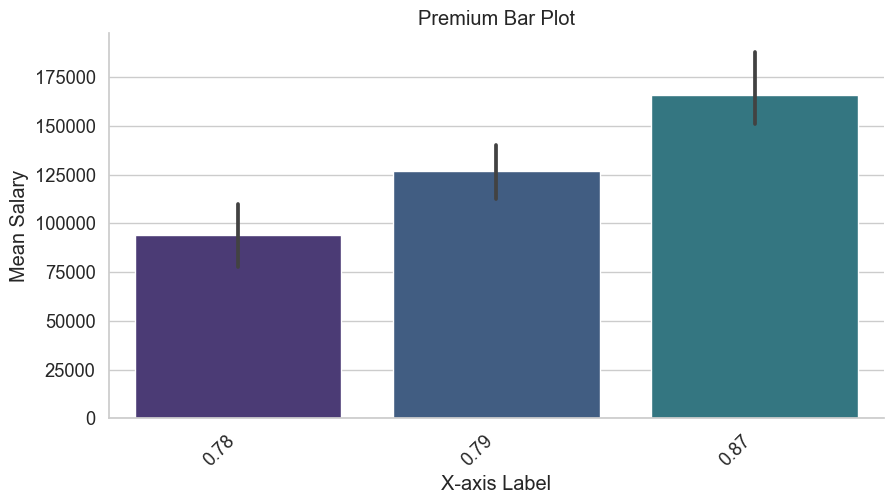

In [186]:
premium_barplot(df['Director_Score'])

In [187]:
pie(df,['Director_Score'])

In [515]:
test['Director_Score'] = test['Director_Score'].fillna(test['Director_Score'].mode()[0])

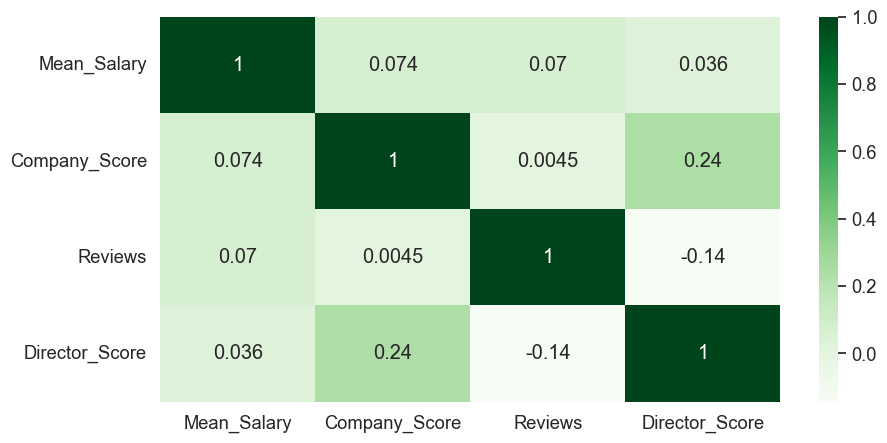

In [412]:
num = df.select_dtypes(include='number')
corr = num.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,cmap='Green',annot=True)
plt.show()

In [413]:
num.corr()['Mean_Salary']

Mean_Salary       1.000000
Company_Score     0.073927
Reviews           0.069689
Director_Score    0.036370
Name: Mean_Salary, dtype: float64

In [322]:
df.head(1)

Jobs_Group Profile  Remote                        Company      City  \
0  Financial Analyst  Senior  Remote  Sandy Hook Promise Foundation  New York   

  Frecuency_Salary  Mean_Salary                            Sector Revenue  \
0             hour     115000.0  NGOs and Nonprofit Organizations    XXXL   

  Employee  Company_Score  Reviews  Director_Score  \
0       XS            4.2     20.0            0.82   

                 Cleaned_Company     Simplified_Skills  
0  sandy hook promise foundation  Salesforce, Bachelor

In [323]:
test.head(1)

ID                                      Job  \
544  job_695a5e47e5c18a34  Analyst, Finance Operations (Fall 2024)   

            Jobs_Group Profile  Remote Company             City  \
544  Financial Analyst     NaN  Remote      K1  Manhattan Beach   

    Frecuency_Salary                  Sector Revenue Employee  Company_Score  \
544             year  Information Technology    XXXL     XXXL            3.0   

     Reviews  Director_Score  URL Cleaned_Company Simplified_Skills  
544      3.0            0.87  NaN              k1          Bachelor

In [414]:
test['Profile'].isnull().sum()

14061

In [415]:
test['Profile'] = test['Profile'].fillna('Senior')

In [326]:
test.head(1)

ID                                      Job  \
544  job_695a5e47e5c18a34  Analyst, Finance Operations (Fall 2024)   

            Jobs_Group Profile  Remote Company             City  \
544  Financial Analyst  Senior  Remote      K1  Manhattan Beach   

    Frecuency_Salary                  Sector Revenue Employee  Company_Score  \
544             year  Information Technology    XXXL     XXXL            3.0   

     Reviews  Director_Score  URL Cleaned_Company Simplified_Skills  
544      3.0            0.87  NaN              k1          Bachelor

In [327]:
df.head(1)

Jobs_Group Profile  Remote                        Company      City  \
0  Financial Analyst  Senior  Remote  Sandy Hook Promise Foundation  New York   

  Frecuency_Salary  Mean_Salary                            Sector Revenue  \
0             hour     115000.0  NGOs and Nonprofit Organizations    XXXL   

  Employee  Company_Score  Reviews  Director_Score  \
0       XS            4.2     20.0            0.82   

                 Cleaned_Company     Simplified_Skills  
0  sandy hook promise foundation  Salesforce, Bachelor

In [516]:
test.drop(['Job','City','URL','Cleaned_Company'],axis=1,inplace=True)

In [517]:
test.isnull().sum()

ID                       0
Jobs_Group               0
Profile              14061
Remote                   0
Company                 10
Frecuency_Salary         0
Sector                   0
Revenue                  0
Employee                 0
Company_Score            0
Reviews                  0
Director_Score           0
Simplified_Skills        0
dtype: int64

In [418]:
df.isnull().sum()

Jobs_Group           0
Profile              0
Remote               0
Company              9
City                 0
Frecuency_Salary     0
Mean_Salary          0
Sector               0
Revenue              0
Employee             0
Company_Score        0
Reviews              0
Director_Score       0
Cleaned_Company      0
Simplified_Skills    0
dtype: int64

In [331]:
test['Simplified_Skills'].unique()

array(['Bachelor', 'AWS, Salesforce, SQL', 'Artificial Intelligence',
       'Python, Docker, Machine Learning', 'CPA', 'Master',
       'Power BI, SQL, Tableau, Snowflake, Qlik, SAP, Bachelor, Oracle',
       'Master, Azure, Agile, Bachelor, Office',
       'Python, SQL, Master, Snowflake, Databricks, Azure, Bachelor, Machine Learning, Artificial Intelligence',
       'CPA, Office, Excel', 'No Skills', 'VBA, MBA, Bachelor, Excel',
       'SQL, Power BI, Snowflake, Azure, Bachelor',
       'CMA, MBA, CPA, SAP, Bachelor',
       'Tensor Flow, Python, Master, Bachelor, R',
       'SQL, Master, Access, Excel, Cognos, Bachelor',
       'SQL, Tableau, Excel', 'SQL, Tableau, Master, Cognos, Bachelor',
       'GitHub, Bachelor, Artificial Intelligence', 'CPA, MBA, Office'],
      dtype=object)

In [525]:
print(df.shape)
print(test.shape)

(33248, 14)
(22166, 15)


In [519]:
df.head(1)

Jobs_Group  Profile  Remote  City  Frecuency_Salary  Mean_Salary  Sector  \
0           9        2       1  1820                 1     115000.0      85   

   Revenue  Employee  Company_Score  Reviews  Director_Score  Cleaned_Company  \
0        7         4            4.2     20.0            0.82            10320   

   Simplified_Skills  
0               9628

In [526]:
test.head(1)

ID        Jobs_Group Profile  Remote  \
0  sj_99ad4f80ae7f4835  Business Analyst    Lead  Remote   

                           Company Frecuency_Salary  \
0  Dryden Mutual Insurance Company             year   

                                         Sector Revenue Employee  \
0  Insurance Companies and Investment Societies    XXXL        7   

   Company_Score  Reviews  Director_Score                 Simplified_Skills  \
0            5.0      2.0            0.82  PowerPoint, Office, Excel, Agile   

   City                  Cleaned_Company  
0  1820  dryden mutual insurance company

In [431]:
df.shape

(33248, 14)

In [432]:
test.shape

(22166, 12)

In [527]:
df.head(1)

Jobs_Group  Profile  Remote  City  Frecuency_Salary  Mean_Salary  Sector  \
0           9        2       1  1820                 1     115000.0      85   

   Revenue  Employee  Company_Score  Reviews  Director_Score  Cleaned_Company  \
0        7         4            4.2     20.0            0.82            10320   

   Simplified_Skills  
0               9628

In [528]:
test.head(1)

ID        Jobs_Group Profile  Remote  \
0  sj_99ad4f80ae7f4835  Business Analyst    Lead  Remote   

                           Company Frecuency_Salary  \
0  Dryden Mutual Insurance Company             year   

                                         Sector Revenue Employee  \
0  Insurance Companies and Investment Societies    XXXL        7   

   Company_Score  Reviews  Director_Score                 Simplified_Skills  \
0            5.0      2.0            0.82  PowerPoint, Office, Excel, Agile   

   City                  Cleaned_Company  
0  1820  dryden mutual insurance company

In [521]:
# Assuming your main dataset is df_main and the test dataset is df_test

# Add the 'City' column from the main dataset to the test dataset
test['City'] = df['City'].iloc[0]  # Assuming there is only one unique city in the main dataset

# Now, df_test has a new 'City' column with the city value from the main dataset


In [529]:
test.head()

ID         Jobs_Group Profile  Remote  \
0   sj_99ad4f80ae7f4835   Business Analyst    Lead  Remote   
1  job_6ff7f1a7c400916a  Financial Analyst  Senior  Hybrid   
2  job_e059d20eba88b17a     ML/AI Engineer  Senior  Hybrid   
3  job_79f7953813b13358     Data Scientist     NaN  Remote   
4  job_892dfe86b96f322b  Financial Analyst     NaN  Hybrid   

                                             Company Frecuency_Salary  \
0                    Dryden Mutual Insurance Company             year   
1                                   Esphera Concepts             year   
2       Volkswagen Group of America - Chattanooga...             year   
3                                 The New York Times             year   
4  Metropolitan Government of Nashville & Davidso...             year   

                                         Sector Revenue Employee  \
0  Insurance Companies and Investment Societies    XXXL        7   
1                     Management and Consulting    XXXL       XS   
2          Government and Public Administration    XXXL        7   
3          Audiovisual and Media Communications      XL       XL   
4          Government and Public Administration    XXXL        7   

   Company_Score  Reviews  Director_Score  \
0            5.0      2.0            0.82   
1            3.7    117.0            0.82   
2            3.7    117.0            0.82   
3            4.0    275.0            0.78   
4            3.7    117.0            0.82   

                                   Simplified_Skills  City  \
0                   PowerPoint, Office, Excel, Agile  1820   
1         PowerPoint, Master, Word, Bachelor, Office  1820   
2  Tensor Flow, Python, Master, PhD, C++, AWS, Ar...  1820   
3                     Google Cloud, Python, SQL, PhD  1820   
4  PowerPoint, Master, Word, Excel, Bachelor, Office  1820   

                                     Cleaned_Company  
0                    dryden mutual insurance company  
1                                   esphera concepts  
2       volkswagen group of america - chattanooga...  
3                                 the new york times  
4  metropolitan government of nashville & davidso...

In [530]:
test.isnull().sum()

ID                       0
Jobs_Group               0
Profile              14061
Remote                   0
Company                 10
Frecuency_Salary         0
Sector                   0
Revenue                  0
Employee                 0
Company_Score            0
Reviews                  0
Director_Score           0
Simplified_Skills        0
City                     0
Cleaned_Company         10
dtype: int64

In [531]:
df.head(1)

Jobs_Group  Profile  Remote  City  Frecuency_Salary  Mean_Salary  Sector  \
0           9        2       1  1820                 1     115000.0      85   

   Revenue  Employee  Company_Score  Reviews  Director_Score  Cleaned_Company  \
0        7         4            4.2     20.0            0.82            10320   

   Simplified_Skills  
0               9628

In [532]:
test.head(1)

ID        Jobs_Group Profile  Remote  \
0  sj_99ad4f80ae7f4835  Business Analyst    Lead  Remote   

                           Company Frecuency_Salary  \
0  Dryden Mutual Insurance Company             year   

                                         Sector Revenue Employee  \
0  Insurance Companies and Investment Societies    XXXL        7   

   Company_Score  Reviews  Director_Score                 Simplified_Skills  \
0            5.0      2.0            0.82  PowerPoint, Office, Excel, Agile   

   City                  Cleaned_Company  
0  1820  dryden mutual insurance company

In [535]:
print(df.shape)
print(test.shape)

(33248, 14)
(22166, 13)


In [534]:
test.drop(['ID','Company'],axis=1,inplace=True)

In [536]:
test['Profile'] = test['Profile'].fillna(test['Profile'].mode()[0])

In [537]:
test.isnull().sum()

Jobs_Group            0
Profile               0
Remote                0
Frecuency_Salary      0
Sector                0
Revenue               0
Employee              0
Company_Score         0
Reviews               0
Director_Score        0
Simplified_Skills     0
City                  0
Cleaned_Company      10
dtype: int64

In [538]:
test['Cleaned_Company'] = test['Cleaned_Company'].fillna(test['Cleaned_Company'].mode()[0])

In [457]:
from sklearn.preprocessing import LabelEncoder
for column in df.columns:
    if df[column].dtypes == 'object':
        df[column] = LabelEncoder().fit_transform(df[column])

In [458]:
x = df.drop(['Mean_Salary'],axis=1)
y = df['Mean_Salary']

In [459]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(x)

In [485]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X,y,test_size=.2,random_state=4)

In [464]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,One
from sklearn.linear_model import Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor,BaggingRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from xgboost import XGBRFRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import Pipeline
from sklearn.metrics import r2_score, mean_absolute_error

In [471]:
model = XGBRFRegressor()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

C:\Users\Ghost Codm\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\xgboost\data.py:520: FutureWarning:

is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.



r2 score 0.4785562159211937
MAE 21692.76549492481


In [486]:
model1 = CatBoostRegressor()
model1.fit(xtrain,ytrain)
y_pred = model1.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

Learning rate set to 0.068755
0:	learn: 42612.6450347	total: 17ms	remaining: 17s
1:	learn: 41459.1160539	total: 28.3ms	remaining: 14.1s
2:	learn: 40417.1774442	total: 38ms	remaining: 12.6s
3:	learn: 39575.2175564	total: 47.5ms	remaining: 11.8s
4:	learn: 38750.3642903	total: 56.9ms	remaining: 11.3s
5:	learn: 37989.1094797	total: 65.1ms	remaining: 10.8s
6:	learn: 37276.7997903	total: 74.3ms	remaining: 10.5s
7:	learn: 36735.7449059	total: 82.2ms	remaining: 10.2s
8:	learn: 36187.9164985	total: 92.2ms	remaining: 10.2s
9:	learn: 35740.6085464	total: 101ms	remaining: 9.95s
10:	learn: 35346.5056284	total: 110ms	remaining: 9.88s
11:	learn: 34908.0476419	total: 118ms	remaining: 9.71s
12:	learn: 34602.3096044	total: 127ms	remaining: 9.67s
13:	learn: 34208.9997990	total: 135ms	remaining: 9.53s
14:	learn: 33969.2753527	total: 145ms	remaining: 9.49s
15:	learn: 33749.2287120	total: 153ms	remaining: 9.39s
16:	learn: 33545.0142148	total: 161ms	remaining: 9.31s
17:	learn: 33362.0777173	total: 171ms	rema

158:	learn: 28932.2888074	total: 1.89s	remaining: 10s
159:	learn: 28920.4044377	total: 1.9s	remaining: 9.99s
160:	learn: 28915.4535389	total: 1.91s	remaining: 9.97s
161:	learn: 28900.2664113	total: 1.93s	remaining: 9.97s
162:	learn: 28891.9434800	total: 1.94s	remaining: 9.97s
163:	learn: 28881.2339727	total: 1.96s	remaining: 9.99s
164:	learn: 28869.3284462	total: 1.97s	remaining: 9.98s
165:	learn: 28861.2157610	total: 1.98s	remaining: 9.96s
166:	learn: 28843.5840729	total: 1.99s	remaining: 9.94s
167:	learn: 28832.8898008	total: 2s	remaining: 9.93s
168:	learn: 28821.9349496	total: 2.02s	remaining: 9.92s
169:	learn: 28813.7302537	total: 2.02s	remaining: 9.89s
170:	learn: 28799.9692373	total: 2.04s	remaining: 9.88s
171:	learn: 28789.2265769	total: 2.05s	remaining: 9.86s
172:	learn: 28777.8603373	total: 2.06s	remaining: 9.85s
173:	learn: 28764.9977554	total: 2.07s	remaining: 9.83s
174:	learn: 28749.8420137	total: 2.08s	remaining: 9.82s
175:	learn: 28741.3364524	total: 2.09s	remaining: 9.8s

317:	learn: 27574.9991521	total: 3.65s	remaining: 7.84s
318:	learn: 27569.0421026	total: 3.67s	remaining: 7.84s
319:	learn: 27564.4747990	total: 3.68s	remaining: 7.83s
320:	learn: 27559.4139573	total: 3.7s	remaining: 7.83s
321:	learn: 27550.6841650	total: 3.71s	remaining: 7.82s
322:	learn: 27543.2895248	total: 3.73s	remaining: 7.81s
323:	learn: 27537.9221484	total: 3.74s	remaining: 7.8s
324:	learn: 27532.2490112	total: 3.75s	remaining: 7.79s
325:	learn: 27526.8381660	total: 3.76s	remaining: 7.78s
326:	learn: 27520.8148674	total: 3.77s	remaining: 7.77s
327:	learn: 27516.5532322	total: 3.79s	remaining: 7.76s
328:	learn: 27509.1435898	total: 3.81s	remaining: 7.76s
329:	learn: 27504.7619397	total: 3.82s	remaining: 7.76s
330:	learn: 27499.6169466	total: 3.84s	remaining: 7.75s
331:	learn: 27495.7174195	total: 3.85s	remaining: 7.74s
332:	learn: 27489.2583044	total: 3.87s	remaining: 7.74s
333:	learn: 27483.3512431	total: 3.88s	remaining: 7.73s
334:	learn: 27478.9065025	total: 3.89s	remaining: 

467:	learn: 26710.2663521	total: 5.49s	remaining: 6.24s
468:	learn: 26704.5627651	total: 5.5s	remaining: 6.23s
469:	learn: 26699.8670508	total: 5.51s	remaining: 6.21s
470:	learn: 26695.7473124	total: 5.52s	remaining: 6.2s
471:	learn: 26691.7423387	total: 5.53s	remaining: 6.19s
472:	learn: 26685.7646381	total: 5.54s	remaining: 6.18s
473:	learn: 26679.0866215	total: 5.55s	remaining: 6.16s
474:	learn: 26673.1624894	total: 5.57s	remaining: 6.15s
475:	learn: 26667.6756682	total: 5.58s	remaining: 6.14s
476:	learn: 26663.6097449	total: 5.59s	remaining: 6.13s
477:	learn: 26656.0849860	total: 5.6s	remaining: 6.12s
478:	learn: 26652.4884042	total: 5.62s	remaining: 6.11s
479:	learn: 26647.0065275	total: 5.63s	remaining: 6.1s
480:	learn: 26640.7509971	total: 5.64s	remaining: 6.08s
481:	learn: 26634.1488498	total: 5.65s	remaining: 6.07s
482:	learn: 26629.7855927	total: 5.66s	remaining: 6.06s
483:	learn: 26622.7535287	total: 5.67s	remaining: 6.04s
484:	learn: 26619.7609762	total: 5.68s	remaining: 6.

615:	learn: 26011.7921827	total: 7.13s	remaining: 4.44s
616:	learn: 26008.2297647	total: 7.14s	remaining: 4.43s
617:	learn: 26004.0853286	total: 7.15s	remaining: 4.42s
618:	learn: 25999.8762631	total: 7.16s	remaining: 4.41s
619:	learn: 25997.3938465	total: 7.17s	remaining: 4.39s
620:	learn: 25994.5048046	total: 7.18s	remaining: 4.38s
621:	learn: 25989.9351045	total: 7.19s	remaining: 4.37s
622:	learn: 25986.3352394	total: 7.2s	remaining: 4.36s
623:	learn: 25983.4370530	total: 7.21s	remaining: 4.34s
624:	learn: 25978.7428501	total: 7.22s	remaining: 4.33s
625:	learn: 25970.8888419	total: 7.24s	remaining: 4.32s
626:	learn: 25962.8055008	total: 7.25s	remaining: 4.31s
627:	learn: 25957.4309576	total: 7.27s	remaining: 4.3s
628:	learn: 25952.4299605	total: 7.28s	remaining: 4.29s
629:	learn: 25949.8642972	total: 7.29s	remaining: 4.28s
630:	learn: 25944.9248240	total: 7.3s	remaining: 4.27s
631:	learn: 25939.5353863	total: 7.3s	remaining: 4.25s
632:	learn: 25933.6623965	total: 7.31s	remaining: 4.

765:	learn: 25414.3389578	total: 8.77s	remaining: 2.68s
766:	learn: 25410.9067461	total: 8.78s	remaining: 2.67s
767:	learn: 25406.5386474	total: 8.79s	remaining: 2.65s
768:	learn: 25402.5871191	total: 8.8s	remaining: 2.64s
769:	learn: 25400.2437934	total: 8.81s	remaining: 2.63s
770:	learn: 25395.9075264	total: 8.82s	remaining: 2.62s
771:	learn: 25393.2388962	total: 8.83s	remaining: 2.61s
772:	learn: 25389.2463682	total: 8.84s	remaining: 2.6s
773:	learn: 25384.8321439	total: 8.86s	remaining: 2.59s
774:	learn: 25380.7122742	total: 8.87s	remaining: 2.58s
775:	learn: 25377.7336491	total: 8.88s	remaining: 2.56s
776:	learn: 25373.1524224	total: 8.89s	remaining: 2.55s
777:	learn: 25371.2341596	total: 8.91s	remaining: 2.54s
778:	learn: 25368.4225341	total: 8.92s	remaining: 2.53s
779:	learn: 25365.3073937	total: 8.93s	remaining: 2.52s
780:	learn: 25361.0570028	total: 8.94s	remaining: 2.51s
781:	learn: 25355.1640217	total: 8.95s	remaining: 2.49s
782:	learn: 25352.3307997	total: 8.96s	remaining: 

913:	learn: 24888.5524611	total: 10.4s	remaining: 978ms
914:	learn: 24885.7873294	total: 10.4s	remaining: 966ms
915:	learn: 24882.8350223	total: 10.4s	remaining: 955ms
916:	learn: 24879.8427371	total: 10.4s	remaining: 944ms
917:	learn: 24875.6606456	total: 10.4s	remaining: 932ms
918:	learn: 24873.1194826	total: 10.4s	remaining: 921ms
919:	learn: 24869.9925940	total: 10.5s	remaining: 910ms
920:	learn: 24867.1973775	total: 10.5s	remaining: 898ms
921:	learn: 24863.8760592	total: 10.5s	remaining: 887ms
922:	learn: 24861.4683156	total: 10.5s	remaining: 875ms
923:	learn: 24859.9912948	total: 10.5s	remaining: 864ms
924:	learn: 24858.0155745	total: 10.5s	remaining: 853ms
925:	learn: 24856.1403987	total: 10.5s	remaining: 842ms
926:	learn: 24852.9728223	total: 10.5s	remaining: 830ms
927:	learn: 24850.3328298	total: 10.6s	remaining: 819ms
928:	learn: 24846.2108066	total: 10.6s	remaining: 807ms
929:	learn: 24841.8872536	total: 10.6s	remaining: 796ms
930:	learn: 24837.8981029	total: 10.6s	remaining

In [487]:
model = RandomForestRegressor()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.6257357071935652
MAE 17748.961147550533


In [475]:
model = DecisionTreeRegressor()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score 0.2598092463256233
MAE 23802.82121021303


In [478]:
model = SVR()
model.fit(xtrain,ytrain)
y_pred = model.predict(xtest)
print('r2 score',r2_score(ytest,y_pred))
print('MAE',mean_absolute_error(ytest,y_pred))

r2 score -0.032864321784493944
MAE 32298.277340580076


In [483]:
scores = []
for i in range(5):
    Xtrain,Xtest,Ytrain,Ytest = train_test_split(X,y,test_size=.2,random_state=i)
    model1.fit(Xtrain,Ytrain)
    y_pred1 = model1.predict(Xtest)
    print(scores.append(r2_score(Ytest,y_pred1)))

Learning rate set to 0.068755
0:	learn: 42613.8875780	total: 24.3ms	remaining: 24.3s
1:	learn: 41437.5379905	total: 32.8ms	remaining: 16.4s
2:	learn: 40372.2785658	total: 42.7ms	remaining: 14.2s
3:	learn: 39514.7239906	total: 50.7ms	remaining: 12.6s
4:	learn: 38675.0435619	total: 60.5ms	remaining: 12s
5:	learn: 37854.6321242	total: 69.5ms	remaining: 11.5s
6:	learn: 37129.3459807	total: 77.7ms	remaining: 11s
7:	learn: 36526.0963083	total: 87.1ms	remaining: 10.8s
8:	learn: 35969.3126853	total: 95.5ms	remaining: 10.5s
9:	learn: 35514.0594943	total: 105ms	remaining: 10.4s
10:	learn: 35137.4281628	total: 113ms	remaining: 10.1s
11:	learn: 34712.1211654	total: 122ms	remaining: 10.1s
12:	learn: 34399.6520291	total: 130ms	remaining: 9.89s
13:	learn: 34103.1503296	total: 140ms	remaining: 9.84s
14:	learn: 33835.7606312	total: 148ms	remaining: 9.7s
15:	learn: 33614.3093226	total: 156ms	remaining: 9.61s
16:	learn: 33420.1510722	total: 165ms	remaining: 9.55s
17:	learn: 33177.0538448	total: 174ms	rem

158:	learn: 28708.8895398	total: 2.05s	remaining: 10.8s
159:	learn: 28700.0373958	total: 2.06s	remaining: 10.8s
160:	learn: 28689.3493324	total: 2.07s	remaining: 10.8s
161:	learn: 28677.3135394	total: 2.09s	remaining: 10.8s
162:	learn: 28670.2975315	total: 2.1s	remaining: 10.8s
163:	learn: 28659.6878939	total: 2.11s	remaining: 10.8s
164:	learn: 28647.4369054	total: 2.12s	remaining: 10.8s
165:	learn: 28637.0303143	total: 2.14s	remaining: 10.7s
166:	learn: 28627.1160623	total: 2.15s	remaining: 10.7s
167:	learn: 28611.3583421	total: 2.16s	remaining: 10.7s
168:	learn: 28598.7478806	total: 2.17s	remaining: 10.7s
169:	learn: 28587.4312025	total: 2.18s	remaining: 10.7s
170:	learn: 28575.1531574	total: 2.2s	remaining: 10.7s
171:	learn: 28565.4843845	total: 2.21s	remaining: 10.6s
172:	learn: 28553.4073698	total: 2.22s	remaining: 10.6s
173:	learn: 28547.6116036	total: 2.23s	remaining: 10.6s
174:	learn: 28535.2104957	total: 2.25s	remaining: 10.6s
175:	learn: 28524.2219211	total: 2.27s	remaining: 

307:	learn: 27400.9385797	total: 3.92s	remaining: 8.8s
308:	learn: 27395.9690301	total: 3.93s	remaining: 8.79s
309:	learn: 27386.1542424	total: 3.94s	remaining: 8.78s
310:	learn: 27377.4681600	total: 3.96s	remaining: 8.77s
311:	learn: 27371.9805818	total: 3.97s	remaining: 8.75s
312:	learn: 27366.8265984	total: 3.98s	remaining: 8.73s
313:	learn: 27359.4899408	total: 3.98s	remaining: 8.71s
314:	learn: 27353.2463766	total: 3.99s	remaining: 8.69s
315:	learn: 27347.2012191	total: 4s	remaining: 8.66s
316:	learn: 27341.2787213	total: 4.01s	remaining: 8.64s
317:	learn: 27336.2830690	total: 4.02s	remaining: 8.62s
318:	learn: 27331.5100210	total: 4.03s	remaining: 8.6s
319:	learn: 27323.9424616	total: 4.04s	remaining: 8.59s
320:	learn: 27318.0812974	total: 4.05s	remaining: 8.57s
321:	learn: 27313.5942902	total: 4.06s	remaining: 8.55s
322:	learn: 27305.9440286	total: 4.07s	remaining: 8.54s
323:	learn: 27298.6001694	total: 4.09s	remaining: 8.53s
324:	learn: 27294.4418896	total: 4.1s	remaining: 8.51

469:	learn: 26474.6619138	total: 5.79s	remaining: 6.53s
470:	learn: 26471.0278248	total: 5.81s	remaining: 6.52s
471:	learn: 26467.5419472	total: 5.82s	remaining: 6.51s
472:	learn: 26463.9971975	total: 5.83s	remaining: 6.49s
473:	learn: 26457.5366781	total: 5.84s	remaining: 6.48s
474:	learn: 26454.3557155	total: 5.85s	remaining: 6.47s
475:	learn: 26452.0890409	total: 5.86s	remaining: 6.45s
476:	learn: 26448.1545678	total: 5.87s	remaining: 6.44s
477:	learn: 26440.8904038	total: 5.88s	remaining: 6.42s
478:	learn: 26436.3040734	total: 5.89s	remaining: 6.41s
479:	learn: 26431.1909639	total: 5.91s	remaining: 6.4s
480:	learn: 26425.6741627	total: 5.92s	remaining: 6.39s
481:	learn: 26422.2752471	total: 5.94s	remaining: 6.38s
482:	learn: 26416.1574619	total: 5.95s	remaining: 6.37s
483:	learn: 26410.6851876	total: 5.96s	remaining: 6.36s
484:	learn: 26403.7221212	total: 5.98s	remaining: 6.34s
485:	learn: 26398.6932023	total: 5.99s	remaining: 6.33s
486:	learn: 26395.3322806	total: 6s	remaining: 6.

630:	learn: 25744.3261760	total: 7.64s	remaining: 4.47s
631:	learn: 25739.7464966	total: 7.65s	remaining: 4.46s
632:	learn: 25736.8423425	total: 7.67s	remaining: 4.44s
633:	learn: 25728.8508081	total: 7.68s	remaining: 4.43s
634:	learn: 25727.0202859	total: 7.69s	remaining: 4.42s
635:	learn: 25725.9238316	total: 7.7s	remaining: 4.41s
636:	learn: 25721.1420471	total: 7.71s	remaining: 4.39s
637:	learn: 25717.6177996	total: 7.72s	remaining: 4.38s
638:	learn: 25715.1248181	total: 7.73s	remaining: 4.37s
639:	learn: 25708.8728496	total: 7.74s	remaining: 4.35s
640:	learn: 25706.5226927	total: 7.75s	remaining: 4.34s
641:	learn: 25702.6378022	total: 7.75s	remaining: 4.32s
642:	learn: 25696.9734560	total: 7.76s	remaining: 4.31s
643:	learn: 25694.5130125	total: 7.77s	remaining: 4.3s
644:	learn: 25690.9988746	total: 7.78s	remaining: 4.28s
645:	learn: 25688.5340042	total: 7.79s	remaining: 4.27s
646:	learn: 25684.6294278	total: 7.81s	remaining: 4.26s
647:	learn: 25681.1428020	total: 7.82s	remaining: 

794:	learn: 25144.0534385	total: 9.52s	remaining: 2.45s
795:	learn: 25141.7809961	total: 9.52s	remaining: 2.44s
796:	learn: 25134.8605076	total: 9.54s	remaining: 2.43s
797:	learn: 25131.1915139	total: 9.55s	remaining: 2.42s
798:	learn: 25126.3258668	total: 9.56s	remaining: 2.4s
799:	learn: 25122.5863900	total: 9.57s	remaining: 2.39s
800:	learn: 25119.1434391	total: 9.58s	remaining: 2.38s
801:	learn: 25114.1926779	total: 9.59s	remaining: 2.37s
802:	learn: 25109.2414127	total: 9.6s	remaining: 2.35s
803:	learn: 25106.4027278	total: 9.61s	remaining: 2.34s
804:	learn: 25105.1703480	total: 9.63s	remaining: 2.33s
805:	learn: 25100.7276789	total: 9.64s	remaining: 2.32s
806:	learn: 25097.0892194	total: 9.65s	remaining: 2.31s
807:	learn: 25092.7808798	total: 9.66s	remaining: 2.29s
808:	learn: 25089.9620898	total: 9.67s	remaining: 2.28s
809:	learn: 25087.9400379	total: 9.68s	remaining: 2.27s
810:	learn: 25083.0814004	total: 9.69s	remaining: 2.26s
811:	learn: 25077.2426733	total: 9.7s	remaining: 2

946:	learn: 24634.7811408	total: 11.1s	remaining: 624ms
947:	learn: 24630.5549996	total: 11.2s	remaining: 612ms
948:	learn: 24627.6999787	total: 11.2s	remaining: 600ms
949:	learn: 24622.7488456	total: 11.2s	remaining: 588ms
950:	learn: 24619.1960341	total: 11.2s	remaining: 576ms
951:	learn: 24617.2160664	total: 11.2s	remaining: 564ms
952:	learn: 24614.4427019	total: 11.2s	remaining: 553ms
953:	learn: 24610.3059207	total: 11.2s	remaining: 541ms
954:	learn: 24607.6406335	total: 11.2s	remaining: 529ms
955:	learn: 24604.4150748	total: 11.2s	remaining: 517ms
956:	learn: 24600.4821324	total: 11.3s	remaining: 506ms
957:	learn: 24597.6067358	total: 11.3s	remaining: 494ms
958:	learn: 24591.8332512	total: 11.3s	remaining: 482ms
959:	learn: 24588.1107582	total: 11.3s	remaining: 471ms
960:	learn: 24583.1312467	total: 11.3s	remaining: 459ms
961:	learn: 24579.6078345	total: 11.3s	remaining: 447ms
962:	learn: 24576.2810227	total: 11.3s	remaining: 435ms
963:	learn: 24572.4230712	total: 11.3s	remaining

94:	learn: 29335.9425879	total: 1.01s	remaining: 9.59s
95:	learn: 29316.4504602	total: 1.01s	remaining: 9.57s
96:	learn: 29300.1946459	total: 1.02s	remaining: 9.54s
97:	learn: 29289.3986214	total: 1.04s	remaining: 9.54s
98:	learn: 29269.4372996	total: 1.05s	remaining: 9.54s
99:	learn: 29259.7542965	total: 1.06s	remaining: 9.54s
100:	learn: 29244.2048607	total: 1.07s	remaining: 9.54s
101:	learn: 29228.4911847	total: 1.08s	remaining: 9.54s
102:	learn: 29220.3557313	total: 1.09s	remaining: 9.52s
103:	learn: 29210.4316791	total: 1.11s	remaining: 9.54s
104:	learn: 29200.9852216	total: 1.12s	remaining: 9.55s
105:	learn: 29187.8553280	total: 1.13s	remaining: 9.54s
106:	learn: 29177.3300364	total: 1.14s	remaining: 9.53s
107:	learn: 29167.7283844	total: 1.15s	remaining: 9.51s
108:	learn: 29159.0929261	total: 1.16s	remaining: 9.51s
109:	learn: 29145.0171151	total: 1.17s	remaining: 9.5s
110:	learn: 29134.7091129	total: 1.18s	remaining: 9.49s
111:	learn: 29123.4392467	total: 1.19s	remaining: 9.47s

242:	learn: 27807.6213664	total: 2.62s	remaining: 8.16s
243:	learn: 27798.0309136	total: 2.63s	remaining: 8.14s
244:	learn: 27790.3394432	total: 2.64s	remaining: 8.13s
245:	learn: 27782.8816084	total: 2.65s	remaining: 8.11s
246:	learn: 27775.6805287	total: 2.65s	remaining: 8.1s
247:	learn: 27766.0488066	total: 2.67s	remaining: 8.08s
248:	learn: 27760.6002789	total: 2.68s	remaining: 8.08s
249:	learn: 27753.4595503	total: 2.69s	remaining: 8.07s
250:	learn: 27747.0886979	total: 2.7s	remaining: 8.05s
251:	learn: 27741.3963817	total: 2.71s	remaining: 8.04s
252:	learn: 27734.3386752	total: 2.72s	remaining: 8.04s
253:	learn: 27727.3402563	total: 2.73s	remaining: 8.03s
254:	learn: 27718.4431907	total: 2.75s	remaining: 8.03s
255:	learn: 27712.3816636	total: 2.75s	remaining: 8.01s
256:	learn: 27702.0009922	total: 2.77s	remaining: 8s
257:	learn: 27693.5712957	total: 2.78s	remaining: 7.99s
258:	learn: 27686.6654960	total: 2.79s	remaining: 7.97s
259:	learn: 27676.7474205	total: 2.79s	remaining: 7.9

393:	learn: 26819.5137949	total: 4.25s	remaining: 6.54s
394:	learn: 26816.2542152	total: 4.26s	remaining: 6.53s
395:	learn: 26810.3624738	total: 4.27s	remaining: 6.51s
396:	learn: 26803.3647507	total: 4.28s	remaining: 6.5s
397:	learn: 26798.2540931	total: 4.29s	remaining: 6.49s
398:	learn: 26787.8492795	total: 4.3s	remaining: 6.48s
399:	learn: 26779.5193437	total: 4.31s	remaining: 6.47s
400:	learn: 26774.0458236	total: 4.33s	remaining: 6.46s
401:	learn: 26768.9234358	total: 4.33s	remaining: 6.45s
402:	learn: 26763.6304690	total: 4.34s	remaining: 6.44s
403:	learn: 26759.0570532	total: 4.36s	remaining: 6.43s
404:	learn: 26753.4560335	total: 4.38s	remaining: 6.43s
405:	learn: 26748.1755905	total: 4.38s	remaining: 6.42s
406:	learn: 26744.2787215	total: 4.39s	remaining: 6.4s
407:	learn: 26738.8352542	total: 4.41s	remaining: 6.39s
408:	learn: 26732.1748355	total: 4.42s	remaining: 6.38s
409:	learn: 26727.5108156	total: 4.43s	remaining: 6.37s
410:	learn: 26718.7180836	total: 4.44s	remaining: 6

547:	learn: 26068.1658576	total: 5.91s	remaining: 4.87s
548:	learn: 26062.2647348	total: 5.92s	remaining: 4.86s
549:	learn: 26058.2153559	total: 5.93s	remaining: 4.85s
550:	learn: 26055.5152447	total: 5.94s	remaining: 4.84s
551:	learn: 26052.1517589	total: 5.95s	remaining: 4.83s
552:	learn: 26045.1945581	total: 5.96s	remaining: 4.82s
553:	learn: 26039.8224411	total: 5.97s	remaining: 4.81s
554:	learn: 26035.6720578	total: 5.99s	remaining: 4.8s
555:	learn: 26030.7569473	total: 6s	remaining: 4.79s
556:	learn: 26027.6560856	total: 6.01s	remaining: 4.78s
557:	learn: 26023.2284240	total: 6.02s	remaining: 4.77s
558:	learn: 26013.4712589	total: 6.04s	remaining: 4.76s
559:	learn: 26009.9246662	total: 6.05s	remaining: 4.75s
560:	learn: 26003.9753847	total: 6.06s	remaining: 4.74s
561:	learn: 25998.1886554	total: 6.07s	remaining: 4.73s
562:	learn: 25993.8088348	total: 6.08s	remaining: 4.72s
563:	learn: 25991.1285448	total: 6.09s	remaining: 4.71s
564:	learn: 25985.2405016	total: 6.1s	remaining: 4.7

700:	learn: 25408.0482789	total: 7.53s	remaining: 3.21s
701:	learn: 25403.9586208	total: 7.54s	remaining: 3.2s
702:	learn: 25399.8242083	total: 7.55s	remaining: 3.19s
703:	learn: 25395.7145689	total: 7.56s	remaining: 3.18s
704:	learn: 25392.3467305	total: 7.57s	remaining: 3.17s
705:	learn: 25387.8601588	total: 7.58s	remaining: 3.16s
706:	learn: 25386.8137557	total: 7.6s	remaining: 3.15s
707:	learn: 25382.5666374	total: 7.61s	remaining: 3.14s
708:	learn: 25378.1066868	total: 7.62s	remaining: 3.13s
709:	learn: 25372.7337367	total: 7.63s	remaining: 3.12s
710:	learn: 25369.9471467	total: 7.64s	remaining: 3.11s
711:	learn: 25366.2184991	total: 7.66s	remaining: 3.1s
712:	learn: 25359.1295208	total: 7.67s	remaining: 3.09s
713:	learn: 25355.5468473	total: 7.68s	remaining: 3.08s
714:	learn: 25350.1512644	total: 7.69s	remaining: 3.07s
715:	learn: 25345.7755966	total: 7.7s	remaining: 3.06s
716:	learn: 25343.0343019	total: 7.71s	remaining: 3.04s
717:	learn: 25336.6624341	total: 7.72s	remaining: 3.

850:	learn: 24851.5944708	total: 9.14s	remaining: 1.6s
851:	learn: 24847.8465390	total: 9.15s	remaining: 1.59s
852:	learn: 24845.2638623	total: 9.16s	remaining: 1.58s
853:	learn: 24843.0025600	total: 9.17s	remaining: 1.57s
854:	learn: 24839.5736330	total: 9.18s	remaining: 1.56s
855:	learn: 24834.6317708	total: 9.19s	remaining: 1.55s
856:	learn: 24831.3099383	total: 9.2s	remaining: 1.53s
857:	learn: 24828.9135742	total: 9.21s	remaining: 1.52s
858:	learn: 24824.3029434	total: 9.22s	remaining: 1.51s
859:	learn: 24820.7711668	total: 9.24s	remaining: 1.5s
860:	learn: 24817.7055830	total: 9.25s	remaining: 1.49s
861:	learn: 24814.3972378	total: 9.26s	remaining: 1.48s
862:	learn: 24811.2233085	total: 9.28s	remaining: 1.47s
863:	learn: 24807.4245442	total: 9.29s	remaining: 1.46s
864:	learn: 24804.3379935	total: 9.3s	remaining: 1.45s
865:	learn: 24800.3144133	total: 9.31s	remaining: 1.44s
866:	learn: 24797.0111842	total: 9.32s	remaining: 1.43s
867:	learn: 24791.6871438	total: 9.33s	remaining: 1.

None
Learning rate set to 0.068755
0:	learn: 42442.6991446	total: 8.49ms	remaining: 8.48s
1:	learn: 41290.9947685	total: 19.5ms	remaining: 9.72s
2:	learn: 40250.0397688	total: 30.2ms	remaining: 10s
3:	learn: 39401.3690352	total: 38.3ms	remaining: 9.53s
4:	learn: 38574.0141728	total: 48.7ms	remaining: 9.7s
5:	learn: 37911.9890093	total: 58.6ms	remaining: 9.71s
6:	learn: 37190.0266899	total: 66.5ms	remaining: 9.43s
7:	learn: 36590.4850887	total: 76.3ms	remaining: 9.46s
8:	learn: 36037.1824215	total: 84.6ms	remaining: 9.32s
9:	learn: 35502.3153674	total: 94.5ms	remaining: 9.35s
10:	learn: 35127.2640521	total: 102ms	remaining: 9.2s
11:	learn: 34790.2602089	total: 113ms	remaining: 9.28s
12:	learn: 34433.9611878	total: 122ms	remaining: 9.25s
13:	learn: 34099.6745638	total: 133ms	remaining: 9.35s
14:	learn: 33858.7187026	total: 143ms	remaining: 9.38s
15:	learn: 33607.8371310	total: 151ms	remaining: 9.32s
16:	learn: 33292.1282709	total: 161ms	remaining: 9.32s
17:	learn: 33071.0286454	total: 17

150:	learn: 28816.9534908	total: 1.6s	remaining: 8.98s
151:	learn: 28800.5361819	total: 1.61s	remaining: 8.97s
152:	learn: 28787.6528640	total: 1.62s	remaining: 8.95s
153:	learn: 28777.2857786	total: 1.63s	remaining: 8.95s
154:	learn: 28769.4452663	total: 1.64s	remaining: 8.93s
155:	learn: 28760.7905442	total: 1.65s	remaining: 8.92s
156:	learn: 28745.9250795	total: 1.66s	remaining: 8.92s
157:	learn: 28737.2048826	total: 1.67s	remaining: 8.91s
158:	learn: 28726.0389011	total: 1.68s	remaining: 8.9s
159:	learn: 28715.3287725	total: 1.69s	remaining: 8.89s
160:	learn: 28706.9918914	total: 1.71s	remaining: 8.89s
161:	learn: 28695.3357402	total: 1.72s	remaining: 8.91s
162:	learn: 28687.1524675	total: 1.74s	remaining: 8.91s
163:	learn: 28677.8227982	total: 1.75s	remaining: 8.9s
164:	learn: 28663.9912362	total: 1.76s	remaining: 8.89s
165:	learn: 28649.8041081	total: 1.77s	remaining: 8.89s
166:	learn: 28636.2617352	total: 1.78s	remaining: 8.88s
167:	learn: 28620.7034247	total: 1.79s	remaining: 8

299:	learn: 27460.3770756	total: 3.23s	remaining: 7.54s
300:	learn: 27452.7955945	total: 3.24s	remaining: 7.52s
301:	learn: 27447.0057153	total: 3.25s	remaining: 7.51s
302:	learn: 27437.7779462	total: 3.26s	remaining: 7.49s
303:	learn: 27428.7343465	total: 3.27s	remaining: 7.48s
304:	learn: 27417.6710258	total: 3.28s	remaining: 7.47s
305:	learn: 27410.7456368	total: 3.29s	remaining: 7.47s
306:	learn: 27405.6499363	total: 3.3s	remaining: 7.45s
307:	learn: 27397.5361235	total: 3.31s	remaining: 7.44s
308:	learn: 27390.4695943	total: 3.32s	remaining: 7.43s
309:	learn: 27386.2475724	total: 3.34s	remaining: 7.43s
310:	learn: 27380.6971228	total: 3.35s	remaining: 7.42s
311:	learn: 27373.8482685	total: 3.36s	remaining: 7.41s
312:	learn: 27366.1893825	total: 3.38s	remaining: 7.41s
313:	learn: 27357.9082241	total: 3.39s	remaining: 7.4s
314:	learn: 27351.2349305	total: 3.4s	remaining: 7.39s
315:	learn: 27343.6610128	total: 3.41s	remaining: 7.38s
316:	learn: 27338.5918553	total: 3.42s	remaining: 7

465:	learn: 26526.1553872	total: 5.03s	remaining: 5.77s
466:	learn: 26519.8473001	total: 5.04s	remaining: 5.75s
467:	learn: 26515.8579889	total: 5.05s	remaining: 5.74s
468:	learn: 26510.3048811	total: 5.06s	remaining: 5.73s
469:	learn: 26504.6968271	total: 5.07s	remaining: 5.72s
470:	learn: 26501.1320926	total: 5.08s	remaining: 5.71s
471:	learn: 26495.9482756	total: 5.09s	remaining: 5.7s
472:	learn: 26491.5703601	total: 5.1s	remaining: 5.68s
473:	learn: 26486.7762771	total: 5.11s	remaining: 5.67s
474:	learn: 26482.5534621	total: 5.12s	remaining: 5.66s
475:	learn: 26476.6917149	total: 5.13s	remaining: 5.65s
476:	learn: 26473.1416826	total: 5.15s	remaining: 5.64s
477:	learn: 26466.6905226	total: 5.16s	remaining: 5.63s
478:	learn: 26462.0143646	total: 5.17s	remaining: 5.62s
479:	learn: 26458.0353031	total: 5.18s	remaining: 5.61s
480:	learn: 26453.4476887	total: 5.19s	remaining: 5.6s
481:	learn: 26447.5318910	total: 5.2s	remaining: 5.59s
482:	learn: 26443.4071471	total: 5.21s	remaining: 5.

614:	learn: 25870.2817634	total: 6.66s	remaining: 4.17s
615:	learn: 25867.1595787	total: 6.67s	remaining: 4.16s
616:	learn: 25862.4793201	total: 6.68s	remaining: 4.15s
617:	learn: 25858.4332526	total: 6.69s	remaining: 4.14s
618:	learn: 25850.6262473	total: 6.7s	remaining: 4.13s
619:	learn: 25847.8669865	total: 6.71s	remaining: 4.11s
620:	learn: 25841.5090924	total: 6.73s	remaining: 4.11s
621:	learn: 25838.3592087	total: 6.74s	remaining: 4.09s
622:	learn: 25834.4106935	total: 6.75s	remaining: 4.08s
623:	learn: 25831.1812586	total: 6.76s	remaining: 4.07s
624:	learn: 25826.8469495	total: 6.77s	remaining: 4.06s
625:	learn: 25822.4599720	total: 6.79s	remaining: 4.05s
626:	learn: 25817.9403095	total: 6.8s	remaining: 4.04s
627:	learn: 25816.9206937	total: 6.81s	remaining: 4.03s
628:	learn: 25812.3984130	total: 6.82s	remaining: 4.02s
629:	learn: 25809.9944785	total: 6.83s	remaining: 4.01s
630:	learn: 25806.1282360	total: 6.84s	remaining: 4s
631:	learn: 25802.6882374	total: 6.85s	remaining: 3.9

766:	learn: 25292.9477177	total: 8.29s	remaining: 2.52s
767:	learn: 25290.5164456	total: 8.3s	remaining: 2.51s
768:	learn: 25288.3268423	total: 8.31s	remaining: 2.5s
769:	learn: 25284.4965103	total: 8.32s	remaining: 2.49s
770:	learn: 25281.1961484	total: 8.33s	remaining: 2.48s
771:	learn: 25278.3415344	total: 8.34s	remaining: 2.46s
772:	learn: 25276.4347019	total: 8.36s	remaining: 2.45s
773:	learn: 25271.4346979	total: 8.37s	remaining: 2.44s
774:	learn: 25268.8888092	total: 8.38s	remaining: 2.43s
775:	learn: 25265.2956096	total: 8.39s	remaining: 2.42s
776:	learn: 25261.6945537	total: 8.4s	remaining: 2.41s
777:	learn: 25256.4311997	total: 8.42s	remaining: 2.4s
778:	learn: 25251.8295931	total: 8.43s	remaining: 2.39s
779:	learn: 25247.3976512	total: 8.44s	remaining: 2.38s
780:	learn: 25244.4841000	total: 8.45s	remaining: 2.37s
781:	learn: 25239.6024709	total: 8.47s	remaining: 2.36s
782:	learn: 25235.6521137	total: 8.48s	remaining: 2.35s
783:	learn: 25231.9676498	total: 8.49s	remaining: 2.

913:	learn: 24771.3241136	total: 9.88s	remaining: 929ms
914:	learn: 24770.0885342	total: 9.88s	remaining: 918ms
915:	learn: 24766.1040410	total: 9.89s	remaining: 907ms
916:	learn: 24763.3584402	total: 9.91s	remaining: 897ms
917:	learn: 24759.8007824	total: 9.92s	remaining: 886ms
918:	learn: 24757.0373754	total: 9.93s	remaining: 875ms
919:	learn: 24752.9114289	total: 9.94s	remaining: 864ms
920:	learn: 24749.8534065	total: 9.95s	remaining: 854ms
921:	learn: 24747.6065834	total: 9.96s	remaining: 843ms
922:	learn: 24744.2733368	total: 9.97s	remaining: 832ms
923:	learn: 24742.6491440	total: 9.99s	remaining: 821ms
924:	learn: 24739.4980240	total: 10s	remaining: 811ms
925:	learn: 24736.0417242	total: 10s	remaining: 800ms
926:	learn: 24731.2118943	total: 10s	remaining: 789ms
927:	learn: 24727.4064485	total: 10s	remaining: 779ms
928:	learn: 24722.7529842	total: 10s	remaining: 768ms
929:	learn: 24720.3022245	total: 10.1s	remaining: 757ms
930:	learn: 24715.5015079	total: 10.1s	remaining: 746ms
93

71:	learn: 29829.6619007	total: 1.52s	remaining: 19.5s
72:	learn: 29813.9432759	total: 1.52s	remaining: 19.4s
73:	learn: 29802.5733240	total: 1.53s	remaining: 19.2s
74:	learn: 29791.7964207	total: 1.54s	remaining: 19s
75:	learn: 29764.4395399	total: 1.55s	remaining: 18.9s
76:	learn: 29754.4614810	total: 1.56s	remaining: 18.7s
77:	learn: 29730.0089342	total: 1.57s	remaining: 18.6s
78:	learn: 29709.7220658	total: 1.58s	remaining: 18.5s
79:	learn: 29694.0512182	total: 1.59s	remaining: 18.4s
80:	learn: 29679.8661804	total: 1.6s	remaining: 18.2s
81:	learn: 29660.6179039	total: 1.62s	remaining: 18.1s
82:	learn: 29649.1454506	total: 1.63s	remaining: 18s
83:	learn: 29626.3051088	total: 1.65s	remaining: 18s
84:	learn: 29605.6790953	total: 1.68s	remaining: 18.1s
85:	learn: 29591.7362003	total: 1.7s	remaining: 18.1s
86:	learn: 29576.6873452	total: 1.71s	remaining: 17.9s
87:	learn: 29565.5485725	total: 1.72s	remaining: 17.8s
88:	learn: 29551.6248174	total: 1.73s	remaining: 17.7s
89:	learn: 29532.5

229:	learn: 28009.8902735	total: 3.31s	remaining: 11.1s
230:	learn: 27996.7861471	total: 3.33s	remaining: 11.1s
231:	learn: 27989.9986139	total: 3.34s	remaining: 11s
232:	learn: 27978.4789117	total: 3.35s	remaining: 11s
233:	learn: 27973.2742767	total: 3.36s	remaining: 11s
234:	learn: 27965.7927923	total: 3.37s	remaining: 11s
235:	learn: 27956.2821437	total: 3.38s	remaining: 10.9s
236:	learn: 27949.9292743	total: 3.39s	remaining: 10.9s
237:	learn: 27943.5969674	total: 3.4s	remaining: 10.9s
238:	learn: 27935.2404415	total: 3.41s	remaining: 10.9s
239:	learn: 27928.5591412	total: 3.42s	remaining: 10.8s
240:	learn: 27922.6672614	total: 3.44s	remaining: 10.8s
241:	learn: 27905.7091710	total: 3.45s	remaining: 10.8s
242:	learn: 27897.6240442	total: 3.46s	remaining: 10.8s
243:	learn: 27886.9751715	total: 3.47s	remaining: 10.8s
244:	learn: 27880.6733402	total: 3.48s	remaining: 10.7s
245:	learn: 27875.0717581	total: 3.49s	remaining: 10.7s
246:	learn: 27869.3359739	total: 3.5s	remaining: 10.7s
24

377:	learn: 26966.4077726	total: 4.91s	remaining: 8.09s
378:	learn: 26960.7715361	total: 4.92s	remaining: 8.07s
379:	learn: 26953.9597059	total: 4.93s	remaining: 8.05s
380:	learn: 26950.2095311	total: 4.95s	remaining: 8.04s
381:	learn: 26943.7554222	total: 4.96s	remaining: 8.02s
382:	learn: 26935.1093178	total: 4.97s	remaining: 8s
383:	learn: 26930.6261191	total: 4.98s	remaining: 7.99s
384:	learn: 26924.7570629	total: 4.99s	remaining: 7.98s
385:	learn: 26917.8944686	total: 5s	remaining: 7.96s
386:	learn: 26910.3545664	total: 5.01s	remaining: 7.94s
387:	learn: 26905.3761562	total: 5.03s	remaining: 7.93s
388:	learn: 26900.5099040	total: 5.04s	remaining: 7.92s
389:	learn: 26895.6211309	total: 5.05s	remaining: 7.91s
390:	learn: 26883.5082254	total: 5.07s	remaining: 7.89s
391:	learn: 26877.6920570	total: 5.08s	remaining: 7.87s
392:	learn: 26870.5915251	total: 5.09s	remaining: 7.86s
393:	learn: 26866.2833865	total: 5.1s	remaining: 7.84s
394:	learn: 26862.3950154	total: 5.11s	remaining: 7.82s

530:	learn: 26176.0723713	total: 6.55s	remaining: 5.78s
531:	learn: 26174.1706830	total: 6.56s	remaining: 5.77s
532:	learn: 26171.4154420	total: 6.57s	remaining: 5.75s
533:	learn: 26165.5687445	total: 6.58s	remaining: 5.74s
534:	learn: 26161.6530179	total: 6.59s	remaining: 5.73s
535:	learn: 26157.7674007	total: 6.6s	remaining: 5.71s
536:	learn: 26151.7800700	total: 6.61s	remaining: 5.7s
537:	learn: 26145.2250342	total: 6.62s	remaining: 5.69s
538:	learn: 26140.2106839	total: 6.63s	remaining: 5.67s
539:	learn: 26136.0289149	total: 6.64s	remaining: 5.66s
540:	learn: 26132.8043111	total: 6.66s	remaining: 5.65s
541:	learn: 26125.2951249	total: 6.67s	remaining: 5.64s
542:	learn: 26122.2155865	total: 6.68s	remaining: 5.63s
543:	learn: 26117.3585380	total: 6.69s	remaining: 5.61s
544:	learn: 26113.6095031	total: 6.71s	remaining: 5.6s
545:	learn: 26108.1411370	total: 6.72s	remaining: 5.59s
546:	learn: 26103.7439868	total: 6.73s	remaining: 5.57s
547:	learn: 26097.1456100	total: 6.74s	remaining: 5

681:	learn: 25519.7625887	total: 8.2s	remaining: 3.82s
682:	learn: 25514.9523495	total: 8.21s	remaining: 3.81s
683:	learn: 25509.2146347	total: 8.22s	remaining: 3.8s
684:	learn: 25504.1153826	total: 8.23s	remaining: 3.78s
685:	learn: 25499.5041381	total: 8.24s	remaining: 3.77s
686:	learn: 25497.0329425	total: 8.25s	remaining: 3.76s
687:	learn: 25493.9806200	total: 8.26s	remaining: 3.75s
688:	learn: 25489.4795835	total: 8.27s	remaining: 3.73s
689:	learn: 25486.3013021	total: 8.28s	remaining: 3.72s
690:	learn: 25480.9892130	total: 8.3s	remaining: 3.71s
691:	learn: 25477.1187736	total: 8.31s	remaining: 3.7s
692:	learn: 25471.4613909	total: 8.32s	remaining: 3.69s
693:	learn: 25467.1103579	total: 8.34s	remaining: 3.67s
694:	learn: 25463.6804257	total: 8.35s	remaining: 3.66s
695:	learn: 25458.5327903	total: 8.36s	remaining: 3.65s
696:	learn: 25452.6934923	total: 8.37s	remaining: 3.64s
697:	learn: 25450.0501390	total: 8.38s	remaining: 3.62s
698:	learn: 25446.4633104	total: 8.38s	remaining: 3.

835:	learn: 24965.7140051	total: 9.84s	remaining: 1.93s
836:	learn: 24961.4180216	total: 9.85s	remaining: 1.92s
837:	learn: 24960.8864829	total: 9.85s	remaining: 1.9s
838:	learn: 24957.9588515	total: 9.87s	remaining: 1.89s
839:	learn: 24954.0484707	total: 9.88s	remaining: 1.88s
840:	learn: 24951.1803402	total: 9.89s	remaining: 1.87s
841:	learn: 24946.8456432	total: 9.9s	remaining: 1.86s
842:	learn: 24941.6045828	total: 9.91s	remaining: 1.84s
843:	learn: 24938.5171268	total: 9.92s	remaining: 1.83s
844:	learn: 24935.8333882	total: 9.93s	remaining: 1.82s
845:	learn: 24930.5030224	total: 9.95s	remaining: 1.81s
846:	learn: 24925.7785308	total: 9.96s	remaining: 1.8s
847:	learn: 24923.4052523	total: 9.97s	remaining: 1.79s
848:	learn: 24920.1255455	total: 9.98s	remaining: 1.77s
849:	learn: 24916.6694942	total: 9.99s	remaining: 1.76s
850:	learn: 24913.2625409	total: 10s	remaining: 1.75s
851:	learn: 24911.1763324	total: 10s	remaining: 1.74s
852:	learn: 24906.4483863	total: 10s	remaining: 1.73s
8

988:	learn: 24478.3460659	total: 11.5s	remaining: 128ms
989:	learn: 24474.0265697	total: 11.5s	remaining: 116ms
990:	learn: 24470.6609329	total: 11.5s	remaining: 104ms
991:	learn: 24467.7505862	total: 11.5s	remaining: 92.8ms
992:	learn: 24464.5603073	total: 11.5s	remaining: 81.2ms
993:	learn: 24460.1339926	total: 11.5s	remaining: 69.6ms
994:	learn: 24457.1797419	total: 11.5s	remaining: 58ms
995:	learn: 24452.8012124	total: 11.6s	remaining: 46.4ms
996:	learn: 24447.6105868	total: 11.6s	remaining: 34.8ms
997:	learn: 24444.8482723	total: 11.6s	remaining: 23.2ms
998:	learn: 24443.4610808	total: 11.6s	remaining: 11.6ms
999:	learn: 24440.9449646	total: 11.6s	remaining: 0us
None
Learning rate set to 0.068755
0:	learn: 42612.6450347	total: 13.2ms	remaining: 13.2s
1:	learn: 41459.1160539	total: 21.4ms	remaining: 10.7s
2:	learn: 40417.1774442	total: 33.1ms	remaining: 11s
3:	learn: 39575.2175564	total: 42.4ms	remaining: 10.6s
4:	learn: 38750.3642903	total: 50.9ms	remaining: 10.1s
5:	learn: 37989.

153:	learn: 28987.9895084	total: 1.63s	remaining: 8.96s
154:	learn: 28977.2643510	total: 1.64s	remaining: 8.95s
155:	learn: 28965.1756099	total: 1.65s	remaining: 8.95s
156:	learn: 28953.2183275	total: 1.66s	remaining: 8.93s
157:	learn: 28941.6303967	total: 1.67s	remaining: 8.92s
158:	learn: 28932.2888074	total: 1.69s	remaining: 8.93s
159:	learn: 28920.4044377	total: 1.7s	remaining: 8.91s
160:	learn: 28915.4535389	total: 1.71s	remaining: 8.9s
161:	learn: 28900.2664113	total: 1.72s	remaining: 8.9s
162:	learn: 28891.9434800	total: 1.73s	remaining: 8.88s
163:	learn: 28881.2339727	total: 1.74s	remaining: 8.89s
164:	learn: 28869.3284462	total: 1.76s	remaining: 8.89s
165:	learn: 28861.2157610	total: 1.77s	remaining: 8.89s
166:	learn: 28843.5840729	total: 1.78s	remaining: 8.88s
167:	learn: 28832.8898008	total: 1.79s	remaining: 8.87s
168:	learn: 28821.9349496	total: 1.8s	remaining: 8.86s
169:	learn: 28813.7302537	total: 1.81s	remaining: 8.87s
170:	learn: 28799.9692373	total: 1.82s	remaining: 8.

305:	learn: 27670.6936988	total: 3.27s	remaining: 7.42s
306:	learn: 27660.5715603	total: 3.28s	remaining: 7.4s
307:	learn: 27652.5609045	total: 3.29s	remaining: 7.39s
308:	learn: 27645.6346060	total: 3.3s	remaining: 7.38s
309:	learn: 27635.5578021	total: 3.31s	remaining: 7.37s
310:	learn: 27629.0635933	total: 3.32s	remaining: 7.36s
311:	learn: 27621.7877434	total: 3.34s	remaining: 7.36s
312:	learn: 27611.0330014	total: 3.35s	remaining: 7.34s
313:	learn: 27605.1945327	total: 3.36s	remaining: 7.33s
314:	learn: 27601.1371960	total: 3.37s	remaining: 7.32s
315:	learn: 27590.5819504	total: 3.38s	remaining: 7.32s
316:	learn: 27582.0331111	total: 3.4s	remaining: 7.32s
317:	learn: 27574.9991521	total: 3.41s	remaining: 7.31s
318:	learn: 27569.0421026	total: 3.42s	remaining: 7.3s
319:	learn: 27564.4747990	total: 3.43s	remaining: 7.29s
320:	learn: 27559.4139573	total: 3.44s	remaining: 7.28s
321:	learn: 27550.6841650	total: 3.45s	remaining: 7.27s
322:	learn: 27543.2895248	total: 3.46s	remaining: 7.

461:	learn: 26736.2614932	total: 5.1s	remaining: 5.94s
462:	learn: 26732.8043499	total: 5.13s	remaining: 5.95s
463:	learn: 26727.9557101	total: 5.14s	remaining: 5.94s
464:	learn: 26719.3776348	total: 5.15s	remaining: 5.93s
465:	learn: 26716.4438931	total: 5.16s	remaining: 5.92s
466:	learn: 26714.1716919	total: 5.17s	remaining: 5.91s
467:	learn: 26710.2663521	total: 5.18s	remaining: 5.89s
468:	learn: 26704.5627651	total: 5.2s	remaining: 5.88s
469:	learn: 26699.8670508	total: 5.21s	remaining: 5.87s
470:	learn: 26695.7473124	total: 5.22s	remaining: 5.86s
471:	learn: 26691.7423387	total: 5.24s	remaining: 5.86s
472:	learn: 26685.7646381	total: 5.25s	remaining: 5.85s
473:	learn: 26679.0866215	total: 5.27s	remaining: 5.84s
474:	learn: 26673.1624894	total: 5.28s	remaining: 5.83s
475:	learn: 26667.6756682	total: 5.29s	remaining: 5.82s
476:	learn: 26663.6097449	total: 5.3s	remaining: 5.81s
477:	learn: 26656.0849860	total: 5.31s	remaining: 5.8s
478:	learn: 26652.4884042	total: 5.32s	remaining: 5.

624:	learn: 25978.7428501	total: 7.13s	remaining: 4.28s
625:	learn: 25970.8888419	total: 7.14s	remaining: 4.26s
626:	learn: 25962.8055008	total: 7.15s	remaining: 4.25s
627:	learn: 25957.4309576	total: 7.17s	remaining: 4.25s
628:	learn: 25952.4299605	total: 7.18s	remaining: 4.23s
629:	learn: 25949.8642972	total: 7.19s	remaining: 4.22s
630:	learn: 25944.9248240	total: 7.2s	remaining: 4.21s
631:	learn: 25939.5353863	total: 7.22s	remaining: 4.2s
632:	learn: 25933.6623965	total: 7.23s	remaining: 4.19s
633:	learn: 25928.2113129	total: 7.25s	remaining: 4.18s
634:	learn: 25924.9830892	total: 7.26s	remaining: 4.17s
635:	learn: 25921.5591668	total: 7.27s	remaining: 4.16s
636:	learn: 25916.2470498	total: 7.29s	remaining: 4.15s
637:	learn: 25908.1900862	total: 7.3s	remaining: 4.14s
638:	learn: 25904.3371827	total: 7.31s	remaining: 4.13s
639:	learn: 25901.1290499	total: 7.32s	remaining: 4.12s
640:	learn: 25897.3376611	total: 7.33s	remaining: 4.11s
641:	learn: 25892.7225451	total: 7.35s	remaining: 4

776:	learn: 25373.1524224	total: 8.79s	remaining: 2.52s
777:	learn: 25371.2341596	total: 8.8s	remaining: 2.51s
778:	learn: 25368.4225341	total: 8.81s	remaining: 2.5s
779:	learn: 25365.3073937	total: 8.82s	remaining: 2.49s
780:	learn: 25361.0570028	total: 8.83s	remaining: 2.48s
781:	learn: 25355.1640217	total: 8.84s	remaining: 2.46s
782:	learn: 25352.3307997	total: 8.85s	remaining: 2.45s
783:	learn: 25347.6084111	total: 8.86s	remaining: 2.44s
784:	learn: 25345.1308352	total: 8.87s	remaining: 2.43s
785:	learn: 25342.6839639	total: 8.88s	remaining: 2.42s
786:	learn: 25339.1056329	total: 8.9s	remaining: 2.41s
787:	learn: 25334.6563946	total: 8.91s	remaining: 2.4s
788:	learn: 25329.7000871	total: 8.92s	remaining: 2.39s
789:	learn: 25325.3583732	total: 8.93s	remaining: 2.37s
790:	learn: 25319.7835215	total: 8.95s	remaining: 2.36s
791:	learn: 25315.8735086	total: 8.96s	remaining: 2.35s
792:	learn: 25312.0208555	total: 8.96s	remaining: 2.34s
793:	learn: 25305.0508641	total: 8.97s	remaining: 2.

927:	learn: 24850.3328298	total: 10.4s	remaining: 808ms
928:	learn: 24846.2108066	total: 10.4s	remaining: 797ms
929:	learn: 24841.8872536	total: 10.4s	remaining: 786ms
930:	learn: 24837.8981029	total: 10.4s	remaining: 774ms
931:	learn: 24836.0986825	total: 10.5s	remaining: 763ms
932:	learn: 24832.3069194	total: 10.5s	remaining: 752ms
933:	learn: 24829.7773968	total: 10.5s	remaining: 741ms
934:	learn: 24827.3045550	total: 10.5s	remaining: 729ms
935:	learn: 24824.6904014	total: 10.5s	remaining: 718ms
936:	learn: 24823.1768909	total: 10.5s	remaining: 707ms
937:	learn: 24820.9427018	total: 10.5s	remaining: 695ms
938:	learn: 24818.3202587	total: 10.5s	remaining: 684ms
939:	learn: 24816.8095908	total: 10.5s	remaining: 673ms
940:	learn: 24812.0972620	total: 10.6s	remaining: 662ms
941:	learn: 24808.3871793	total: 10.6s	remaining: 651ms
942:	learn: 24804.5129246	total: 10.6s	remaining: 639ms
943:	learn: 24802.1964266	total: 10.6s	remaining: 628ms
944:	learn: 24800.4349423	total: 10.6s	remaining

In [484]:
np.argmax(scores)

4

In [540]:
df.to_csv('deep1.csv')
test.to_csv('test.csv')

In [488]:
test.shape

(22166, 13)

In [491]:
test.head(1)

Jobs_Group Profile  Remote Frecuency_Salary  \
0  Business Analyst    Lead  Remote             year   

                                         Sector Revenue Employee  \
0  Insurance Companies and Investment Societies    XXXL     XXXL   

   Company_Score  Reviews  Director_Score                 Simplified_Skills  \
0            5.0      2.0            0.82  PowerPoint, Office, Excel, Agile   

                   Cleaned_Company      City  
0  dryden mutual insurance company  New York

In [539]:
test.head()

Jobs_Group Profile  Remote Frecuency_Salary  \
0   Business Analyst    Lead  Remote             year   
1  Financial Analyst  Senior  Hybrid             year   
2     ML/AI Engineer  Senior  Hybrid             year   
3     Data Scientist  Senior  Remote             year   
4  Financial Analyst  Senior  Hybrid             year   

                                         Sector Revenue Employee  \
0  Insurance Companies and Investment Societies    XXXL        7   
1                     Management and Consulting    XXXL       XS   
2          Government and Public Administration    XXXL        7   
3          Audiovisual and Media Communications      XL       XL   
4          Government and Public Administration    XXXL        7   

   Company_Score  Reviews  Director_Score  \
0            5.0      2.0            0.82   
1            3.7    117.0            0.82   
2            3.7    117.0            0.82   
3            4.0    275.0            0.78   
4            3.7    117.0            0.82   

                                   Simplified_Skills  City  \
0                   PowerPoint, Office, Excel, Agile  1820   
1         PowerPoint, Master, Word, Bachelor, Office  1820   
2  Tensor Flow, Python, Master, PhD, C++, AWS, Ar...  1820   
3                     Google Cloud, Python, SQL, PhD  1820   
4  PowerPoint, Master, Word, Excel, Bachelor, Office  1820   

                                     Cleaned_Company  
0                    dryden mutual insurance company  
1                                   esphera concepts  
2       volkswagen group of america - chattanooga...  
3                                 the new york times  
4  metropolitan government of nashville & davidso...

In [541]:
from catboost import CatBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score, mean_absolute_error

# Define the model
cat = CatBoostRegressor()

# Define the parameter grid to search
param_grid = {
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'iterations': [100, 200, 300],
    # Add more parameters as needed
}

# Define the scoring functions
scoring = {
    'r2_score': make_scorer(r2_score),
    'mae': make_scorer(mean_absolute_error)
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=cat, param_grid=param_grid, scoring=scoring, refit='r2_score', cv=3)

# Fit the model
grid_search.fit(xtrain, ytrain)

# Print the best parameters and scores
print('Best Parameters:', grid_search.best_params_)
print('Best R2 Score:', grid_search.best_score_)
print('Best MAE:', grid_search.cv_results_['mean_test_mae'][grid_search.best_index_])

# Make predictions on the test set using the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(xtest)

# Evaluate the best model
print('Final R2 Score:', r2_score(ytest, y_pred))
print('Final MAE:', mean_absolute_error(ytest, y_pred))


0:	learn: 43757.3802241	total: 19.7ms	remaining: 1.95s
1:	learn: 43566.5084450	total: 27.2ms	remaining: 1.33s
2:	learn: 43373.4876411	total: 36.1ms	remaining: 1.17s
3:	learn: 43209.0127292	total: 43.7ms	remaining: 1.05s
4:	learn: 43030.7078364	total: 52.5ms	remaining: 997ms
5:	learn: 42878.3794450	total: 60.2ms	remaining: 943ms
6:	learn: 42694.0006893	total: 68.4ms	remaining: 909ms
7:	learn: 42524.1102042	total: 75.9ms	remaining: 872ms
8:	learn: 42350.2864209	total: 85.4ms	remaining: 864ms
9:	learn: 42194.4207409	total: 92ms	remaining: 828ms
10:	learn: 42040.4895580	total: 100ms	remaining: 809ms
11:	learn: 41874.2855638	total: 107ms	remaining: 782ms
12:	learn: 41699.8513880	total: 114ms	remaining: 766ms
13:	learn: 41534.4379994	total: 122ms	remaining: 746ms
14:	learn: 41396.8075216	total: 129ms	remaining: 732ms
15:	learn: 41255.3892266	total: 136ms	remaining: 714ms
16:	learn: 41093.6900751	total: 144ms	remaining: 703ms
17:	learn: 40934.9145935	total: 151ms	remaining: 686ms
18:	learn: 4

63:	learn: 36480.4022993	total: 519ms	remaining: 292ms
64:	learn: 36393.3873436	total: 527ms	remaining: 284ms
65:	learn: 36337.4502871	total: 539ms	remaining: 278ms
66:	learn: 36277.9474743	total: 552ms	remaining: 272ms
67:	learn: 36201.8769520	total: 564ms	remaining: 265ms
68:	learn: 36135.7401215	total: 580ms	remaining: 261ms
69:	learn: 36077.5325352	total: 598ms	remaining: 256ms
70:	learn: 36007.9820999	total: 607ms	remaining: 248ms
71:	learn: 35952.6265924	total: 618ms	remaining: 240ms
72:	learn: 35888.0450936	total: 629ms	remaining: 233ms
73:	learn: 35820.2623686	total: 637ms	remaining: 224ms
74:	learn: 35755.7802121	total: 647ms	remaining: 216ms
75:	learn: 35696.3870034	total: 654ms	remaining: 207ms
76:	learn: 35636.3718766	total: 664ms	remaining: 198ms
77:	learn: 35570.8468301	total: 672ms	remaining: 189ms
78:	learn: 35512.1578241	total: 681ms	remaining: 181ms
79:	learn: 35455.7538162	total: 689ms	remaining: 172ms
80:	learn: 35407.3043829	total: 697ms	remaining: 163ms
81:	learn:

28:	learn: 32552.9250822	total: 213ms	remaining: 522ms
29:	learn: 32457.9073862	total: 220ms	remaining: 513ms
30:	learn: 32366.3679841	total: 229ms	remaining: 509ms
31:	learn: 32275.8789551	total: 236ms	remaining: 502ms
32:	learn: 32198.6435810	total: 245ms	remaining: 498ms
33:	learn: 32109.6795108	total: 254ms	remaining: 493ms
34:	learn: 32039.2592163	total: 262ms	remaining: 487ms
35:	learn: 31957.4258807	total: 269ms	remaining: 478ms
36:	learn: 31877.2287890	total: 276ms	remaining: 470ms
37:	learn: 31802.1919541	total: 283ms	remaining: 462ms
38:	learn: 31734.2714154	total: 292ms	remaining: 456ms
39:	learn: 31674.7471442	total: 298ms	remaining: 447ms
40:	learn: 31580.4436202	total: 306ms	remaining: 441ms
41:	learn: 31519.7246816	total: 314ms	remaining: 434ms
42:	learn: 31476.5729361	total: 324ms	remaining: 429ms
43:	learn: 31407.0127532	total: 332ms	remaining: 422ms
44:	learn: 31346.3526146	total: 341ms	remaining: 417ms
45:	learn: 31299.2512524	total: 351ms	remaining: 412ms
46:	learn:

82:	learn: 30525.5495567	total: 619ms	remaining: 127ms
83:	learn: 30507.2851453	total: 626ms	remaining: 119ms
84:	learn: 30489.8657585	total: 633ms	remaining: 112ms
85:	learn: 30482.3086516	total: 641ms	remaining: 104ms
86:	learn: 30458.3678173	total: 650ms	remaining: 97.1ms
87:	learn: 30443.2942295	total: 657ms	remaining: 89.6ms
88:	learn: 30422.0957795	total: 668ms	remaining: 82.5ms
89:	learn: 30404.6751007	total: 675ms	remaining: 75ms
90:	learn: 30390.1085104	total: 684ms	remaining: 67.6ms
91:	learn: 30371.2105988	total: 692ms	remaining: 60.1ms
92:	learn: 30357.3387445	total: 702ms	remaining: 52.9ms
93:	learn: 30337.0761460	total: 714ms	remaining: 45.6ms
94:	learn: 30320.7088443	total: 723ms	remaining: 38.1ms
95:	learn: 30296.5416881	total: 733ms	remaining: 30.5ms
96:	learn: 30276.9847636	total: 740ms	remaining: 22.9ms
97:	learn: 30262.3038774	total: 750ms	remaining: 15.3ms
98:	learn: 30245.0218748	total: 758ms	remaining: 7.66ms
99:	learn: 30215.8647145	total: 768ms	remaining: 0us
0

54:	learn: 29651.7756482	total: 408ms	remaining: 334ms
55:	learn: 29624.1222622	total: 415ms	remaining: 326ms
56:	learn: 29598.0219087	total: 423ms	remaining: 319ms
57:	learn: 29568.2984654	total: 430ms	remaining: 311ms
58:	learn: 29539.7756277	total: 439ms	remaining: 305ms
59:	learn: 29519.6812556	total: 446ms	remaining: 297ms
60:	learn: 29484.2962935	total: 460ms	remaining: 294ms
61:	learn: 29466.2143851	total: 468ms	remaining: 287ms
62:	learn: 29446.4306567	total: 476ms	remaining: 280ms
63:	learn: 29420.7950486	total: 485ms	remaining: 273ms
64:	learn: 29396.8161947	total: 493ms	remaining: 266ms
65:	learn: 29360.4183804	total: 504ms	remaining: 260ms
66:	learn: 29341.4885569	total: 512ms	remaining: 252ms
67:	learn: 29322.5445409	total: 521ms	remaining: 245ms
68:	learn: 29306.6634199	total: 529ms	remaining: 238ms
69:	learn: 29289.5676039	total: 538ms	remaining: 231ms
70:	learn: 29252.6815847	total: 546ms	remaining: 223ms
71:	learn: 29222.2730431	total: 556ms	remaining: 216ms
72:	learn:

26:	learn: 31316.9661995	total: 193ms	remaining: 522ms
27:	learn: 31220.5527359	total: 199ms	remaining: 513ms
28:	learn: 31153.7871625	total: 207ms	remaining: 507ms
29:	learn: 31102.6968088	total: 215ms	remaining: 502ms
30:	learn: 31030.9262899	total: 224ms	remaining: 498ms
31:	learn: 30965.2212733	total: 233ms	remaining: 495ms
32:	learn: 30917.6056589	total: 242ms	remaining: 491ms
33:	learn: 30887.0993374	total: 251ms	remaining: 486ms
34:	learn: 30830.0939085	total: 258ms	remaining: 480ms
35:	learn: 30794.6193032	total: 267ms	remaining: 475ms
36:	learn: 30751.1832615	total: 275ms	remaining: 468ms
37:	learn: 30724.9296600	total: 285ms	remaining: 465ms
38:	learn: 30685.7378024	total: 293ms	remaining: 458ms
39:	learn: 30608.1893413	total: 304ms	remaining: 456ms
40:	learn: 30566.5432538	total: 311ms	remaining: 448ms
41:	learn: 30522.2157896	total: 321ms	remaining: 443ms
42:	learn: 30468.7437107	total: 330ms	remaining: 438ms
43:	learn: 30424.9841006	total: 338ms	remaining: 430ms
44:	learn:

80:	learn: 35044.5095489	total: 636ms	remaining: 934ms
81:	learn: 34991.4915195	total: 644ms	remaining: 927ms
82:	learn: 34940.8895609	total: 653ms	remaining: 921ms
83:	learn: 34878.4187198	total: 661ms	remaining: 913ms
84:	learn: 34833.2777246	total: 669ms	remaining: 905ms
85:	learn: 34786.4965414	total: 677ms	remaining: 898ms
86:	learn: 34726.6546838	total: 685ms	remaining: 890ms
87:	learn: 34680.5473408	total: 692ms	remaining: 881ms
88:	learn: 34622.4479176	total: 699ms	remaining: 872ms
89:	learn: 34571.2540620	total: 706ms	remaining: 862ms
90:	learn: 34523.4435452	total: 713ms	remaining: 854ms
91:	learn: 34469.6885456	total: 719ms	remaining: 844ms
92:	learn: 34408.9722190	total: 727ms	remaining: 836ms
93:	learn: 34354.1608069	total: 734ms	remaining: 828ms
94:	learn: 34314.4946402	total: 742ms	remaining: 820ms
95:	learn: 34268.4325947	total: 750ms	remaining: 813ms
96:	learn: 34231.1746595	total: 760ms	remaining: 807ms
97:	learn: 34186.1857104	total: 773ms	remaining: 805ms
98:	learn:

50:	learn: 37517.1905684	total: 407ms	remaining: 1.19s
51:	learn: 37424.3260423	total: 416ms	remaining: 1.18s
52:	learn: 37328.9178143	total: 423ms	remaining: 1.17s
53:	learn: 37253.3783657	total: 431ms	remaining: 1.17s
54:	learn: 37170.1128882	total: 439ms	remaining: 1.16s
55:	learn: 37101.0228307	total: 447ms	remaining: 1.15s
56:	learn: 37020.0949501	total: 455ms	remaining: 1.14s
57:	learn: 36924.4730214	total: 463ms	remaining: 1.13s
58:	learn: 36856.4098590	total: 470ms	remaining: 1.12s
59:	learn: 36783.7723497	total: 477ms	remaining: 1.11s
60:	learn: 36699.7283192	total: 483ms	remaining: 1.1s
61:	learn: 36625.2841537	total: 491ms	remaining: 1.09s
62:	learn: 36559.0081067	total: 499ms	remaining: 1.08s
63:	learn: 36480.4022993	total: 507ms	remaining: 1.08s
64:	learn: 36393.3873436	total: 515ms	remaining: 1.07s
65:	learn: 36337.4502871	total: 523ms	remaining: 1.06s
66:	learn: 36277.9474743	total: 533ms	remaining: 1.06s
67:	learn: 36201.8769520	total: 541ms	remaining: 1.05s
68:	learn: 

0:	learn: 43611.7724339	total: 6.84ms	remaining: 1.36s
1:	learn: 43427.2552326	total: 15ms	remaining: 1.48s
2:	learn: 43244.1861499	total: 22.2ms	remaining: 1.46s
3:	learn: 43085.2088325	total: 30.1ms	remaining: 1.47s
4:	learn: 42911.6144277	total: 36.7ms	remaining: 1.43s
5:	learn: 42745.0122193	total: 45.4ms	remaining: 1.47s
6:	learn: 42566.6132393	total: 53ms	remaining: 1.46s
7:	learn: 42404.8618705	total: 61.5ms	remaining: 1.48s
8:	learn: 42236.6206651	total: 68.3ms	remaining: 1.45s
9:	learn: 42070.4371206	total: 76.4ms	remaining: 1.45s
10:	learn: 41923.9039367	total: 83.1ms	remaining: 1.43s
11:	learn: 41763.0479277	total: 91.5ms	remaining: 1.43s
12:	learn: 41594.3735224	total: 98.3ms	remaining: 1.41s
13:	learn: 41435.3935718	total: 106ms	remaining: 1.41s
14:	learn: 41307.1287650	total: 112ms	remaining: 1.39s
15:	learn: 41154.7165493	total: 119ms	remaining: 1.37s
16:	learn: 40998.8532676	total: 127ms	remaining: 1.37s
17:	learn: 40846.6223772	total: 134ms	remaining: 1.35s
18:	learn: 

160:	learn: 32595.9541855	total: 1.23s	remaining: 299ms
161:	learn: 32579.7732245	total: 1.25s	remaining: 292ms
162:	learn: 32564.1692272	total: 1.25s	remaining: 285ms
163:	learn: 32547.8789417	total: 1.27s	remaining: 278ms
164:	learn: 32521.3577046	total: 1.28s	remaining: 271ms
165:	learn: 32507.9236058	total: 1.29s	remaining: 264ms
166:	learn: 32494.3599559	total: 1.29s	remaining: 256ms
167:	learn: 32479.6396409	total: 1.3s	remaining: 248ms
168:	learn: 32460.8336753	total: 1.31s	remaining: 240ms
169:	learn: 32446.8404470	total: 1.32s	remaining: 232ms
170:	learn: 32433.8874446	total: 1.32s	remaining: 225ms
171:	learn: 32419.9289048	total: 1.33s	remaining: 217ms
172:	learn: 32407.2529980	total: 1.34s	remaining: 209ms
173:	learn: 32391.8710230	total: 1.34s	remaining: 201ms
174:	learn: 32374.4155136	total: 1.35s	remaining: 193ms
175:	learn: 32352.2707466	total: 1.36s	remaining: 186ms
176:	learn: 32338.9287894	total: 1.37s	remaining: 178ms
177:	learn: 32325.6991675	total: 1.38s	remaining:

130:	learn: 29370.2150964	total: 1s	remaining: 528ms
131:	learn: 29356.7185123	total: 1.01s	remaining: 520ms
132:	learn: 29344.1334597	total: 1.02s	remaining: 513ms
133:	learn: 29328.1041908	total: 1.03s	remaining: 506ms
134:	learn: 29316.8935264	total: 1.04s	remaining: 499ms
135:	learn: 29310.1992912	total: 1.04s	remaining: 492ms
136:	learn: 29302.6966955	total: 1.05s	remaining: 485ms
137:	learn: 29291.2698698	total: 1.06s	remaining: 477ms
138:	learn: 29279.7929208	total: 1.07s	remaining: 470ms
139:	learn: 29269.4387446	total: 1.08s	remaining: 462ms
140:	learn: 29262.1214328	total: 1.09s	remaining: 455ms
141:	learn: 29253.9353239	total: 1.1s	remaining: 448ms
142:	learn: 29242.9272807	total: 1.11s	remaining: 441ms
143:	learn: 29235.0873667	total: 1.11s	remaining: 434ms
144:	learn: 29229.3192171	total: 1.12s	remaining: 426ms
145:	learn: 29217.2399468	total: 1.13s	remaining: 419ms
146:	learn: 29207.6001965	total: 1.14s	remaining: 411ms
147:	learn: 29199.1467948	total: 1.15s	remaining: 40

78:	learn: 30610.8366509	total: 591ms	remaining: 905ms
79:	learn: 30586.6706903	total: 600ms	remaining: 901ms
80:	learn: 30564.1433354	total: 610ms	remaining: 896ms
81:	learn: 30544.1600442	total: 620ms	remaining: 892ms
82:	learn: 30525.5495567	total: 630ms	remaining: 888ms
83:	learn: 30507.2851453	total: 639ms	remaining: 882ms
84:	learn: 30489.8657585	total: 646ms	remaining: 874ms
85:	learn: 30482.3086516	total: 652ms	remaining: 865ms
86:	learn: 30458.3678173	total: 659ms	remaining: 856ms
87:	learn: 30443.2942295	total: 667ms	remaining: 849ms
88:	learn: 30422.0957795	total: 674ms	remaining: 841ms
89:	learn: 30404.6751007	total: 682ms	remaining: 834ms
90:	learn: 30390.1085104	total: 688ms	remaining: 825ms
91:	learn: 30371.2105988	total: 696ms	remaining: 817ms
92:	learn: 30357.3387445	total: 702ms	remaining: 808ms
93:	learn: 30337.0761460	total: 708ms	remaining: 799ms
94:	learn: 30320.7088443	total: 716ms	remaining: 792ms
95:	learn: 30296.5416881	total: 725ms	remaining: 786ms
96:	learn:

28:	learn: 32879.0370898	total: 211ms	remaining: 1.25s
29:	learn: 32799.4159080	total: 221ms	remaining: 1.25s
30:	learn: 32704.4685071	total: 229ms	remaining: 1.25s
31:	learn: 32607.1297275	total: 238ms	remaining: 1.25s
32:	learn: 32537.5310740	total: 246ms	remaining: 1.25s
33:	learn: 32468.5546121	total: 257ms	remaining: 1.25s
34:	learn: 32407.3525917	total: 266ms	remaining: 1.25s
35:	learn: 32327.7468784	total: 274ms	remaining: 1.25s
36:	learn: 32261.1844200	total: 283ms	remaining: 1.25s
37:	learn: 32183.7556656	total: 290ms	remaining: 1.24s
38:	learn: 32098.4823295	total: 300ms	remaining: 1.24s
39:	learn: 32042.7918072	total: 309ms	remaining: 1.24s
40:	learn: 31940.9392915	total: 319ms	remaining: 1.24s
41:	learn: 31879.2336504	total: 327ms	remaining: 1.23s
42:	learn: 31831.1187389	total: 336ms	remaining: 1.23s
43:	learn: 31787.2188161	total: 344ms	remaining: 1.22s
44:	learn: 31734.5738316	total: 352ms	remaining: 1.21s
45:	learn: 31696.2539279	total: 361ms	remaining: 1.21s
46:	learn:

182:	learn: 29226.8085211	total: 1.39s	remaining: 129ms
183:	learn: 29212.7031964	total: 1.4s	remaining: 122ms
184:	learn: 29206.8662919	total: 1.41s	remaining: 114ms
185:	learn: 29188.0287589	total: 1.43s	remaining: 107ms
186:	learn: 29176.4926978	total: 1.44s	remaining: 100ms
187:	learn: 29166.2209414	total: 1.45s	remaining: 92.6ms
188:	learn: 29154.6872011	total: 1.46s	remaining: 84.9ms
189:	learn: 29146.1493151	total: 1.47s	remaining: 77.2ms
190:	learn: 29132.6018325	total: 1.47s	remaining: 69.5ms
191:	learn: 29120.6376619	total: 1.48s	remaining: 61.8ms
192:	learn: 29110.4351237	total: 1.49s	remaining: 54.1ms
193:	learn: 29102.8354144	total: 1.5s	remaining: 46.4ms
194:	learn: 29095.9614275	total: 1.51s	remaining: 38.6ms
195:	learn: 29081.6022367	total: 1.52s	remaining: 31ms
196:	learn: 29077.8934660	total: 1.52s	remaining: 23.2ms
197:	learn: 29065.6880348	total: 1.53s	remaining: 15.5ms
198:	learn: 29058.6526197	total: 1.54s	remaining: 7.75ms
199:	learn: 29051.0105893	total: 1.55s	r

135:	learn: 28126.0880576	total: 1.02s	remaining: 481ms
136:	learn: 28115.1232722	total: 1.03s	remaining: 473ms
137:	learn: 28095.6030838	total: 1.04s	remaining: 467ms
138:	learn: 28084.5485361	total: 1.05s	remaining: 460ms
139:	learn: 28069.2316003	total: 1.06s	remaining: 453ms
140:	learn: 28061.8598364	total: 1.06s	remaining: 446ms
141:	learn: 28047.2426640	total: 1.07s	remaining: 438ms
142:	learn: 28031.9089415	total: 1.08s	remaining: 431ms
143:	learn: 28018.1653606	total: 1.09s	remaining: 423ms
144:	learn: 28006.3866496	total: 1.09s	remaining: 415ms
145:	learn: 27989.5400133	total: 1.1s	remaining: 407ms
146:	learn: 27973.2861442	total: 1.11s	remaining: 400ms
147:	learn: 27952.8589003	total: 1.12s	remaining: 392ms
148:	learn: 27936.2422340	total: 1.12s	remaining: 384ms
149:	learn: 27926.2122205	total: 1.13s	remaining: 377ms
150:	learn: 27913.5054531	total: 1.14s	remaining: 369ms
151:	learn: 27893.2641109	total: 1.15s	remaining: 362ms
152:	learn: 27876.9510472	total: 1.15s	remaining:

103:	learn: 29065.6809409	total: 787ms	remaining: 727ms
104:	learn: 29052.2985284	total: 804ms	remaining: 727ms
105:	learn: 29038.8363962	total: 822ms	remaining: 729ms
106:	learn: 29016.2550463	total: 844ms	remaining: 734ms
107:	learn: 29001.3212455	total: 863ms	remaining: 736ms
108:	learn: 28985.6367540	total: 878ms	remaining: 733ms
109:	learn: 28963.1353425	total: 898ms	remaining: 734ms
110:	learn: 28944.3741626	total: 917ms	remaining: 735ms
111:	learn: 28920.2361828	total: 951ms	remaining: 747ms
112:	learn: 28900.9882556	total: 963ms	remaining: 741ms
113:	learn: 28880.1907593	total: 998ms	remaining: 753ms
114:	learn: 28863.8663825	total: 1.01s	remaining: 745ms
115:	learn: 28848.7355585	total: 1.02s	remaining: 737ms
116:	learn: 28825.7711978	total: 1.03s	remaining: 729ms
117:	learn: 28809.9511094	total: 1.03s	remaining: 720ms
118:	learn: 28791.8605666	total: 1.06s	remaining: 720ms
119:	learn: 28767.9417743	total: 1.06s	remaining: 711ms
120:	learn: 28750.7665949	total: 1.08s	remaining

71:	learn: 29672.7742457	total: 638ms	remaining: 1.13s
72:	learn: 29633.8008332	total: 647ms	remaining: 1.13s
73:	learn: 29619.9277362	total: 659ms	remaining: 1.12s
74:	learn: 29592.4205737	total: 671ms	remaining: 1.12s
75:	learn: 29571.6990139	total: 680ms	remaining: 1.11s
76:	learn: 29556.7376237	total: 692ms	remaining: 1.1s
77:	learn: 29539.1230479	total: 701ms	remaining: 1.1s
78:	learn: 29517.3198021	total: 708ms	remaining: 1.08s
79:	learn: 29498.6494660	total: 716ms	remaining: 1.07s
80:	learn: 29474.2450419	total: 722ms	remaining: 1.06s
81:	learn: 29444.7339622	total: 730ms	remaining: 1.05s
82:	learn: 29424.4884868	total: 740ms	remaining: 1.04s
83:	learn: 29410.6731531	total: 750ms	remaining: 1.03s
84:	learn: 29392.3117602	total: 758ms	remaining: 1.03s
85:	learn: 29380.5486711	total: 768ms	remaining: 1.02s
86:	learn: 29357.5003592	total: 778ms	remaining: 1.01s
87:	learn: 29344.1360486	total: 788ms	remaining: 1s
88:	learn: 29343.1448485	total: 791ms	remaining: 986ms
89:	learn: 2930

23:	learn: 40084.6715446	total: 212ms	remaining: 2.43s
24:	learn: 39943.9519609	total: 223ms	remaining: 2.45s
25:	learn: 39798.5465251	total: 233ms	remaining: 2.45s
26:	learn: 39679.7518548	total: 243ms	remaining: 2.46s
27:	learn: 39542.1919514	total: 252ms	remaining: 2.45s
28:	learn: 39406.8744424	total: 261ms	remaining: 2.44s
29:	learn: 39288.5648379	total: 270ms	remaining: 2.43s
30:	learn: 39172.1946029	total: 278ms	remaining: 2.41s
31:	learn: 39042.7309504	total: 286ms	remaining: 2.4s
32:	learn: 38925.4176772	total: 293ms	remaining: 2.37s
33:	learn: 38806.6300573	total: 304ms	remaining: 2.38s
34:	learn: 38699.4729081	total: 315ms	remaining: 2.38s
35:	learn: 38598.5551881	total: 323ms	remaining: 2.37s
36:	learn: 38498.3400744	total: 332ms	remaining: 2.36s
37:	learn: 38392.9255822	total: 340ms	remaining: 2.34s
38:	learn: 38290.2881085	total: 348ms	remaining: 2.33s
39:	learn: 38178.1079389	total: 356ms	remaining: 2.31s
40:	learn: 38078.8738939	total: 365ms	remaining: 2.31s
41:	learn: 

186:	learn: 31858.5000129	total: 1.85s	remaining: 1.11s
187:	learn: 31846.3188649	total: 1.85s	remaining: 1.1s
188:	learn: 31834.5748800	total: 1.86s	remaining: 1.09s
189:	learn: 31821.0953692	total: 1.88s	remaining: 1.09s
190:	learn: 31799.2775690	total: 1.89s	remaining: 1.08s
191:	learn: 31785.0335108	total: 1.9s	remaining: 1.07s
192:	learn: 31771.0674776	total: 1.91s	remaining: 1.06s
193:	learn: 31757.5202854	total: 1.92s	remaining: 1.05s
194:	learn: 31740.6319635	total: 1.93s	remaining: 1.04s
195:	learn: 31721.9352486	total: 1.94s	remaining: 1.03s
196:	learn: 31710.0823160	total: 1.95s	remaining: 1.02s
197:	learn: 31698.2557146	total: 1.96s	remaining: 1.01s
198:	learn: 31684.3707510	total: 1.97s	remaining: 999ms
199:	learn: 31667.1606027	total: 1.98s	remaining: 989ms
200:	learn: 31648.6979636	total: 1.99s	remaining: 978ms
201:	learn: 31635.9712685	total: 2s	remaining: 968ms
202:	learn: 31627.8601407	total: 2s	remaining: 958ms
203:	learn: 31616.6933182	total: 2.01s	remaining: 948ms


45:	learn: 37940.1302192	total: 428ms	remaining: 2.36s
46:	learn: 37853.8702850	total: 437ms	remaining: 2.35s
47:	learn: 37776.3282594	total: 446ms	remaining: 2.34s
48:	learn: 37691.5718554	total: 456ms	remaining: 2.34s
49:	learn: 37613.8754083	total: 466ms	remaining: 2.33s
50:	learn: 37517.1905684	total: 476ms	remaining: 2.32s
51:	learn: 37424.3260423	total: 485ms	remaining: 2.31s
52:	learn: 37328.9178143	total: 493ms	remaining: 2.3s
53:	learn: 37253.3783657	total: 501ms	remaining: 2.28s
54:	learn: 37170.1128882	total: 509ms	remaining: 2.27s
55:	learn: 37101.0228307	total: 516ms	remaining: 2.25s
56:	learn: 37020.0949501	total: 525ms	remaining: 2.24s
57:	learn: 36924.4730214	total: 531ms	remaining: 2.22s
58:	learn: 36856.4098590	total: 540ms	remaining: 2.21s
59:	learn: 36783.7723497	total: 548ms	remaining: 2.19s
60:	learn: 36699.7283192	total: 557ms	remaining: 2.18s
61:	learn: 36625.2841537	total: 564ms	remaining: 2.16s
62:	learn: 36559.0081067	total: 572ms	remaining: 2.15s
63:	learn: 

213:	learn: 31970.1153222	total: 1.87s	remaining: 752ms
214:	learn: 31956.3771230	total: 1.88s	remaining: 744ms
215:	learn: 31943.5439471	total: 1.89s	remaining: 735ms
216:	learn: 31924.4117285	total: 1.9s	remaining: 726ms
217:	learn: 31917.1287104	total: 1.91s	remaining: 717ms
218:	learn: 31903.3141139	total: 1.92s	remaining: 708ms
219:	learn: 31894.3774491	total: 1.93s	remaining: 701ms
220:	learn: 31883.7727813	total: 1.94s	remaining: 692ms
221:	learn: 31874.7592710	total: 1.94s	remaining: 683ms
222:	learn: 31864.3495183	total: 1.95s	remaining: 674ms
223:	learn: 31857.7205338	total: 1.96s	remaining: 665ms
224:	learn: 31841.3209736	total: 1.97s	remaining: 657ms
225:	learn: 31832.6428869	total: 1.98s	remaining: 649ms
226:	learn: 31823.6418897	total: 1.99s	remaining: 640ms
227:	learn: 31814.6894598	total: 2s	remaining: 632ms
228:	learn: 31803.0827530	total: 2.01s	remaining: 623ms
229:	learn: 31788.2698603	total: 2.02s	remaining: 615ms
230:	learn: 31774.4585363	total: 2.03s	remaining: 60

68:	learn: 35885.8759727	total: 631ms	remaining: 2.11s
69:	learn: 35815.8499225	total: 642ms	remaining: 2.11s
70:	learn: 35738.4035519	total: 652ms	remaining: 2.1s
71:	learn: 35677.8302127	total: 662ms	remaining: 2.09s
72:	learn: 35614.7772193	total: 674ms	remaining: 2.09s
73:	learn: 35557.7983393	total: 683ms	remaining: 2.08s
74:	learn: 35503.7127910	total: 691ms	remaining: 2.07s
75:	learn: 35447.9528667	total: 701ms	remaining: 2.07s
76:	learn: 35396.6790939	total: 711ms	remaining: 2.06s
77:	learn: 35335.5264183	total: 721ms	remaining: 2.05s
78:	learn: 35286.6596959	total: 730ms	remaining: 2.04s
79:	learn: 35226.0328436	total: 740ms	remaining: 2.03s
80:	learn: 35177.7400758	total: 749ms	remaining: 2.03s
81:	learn: 35129.1657725	total: 759ms	remaining: 2.02s
82:	learn: 35081.7345755	total: 769ms	remaining: 2.01s
83:	learn: 35021.9737907	total: 781ms	remaining: 2.01s
84:	learn: 34972.6751552	total: 790ms	remaining: 2s
85:	learn: 34930.0616249	total: 801ms	remaining: 1.99s
86:	learn: 348

234:	learn: 31628.9257036	total: 2.05s	remaining: 567ms
235:	learn: 31620.5559058	total: 2.06s	remaining: 559ms
236:	learn: 31606.8726276	total: 2.07s	remaining: 551ms
237:	learn: 31595.9196761	total: 2.08s	remaining: 542ms
238:	learn: 31586.9604204	total: 2.09s	remaining: 534ms
239:	learn: 31573.8716027	total: 2.1s	remaining: 525ms
240:	learn: 31562.6686391	total: 2.11s	remaining: 517ms
241:	learn: 31553.0074560	total: 2.12s	remaining: 507ms
242:	learn: 31542.9723837	total: 2.12s	remaining: 498ms
243:	learn: 31533.7815095	total: 2.13s	remaining: 489ms
244:	learn: 31524.8932037	total: 2.14s	remaining: 480ms
245:	learn: 31515.9108948	total: 2.15s	remaining: 471ms
246:	learn: 31506.8552668	total: 2.15s	remaining: 463ms
247:	learn: 31493.6317387	total: 2.16s	remaining: 454ms
248:	learn: 31483.8027124	total: 2.17s	remaining: 445ms
249:	learn: 31474.5840158	total: 2.18s	remaining: 436ms
250:	learn: 31467.7428557	total: 2.19s	remaining: 428ms
251:	learn: 31460.7199567	total: 2.2s	remaining: 

96:	learn: 29806.4865543	total: 796ms	remaining: 1.67s
97:	learn: 29791.0878608	total: 806ms	remaining: 1.66s
98:	learn: 29774.4130756	total: 817ms	remaining: 1.66s
99:	learn: 29763.0343319	total: 828ms	remaining: 1.66s
100:	learn: 29752.6599334	total: 837ms	remaining: 1.65s
101:	learn: 29739.8645599	total: 845ms	remaining: 1.64s
102:	learn: 29725.6352369	total: 851ms	remaining: 1.63s
103:	learn: 29701.8813735	total: 858ms	remaining: 1.62s
104:	learn: 29693.8579355	total: 866ms	remaining: 1.61s
105:	learn: 29676.1713442	total: 872ms	remaining: 1.59s
106:	learn: 29662.0710286	total: 881ms	remaining: 1.59s
107:	learn: 29640.1506757	total: 889ms	remaining: 1.58s
108:	learn: 29633.4181046	total: 898ms	remaining: 1.57s
109:	learn: 29618.8330591	total: 905ms	remaining: 1.56s
110:	learn: 29599.5067196	total: 915ms	remaining: 1.56s
111:	learn: 29583.6968259	total: 924ms	remaining: 1.55s
112:	learn: 29569.3362104	total: 934ms	remaining: 1.54s
113:	learn: 29555.5881446	total: 943ms	remaining: 1.

247:	learn: 28286.1629583	total: 2.04s	remaining: 427ms
248:	learn: 28276.4943827	total: 2.05s	remaining: 419ms
249:	learn: 28267.0312768	total: 2.06s	remaining: 411ms
250:	learn: 28255.3664918	total: 2.07s	remaining: 404ms
251:	learn: 28247.5610705	total: 2.08s	remaining: 396ms
252:	learn: 28241.4759395	total: 2.09s	remaining: 388ms
253:	learn: 28233.8979898	total: 2.1s	remaining: 380ms
254:	learn: 28227.0850770	total: 2.1s	remaining: 371ms
255:	learn: 28219.0934583	total: 2.11s	remaining: 363ms
256:	learn: 28210.3272560	total: 2.12s	remaining: 354ms
257:	learn: 28204.5065389	total: 2.13s	remaining: 346ms
258:	learn: 28195.1557164	total: 2.13s	remaining: 338ms
259:	learn: 28186.8740509	total: 2.14s	remaining: 330ms
260:	learn: 28176.6574417	total: 2.15s	remaining: 321ms
261:	learn: 28170.1264639	total: 2.15s	remaining: 313ms
262:	learn: 28161.8626396	total: 2.17s	remaining: 305ms
263:	learn: 28152.4995679	total: 2.18s	remaining: 297ms
264:	learn: 28145.1783271	total: 2.18s	remaining: 

104:	learn: 30150.6651928	total: 818ms	remaining: 1.52s
105:	learn: 30131.6696155	total: 825ms	remaining: 1.51s
106:	learn: 30117.4979986	total: 834ms	remaining: 1.5s
107:	learn: 30101.5934827	total: 842ms	remaining: 1.5s
108:	learn: 30093.4497077	total: 851ms	remaining: 1.49s
109:	learn: 30084.6790521	total: 858ms	remaining: 1.48s
110:	learn: 30077.2685952	total: 869ms	remaining: 1.48s
111:	learn: 30070.1053203	total: 875ms	remaining: 1.47s
112:	learn: 30057.6140514	total: 883ms	remaining: 1.46s
113:	learn: 30044.2223036	total: 891ms	remaining: 1.45s
114:	learn: 30031.2451532	total: 900ms	remaining: 1.45s
115:	learn: 30023.7499452	total: 906ms	remaining: 1.44s
116:	learn: 30011.6762026	total: 915ms	remaining: 1.43s
117:	learn: 29999.8021710	total: 921ms	remaining: 1.42s
118:	learn: 29985.8261367	total: 929ms	remaining: 1.41s
119:	learn: 29973.6897830	total: 936ms	remaining: 1.4s
120:	learn: 29966.8006493	total: 943ms	remaining: 1.4s
121:	learn: 29950.4444679	total: 950ms	remaining: 1.

256:	learn: 28676.9094740	total: 2.06s	remaining: 345ms
257:	learn: 28670.7067311	total: 2.07s	remaining: 337ms
258:	learn: 28663.9695039	total: 2.07s	remaining: 328ms
259:	learn: 28658.3609531	total: 2.08s	remaining: 321ms
260:	learn: 28648.8698416	total: 2.09s	remaining: 313ms
261:	learn: 28641.4941209	total: 2.1s	remaining: 305ms
262:	learn: 28632.2162413	total: 2.11s	remaining: 297ms
263:	learn: 28622.9693344	total: 2.12s	remaining: 289ms
264:	learn: 28613.8157898	total: 2.13s	remaining: 282ms
265:	learn: 28602.7062605	total: 2.14s	remaining: 274ms
266:	learn: 28596.4818426	total: 2.15s	remaining: 266ms
267:	learn: 28586.7801129	total: 2.16s	remaining: 258ms
268:	learn: 28576.9306756	total: 2.17s	remaining: 250ms
269:	learn: 28570.4945812	total: 2.18s	remaining: 242ms
270:	learn: 28562.2101841	total: 2.19s	remaining: 234ms
271:	learn: 28556.2434801	total: 2.2s	remaining: 226ms
272:	learn: 28547.6315551	total: 2.21s	remaining: 218ms
273:	learn: 28539.1271533	total: 2.22s	remaining: 

106:	learn: 30053.3389302	total: 995ms	remaining: 1.79s
107:	learn: 30023.9059574	total: 1s	remaining: 1.78s
108:	learn: 30011.8328037	total: 1.01s	remaining: 1.78s
109:	learn: 30002.8441954	total: 1.02s	remaining: 1.77s
110:	learn: 29992.0188487	total: 1.03s	remaining: 1.76s
111:	learn: 29985.6608891	total: 1.04s	remaining: 1.75s
112:	learn: 29971.0447684	total: 1.05s	remaining: 1.74s
113:	learn: 29952.3244745	total: 1.06s	remaining: 1.74s
114:	learn: 29941.2054535	total: 1.07s	remaining: 1.72s
115:	learn: 29929.9995324	total: 1.08s	remaining: 1.71s
116:	learn: 29914.8567934	total: 1.09s	remaining: 1.7s
117:	learn: 29899.8229058	total: 1.1s	remaining: 1.7s
118:	learn: 29885.3877192	total: 1.11s	remaining: 1.69s
119:	learn: 29874.8204153	total: 1.12s	remaining: 1.68s
120:	learn: 29864.5779134	total: 1.13s	remaining: 1.67s
121:	learn: 29846.9163188	total: 1.13s	remaining: 1.65s
122:	learn: 29837.6810876	total: 1.14s	remaining: 1.64s
123:	learn: 29821.9467773	total: 1.15s	remaining: 1.63

262:	learn: 28457.0383552	total: 2.21s	remaining: 311ms
263:	learn: 28451.3773660	total: 2.22s	remaining: 303ms
264:	learn: 28441.3344696	total: 2.23s	remaining: 295ms
265:	learn: 28436.1465029	total: 2.24s	remaining: 287ms
266:	learn: 28424.9867473	total: 2.25s	remaining: 278ms
267:	learn: 28415.4810178	total: 2.26s	remaining: 270ms
268:	learn: 28403.8627528	total: 2.27s	remaining: 261ms
269:	learn: 28398.0154918	total: 2.27s	remaining: 253ms
270:	learn: 28385.1782567	total: 2.28s	remaining: 244ms
271:	learn: 28377.2997161	total: 2.29s	remaining: 236ms
272:	learn: 28370.2758876	total: 2.3s	remaining: 227ms
273:	learn: 28358.0353387	total: 2.3s	remaining: 219ms
274:	learn: 28350.6146584	total: 2.31s	remaining: 210ms
275:	learn: 28341.8419314	total: 2.32s	remaining: 202ms
276:	learn: 28328.9678820	total: 2.33s	remaining: 194ms
277:	learn: 28317.9344299	total: 2.34s	remaining: 185ms
278:	learn: 28310.7713658	total: 2.35s	remaining: 177ms
279:	learn: 28302.6139741	total: 2.36s	remaining: 

131:	learn: 28190.5051427	total: 1.03s	remaining: 1.31s
132:	learn: 28177.2856849	total: 1.04s	remaining: 1.3s
133:	learn: 28159.6187331	total: 1.05s	remaining: 1.3s
134:	learn: 28142.3647310	total: 1.06s	remaining: 1.29s
135:	learn: 28126.0880576	total: 1.07s	remaining: 1.29s
136:	learn: 28115.1232722	total: 1.08s	remaining: 1.28s
137:	learn: 28095.6030838	total: 1.08s	remaining: 1.27s
138:	learn: 28084.5485361	total: 1.09s	remaining: 1.26s
139:	learn: 28069.2316003	total: 1.1s	remaining: 1.26s
140:	learn: 28061.8598364	total: 1.11s	remaining: 1.25s
141:	learn: 28047.2426640	total: 1.12s	remaining: 1.24s
142:	learn: 28031.9089415	total: 1.13s	remaining: 1.24s
143:	learn: 28018.1653606	total: 1.13s	remaining: 1.23s
144:	learn: 28006.3866496	total: 1.15s	remaining: 1.22s
145:	learn: 27989.5400133	total: 1.15s	remaining: 1.22s
146:	learn: 27973.2861442	total: 1.16s	remaining: 1.21s
147:	learn: 27952.8589003	total: 1.17s	remaining: 1.2s
148:	learn: 27936.2422340	total: 1.18s	remaining: 1.

0:	learn: 42475.0885471	total: 6.76ms	remaining: 2.02s
1:	learn: 40846.7435996	total: 15.3ms	remaining: 2.27s
2:	learn: 39453.5543024	total: 23.6ms	remaining: 2.33s
3:	learn: 38414.0800424	total: 32.2ms	remaining: 2.38s
4:	learn: 37448.3803057	total: 38.8ms	remaining: 2.29s
5:	learn: 36562.3739686	total: 45.8ms	remaining: 2.24s
6:	learn: 35793.3477878	total: 53ms	remaining: 2.22s
7:	learn: 35264.9660146	total: 59.6ms	remaining: 2.17s
8:	learn: 34726.3141264	total: 67.8ms	remaining: 2.19s
9:	learn: 34314.1871289	total: 74.2ms	remaining: 2.15s
10:	learn: 33975.5235917	total: 82ms	remaining: 2.15s
11:	learn: 33583.6568077	total: 88.5ms	remaining: 2.12s
12:	learn: 33315.4089988	total: 96.1ms	remaining: 2.12s
13:	learn: 32970.4057650	total: 103ms	remaining: 2.1s
14:	learn: 32804.6958397	total: 109ms	remaining: 2.07s
15:	learn: 32642.0798304	total: 116ms	remaining: 2.05s
16:	learn: 32498.5174080	total: 122ms	remaining: 2.04s
17:	learn: 32313.3732810	total: 130ms	remaining: 2.04s
18:	learn: 3

157:	learn: 28206.0769640	total: 1.22s	remaining: 1.09s
158:	learn: 28191.8452283	total: 1.23s	remaining: 1.09s
159:	learn: 28182.1648846	total: 1.24s	remaining: 1.08s
160:	learn: 28168.4267218	total: 1.25s	remaining: 1.08s
161:	learn: 28155.2851398	total: 1.26s	remaining: 1.07s
162:	learn: 28145.4543318	total: 1.26s	remaining: 1.06s
163:	learn: 28136.2731318	total: 1.27s	remaining: 1.06s
164:	learn: 28127.2326263	total: 1.28s	remaining: 1.05s
165:	learn: 28109.5551271	total: 1.29s	remaining: 1.04s
166:	learn: 28094.4023362	total: 1.29s	remaining: 1.03s
167:	learn: 28084.6345206	total: 1.3s	remaining: 1.02s
168:	learn: 28073.2721637	total: 1.31s	remaining: 1.01s
169:	learn: 28063.7389420	total: 1.31s	remaining: 1s
170:	learn: 28053.6677389	total: 1.32s	remaining: 996ms
171:	learn: 28044.7290304	total: 1.33s	remaining: 988ms
172:	learn: 28035.5272973	total: 1.33s	remaining: 980ms
173:	learn: 28027.2803887	total: 1.34s	remaining: 973ms
174:	learn: 28015.3999745	total: 1.35s	remaining: 96

29:	learn: 31102.6968088	total: 214ms	remaining: 1.93s
30:	learn: 31030.9262899	total: 225ms	remaining: 1.95s
31:	learn: 30965.2212733	total: 236ms	remaining: 1.98s
32:	learn: 30917.6056589	total: 245ms	remaining: 1.98s
33:	learn: 30887.0993374	total: 253ms	remaining: 1.98s
34:	learn: 30830.0939085	total: 261ms	remaining: 1.98s
35:	learn: 30794.6193032	total: 270ms	remaining: 1.98s
36:	learn: 30751.1832615	total: 278ms	remaining: 1.98s
37:	learn: 30724.9296600	total: 287ms	remaining: 1.98s
38:	learn: 30685.7378024	total: 295ms	remaining: 1.97s
39:	learn: 30608.1893413	total: 304ms	remaining: 1.98s
40:	learn: 30566.5432538	total: 312ms	remaining: 1.97s
41:	learn: 30522.2157896	total: 322ms	remaining: 1.98s
42:	learn: 30468.7437107	total: 330ms	remaining: 1.97s
43:	learn: 30424.9841006	total: 339ms	remaining: 1.97s
44:	learn: 30397.7009309	total: 347ms	remaining: 1.96s
45:	learn: 30358.4336606	total: 356ms	remaining: 1.97s
46:	learn: 30320.3273788	total: 364ms	remaining: 1.96s
47:	learn:

190:	learn: 27620.7713021	total: 1.84s	remaining: 1.05s
191:	learn: 27608.0666023	total: 1.88s	remaining: 1.05s
192:	learn: 27596.4806539	total: 1.89s	remaining: 1.04s
193:	learn: 27588.3653562	total: 1.89s	remaining: 1.03s
194:	learn: 27574.9393814	total: 1.9s	remaining: 1.02s
195:	learn: 27560.2426560	total: 1.91s	remaining: 1.01s
196:	learn: 27543.7906315	total: 1.92s	remaining: 1s
197:	learn: 27533.5414719	total: 1.92s	remaining: 991ms
198:	learn: 27520.4136992	total: 1.93s	remaining: 980ms
199:	learn: 27507.3708691	total: 1.94s	remaining: 969ms
200:	learn: 27493.4016129	total: 1.95s	remaining: 959ms
201:	learn: 27481.4001027	total: 1.95s	remaining: 948ms
202:	learn: 27469.4548551	total: 1.96s	remaining: 937ms
203:	learn: 27454.2176767	total: 1.97s	remaining: 927ms
204:	learn: 27442.3487978	total: 1.98s	remaining: 918ms
205:	learn: 27428.4744732	total: 1.99s	remaining: 910ms
206:	learn: 27419.0909556	total: 2s	remaining: 900ms
207:	learn: 27405.2073758	total: 2.01s	remaining: 890ms

41:	learn: 37634.3744785	total: 652ms	remaining: 900ms
42:	learn: 37538.4922144	total: 678ms	remaining: 899ms
43:	learn: 37423.8616940	total: 706ms	remaining: 898ms
44:	learn: 37318.0020262	total: 721ms	remaining: 882ms
45:	learn: 37203.6171751	total: 735ms	remaining: 862ms
46:	learn: 37098.0134516	total: 748ms	remaining: 843ms
47:	learn: 37010.0887720	total: 767ms	remaining: 831ms
48:	learn: 36908.8120734	total: 783ms	remaining: 815ms
49:	learn: 36815.4021966	total: 800ms	remaining: 800ms
50:	learn: 36715.8721532	total: 817ms	remaining: 785ms
51:	learn: 36625.7252556	total: 833ms	remaining: 769ms
52:	learn: 36542.5833787	total: 850ms	remaining: 753ms
53:	learn: 36454.5858089	total: 868ms	remaining: 740ms
54:	learn: 36356.5867421	total: 887ms	remaining: 726ms
55:	learn: 36264.9324310	total: 902ms	remaining: 709ms
56:	learn: 36176.4558738	total: 915ms	remaining: 690ms
57:	learn: 36092.0786924	total: 930ms	remaining: 674ms
58:	learn: 36004.2336939	total: 948ms	remaining: 659ms
59:	learn:

0:	learn: 43583.6940835	total: 20.7ms	remaining: 2.05s
1:	learn: 43395.2376779	total: 34.8ms	remaining: 1.7s
2:	learn: 43202.2380529	total: 48ms	remaining: 1.55s
3:	learn: 43004.1234805	total: 61.3ms	remaining: 1.47s
4:	learn: 42811.3495752	total: 74ms	remaining: 1.41s
5:	learn: 42626.2277373	total: 87.4ms	remaining: 1.37s
6:	learn: 42468.2146789	total: 101ms	remaining: 1.34s
7:	learn: 42292.7948599	total: 114ms	remaining: 1.31s
8:	learn: 42117.0429663	total: 127ms	remaining: 1.28s
9:	learn: 41943.2380127	total: 139ms	remaining: 1.25s
10:	learn: 41786.1461558	total: 152ms	remaining: 1.23s
11:	learn: 41616.7481992	total: 166ms	remaining: 1.22s
12:	learn: 41456.7781703	total: 176ms	remaining: 1.17s
13:	learn: 41288.3124904	total: 187ms	remaining: 1.15s
14:	learn: 41139.2243315	total: 201ms	remaining: 1.14s
15:	learn: 40977.4822711	total: 213ms	remaining: 1.12s
16:	learn: 40823.1095345	total: 229ms	remaining: 1.12s
17:	learn: 40660.7461079	total: 245ms	remaining: 1.11s
18:	learn: 40505.07

60:	learn: 30003.2961469	total: 888ms	remaining: 568ms
61:	learn: 29956.0605754	total: 904ms	remaining: 554ms
62:	learn: 29906.9889176	total: 920ms	remaining: 540ms
63:	learn: 29887.2406234	total: 937ms	remaining: 527ms
64:	learn: 29849.4435499	total: 951ms	remaining: 512ms
65:	learn: 29817.6171063	total: 968ms	remaining: 499ms
66:	learn: 29787.9278206	total: 985ms	remaining: 485ms
67:	learn: 29744.4960838	total: 1s	remaining: 471ms
68:	learn: 29720.9132699	total: 1.01s	remaining: 456ms
69:	learn: 29693.8084951	total: 1.03s	remaining: 442ms
70:	learn: 29669.2451171	total: 1.04s	remaining: 427ms
71:	learn: 29645.8965864	total: 1.06s	remaining: 411ms
72:	learn: 29612.3612386	total: 1.07s	remaining: 396ms
73:	learn: 29584.3552726	total: 1.08s	remaining: 380ms
74:	learn: 29565.8035027	total: 1.09s	remaining: 365ms
75:	learn: 29540.4648096	total: 1.11s	remaining: 350ms
76:	learn: 29516.2146783	total: 1.12s	remaining: 336ms
77:	learn: 29497.4096033	total: 1.14s	remaining: 322ms
78:	learn: 29

15:	learn: 34655.9241607	total: 221ms	remaining: 1.16s
16:	learn: 34419.0984132	total: 237ms	remaining: 1.16s
17:	learn: 34184.1535664	total: 252ms	remaining: 1.15s
18:	learn: 33923.9685612	total: 271ms	remaining: 1.15s
19:	learn: 33721.7924346	total: 288ms	remaining: 1.15s
20:	learn: 33529.9711452	total: 304ms	remaining: 1.14s
21:	learn: 33310.6613186	total: 323ms	remaining: 1.14s
22:	learn: 33160.9097260	total: 340ms	remaining: 1.14s
23:	learn: 33013.1071680	total: 356ms	remaining: 1.13s
24:	learn: 32873.8630587	total: 372ms	remaining: 1.12s
25:	learn: 32750.2106978	total: 389ms	remaining: 1.11s
26:	learn: 32616.4594187	total: 402ms	remaining: 1.09s
27:	learn: 32501.8016534	total: 414ms	remaining: 1.06s
28:	learn: 32357.2199628	total: 429ms	remaining: 1.05s
29:	learn: 32225.9530296	total: 445ms	remaining: 1.04s
30:	learn: 32128.3670508	total: 461ms	remaining: 1.03s
31:	learn: 32033.7526424	total: 475ms	remaining: 1.01s
32:	learn: 31943.3965730	total: 489ms	remaining: 993ms
33:	learn:

71:	learn: 28178.8391001	total: 1.07s	remaining: 418ms
72:	learn: 28157.1259418	total: 1.08s	remaining: 402ms
73:	learn: 28142.5888464	total: 1.1s	remaining: 387ms
74:	learn: 28117.2274652	total: 1.12s	remaining: 373ms
75:	learn: 28102.2599555	total: 1.13s	remaining: 358ms
76:	learn: 28078.2269358	total: 1.15s	remaining: 343ms
77:	learn: 28050.6876498	total: 1.16s	remaining: 328ms
78:	learn: 28026.4949513	total: 1.17s	remaining: 312ms
79:	learn: 27998.1465820	total: 1.19s	remaining: 297ms
80:	learn: 27978.7385070	total: 1.2s	remaining: 281ms
81:	learn: 27942.5405946	total: 1.21s	remaining: 266ms
82:	learn: 27922.1859575	total: 1.22s	remaining: 251ms
83:	learn: 27898.3719073	total: 1.24s	remaining: 236ms
84:	learn: 27880.5788808	total: 1.25s	remaining: 221ms
85:	learn: 27856.4514496	total: 1.27s	remaining: 207ms
86:	learn: 27845.7087552	total: 1.29s	remaining: 192ms
87:	learn: 27829.8067424	total: 1.31s	remaining: 178ms
88:	learn: 27790.2478720	total: 1.32s	remaining: 164ms
89:	learn: 2

29:	learn: 30331.0736692	total: 445ms	remaining: 1.04s
30:	learn: 30263.0336192	total: 459ms	remaining: 1.02s
31:	learn: 30207.4588606	total: 476ms	remaining: 1.01s
32:	learn: 30148.2314511	total: 492ms	remaining: 999ms
33:	learn: 30068.7141205	total: 509ms	remaining: 988ms
34:	learn: 30018.7784639	total: 522ms	remaining: 969ms
35:	learn: 29965.8675490	total: 534ms	remaining: 949ms
36:	learn: 29914.9111627	total: 548ms	remaining: 933ms
37:	learn: 29873.8917567	total: 561ms	remaining: 915ms
38:	learn: 29835.1921142	total: 574ms	remaining: 897ms
39:	learn: 29786.3823282	total: 587ms	remaining: 881ms
40:	learn: 29749.1584843	total: 599ms	remaining: 862ms
41:	learn: 29706.2370807	total: 616ms	remaining: 850ms
42:	learn: 29683.4880998	total: 632ms	remaining: 838ms
43:	learn: 29653.9061902	total: 652ms	remaining: 829ms
44:	learn: 29620.0139938	total: 669ms	remaining: 817ms
45:	learn: 29587.9683211	total: 689ms	remaining: 808ms
46:	learn: 29540.6028845	total: 707ms	remaining: 797ms
47:	learn:

83:	learn: 34363.2163162	total: 1.23s	remaining: 1.7s
84:	learn: 34298.8417044	total: 1.25s	remaining: 1.69s
85:	learn: 34245.6940637	total: 1.26s	remaining: 1.68s
86:	learn: 34186.8141537	total: 1.28s	remaining: 1.66s
87:	learn: 34135.3824772	total: 1.29s	remaining: 1.65s
88:	learn: 34089.3604170	total: 1.31s	remaining: 1.63s
89:	learn: 34030.4236140	total: 1.32s	remaining: 1.61s
90:	learn: 33977.1329809	total: 1.33s	remaining: 1.6s
91:	learn: 33932.9216222	total: 1.35s	remaining: 1.58s
92:	learn: 33873.3959865	total: 1.36s	remaining: 1.57s
93:	learn: 33815.2795232	total: 1.37s	remaining: 1.55s
94:	learn: 33766.3829586	total: 1.39s	remaining: 1.53s
95:	learn: 33710.3502267	total: 1.4s	remaining: 1.52s
96:	learn: 33657.0601955	total: 1.42s	remaining: 1.5s
97:	learn: 33613.5431294	total: 1.44s	remaining: 1.49s
98:	learn: 33564.9524495	total: 1.46s	remaining: 1.49s
99:	learn: 33516.9938639	total: 1.48s	remaining: 1.48s
100:	learn: 33473.1875017	total: 1.49s	remaining: 1.46s
101:	learn: 3

43:	learn: 37717.5942508	total: 622ms	remaining: 2.21s
44:	learn: 37625.8110061	total: 640ms	remaining: 2.2s
45:	learn: 37521.0940813	total: 655ms	remaining: 2.19s
46:	learn: 37416.9043767	total: 670ms	remaining: 2.18s
47:	learn: 37310.1632389	total: 686ms	remaining: 2.17s
48:	learn: 37206.8620647	total: 701ms	remaining: 2.16s
49:	learn: 37126.3973736	total: 720ms	remaining: 2.16s
50:	learn: 37043.7672938	total: 739ms	remaining: 2.16s
51:	learn: 36942.5912732	total: 756ms	remaining: 2.15s
52:	learn: 36850.2257815	total: 772ms	remaining: 2.14s
53:	learn: 36772.9487187	total: 789ms	remaining: 2.13s
54:	learn: 36681.8037745	total: 805ms	remaining: 2.12s
55:	learn: 36595.5478622	total: 819ms	remaining: 2.11s
56:	learn: 36501.7761981	total: 832ms	remaining: 2.09s
57:	learn: 36420.4194289	total: 848ms	remaining: 2.08s
58:	learn: 36346.9724271	total: 865ms	remaining: 2.07s
59:	learn: 36262.9204665	total: 882ms	remaining: 2.06s
60:	learn: 36173.3176639	total: 895ms	remaining: 2.04s
61:	learn: 

0:	learn: 43583.6940835	total: 32.6ms	remaining: 6.48s
1:	learn: 43395.2376779	total: 48.9ms	remaining: 4.84s
2:	learn: 43202.2380529	total: 65.4ms	remaining: 4.29s
3:	learn: 43004.1234805	total: 79.7ms	remaining: 3.91s
4:	learn: 42811.3495752	total: 91.7ms	remaining: 3.58s
5:	learn: 42626.2277373	total: 105ms	remaining: 3.41s
6:	learn: 42468.2146789	total: 119ms	remaining: 3.29s
7:	learn: 42292.7948599	total: 133ms	remaining: 3.19s
8:	learn: 42117.0429663	total: 147ms	remaining: 3.12s
9:	learn: 41943.2380127	total: 160ms	remaining: 3.03s
10:	learn: 41786.1461558	total: 172ms	remaining: 2.96s
11:	learn: 41616.7481992	total: 185ms	remaining: 2.9s
12:	learn: 41456.7781703	total: 195ms	remaining: 2.8s
13:	learn: 41288.3124904	total: 207ms	remaining: 2.75s
14:	learn: 41139.2243315	total: 219ms	remaining: 2.7s
15:	learn: 40977.4822711	total: 232ms	remaining: 2.67s
16:	learn: 40823.1095345	total: 247ms	remaining: 2.66s
17:	learn: 40660.7461079	total: 262ms	remaining: 2.65s
18:	learn: 40505.0

159:	learn: 32024.0836040	total: 2.32s	remaining: 580ms
160:	learn: 32007.4185224	total: 2.33s	remaining: 566ms
161:	learn: 31989.4320643	total: 2.35s	remaining: 551ms
162:	learn: 31972.9303177	total: 2.37s	remaining: 537ms
163:	learn: 31959.2363096	total: 2.38s	remaining: 523ms
164:	learn: 31936.2486456	total: 2.39s	remaining: 508ms
165:	learn: 31918.4719548	total: 2.4s	remaining: 493ms
166:	learn: 31898.9489564	total: 2.42s	remaining: 478ms
167:	learn: 31876.0677660	total: 2.43s	remaining: 463ms
168:	learn: 31857.8394935	total: 2.44s	remaining: 449ms
169:	learn: 31842.1439949	total: 2.46s	remaining: 434ms
170:	learn: 31828.4196541	total: 2.47s	remaining: 419ms
171:	learn: 31815.2728904	total: 2.49s	remaining: 405ms
172:	learn: 31801.2259420	total: 2.5s	remaining: 391ms
173:	learn: 31785.9538113	total: 2.52s	remaining: 377ms
174:	learn: 31770.5607189	total: 2.54s	remaining: 363ms
175:	learn: 31755.1222231	total: 2.56s	remaining: 349ms
176:	learn: 31736.6335251	total: 2.58s	remaining: 

111:	learn: 28751.9698291	total: 1.67s	remaining: 1.31s
112:	learn: 28742.6726478	total: 1.69s	remaining: 1.3s
113:	learn: 28727.2197476	total: 1.71s	remaining: 1.29s
114:	learn: 28709.9253191	total: 1.73s	remaining: 1.27s
115:	learn: 28689.3201728	total: 1.75s	remaining: 1.26s
116:	learn: 28679.4659346	total: 1.76s	remaining: 1.25s
117:	learn: 28660.6475457	total: 1.78s	remaining: 1.24s
118:	learn: 28648.5487884	total: 1.8s	remaining: 1.22s
119:	learn: 28639.5250956	total: 1.81s	remaining: 1.21s
120:	learn: 28622.3798861	total: 1.83s	remaining: 1.19s
121:	learn: 28597.6892347	total: 1.84s	remaining: 1.18s
122:	learn: 28586.1998511	total: 1.86s	remaining: 1.16s
123:	learn: 28573.0049051	total: 1.87s	remaining: 1.15s
124:	learn: 28558.6473357	total: 1.89s	remaining: 1.13s
125:	learn: 28545.8392276	total: 1.9s	remaining: 1.12s
126:	learn: 28523.3345267	total: 1.92s	remaining: 1.1s
127:	learn: 28507.8406219	total: 1.94s	remaining: 1.09s
128:	learn: 28489.2196299	total: 1.95s	remaining: 1.

68:	learn: 30217.2314344	total: 1.08s	remaining: 2.04s
69:	learn: 30176.6810111	total: 1.09s	remaining: 2.03s
70:	learn: 30149.2586536	total: 1.11s	remaining: 2.02s
71:	learn: 30120.7591727	total: 1.13s	remaining: 2.01s
72:	learn: 30093.2643749	total: 1.15s	remaining: 2s
73:	learn: 30060.0015499	total: 1.17s	remaining: 1.99s
74:	learn: 30035.8606752	total: 1.19s	remaining: 1.98s
75:	learn: 30011.0146593	total: 1.2s	remaining: 1.97s
76:	learn: 29992.7042350	total: 1.22s	remaining: 1.95s
77:	learn: 29964.1289762	total: 1.24s	remaining: 1.94s
78:	learn: 29942.3527567	total: 1.26s	remaining: 1.93s
79:	learn: 29922.2305605	total: 1.28s	remaining: 1.92s
80:	learn: 29902.6328284	total: 1.29s	remaining: 1.9s
81:	learn: 29871.2869258	total: 1.31s	remaining: 1.89s
82:	learn: 29844.4693398	total: 1.33s	remaining: 1.87s
83:	learn: 29822.2613398	total: 1.34s	remaining: 1.86s
84:	learn: 29796.5334540	total: 1.36s	remaining: 1.84s
85:	learn: 29776.7910357	total: 1.37s	remaining: 1.82s
86:	learn: 2975

16:	learn: 34419.0984132	total: 234ms	remaining: 2.52s
17:	learn: 34184.1535664	total: 250ms	remaining: 2.53s
18:	learn: 33923.9685612	total: 267ms	remaining: 2.54s
19:	learn: 33721.7924346	total: 287ms	remaining: 2.58s
20:	learn: 33529.9711452	total: 386ms	remaining: 3.29s
21:	learn: 33310.6613186	total: 448ms	remaining: 3.62s
22:	learn: 33160.9097260	total: 480ms	remaining: 3.69s
23:	learn: 33013.1071680	total: 523ms	remaining: 3.83s
24:	learn: 32873.8630587	total: 546ms	remaining: 3.83s
25:	learn: 32750.2106978	total: 566ms	remaining: 3.79s
26:	learn: 32616.4594187	total: 585ms	remaining: 3.75s
27:	learn: 32501.8016534	total: 608ms	remaining: 3.73s
28:	learn: 32357.2199628	total: 626ms	remaining: 3.69s
29:	learn: 32225.9530296	total: 645ms	remaining: 3.66s
30:	learn: 32128.3670508	total: 664ms	remaining: 3.62s
31:	learn: 32033.7526424	total: 692ms	remaining: 3.63s
32:	learn: 31943.3965730	total: 715ms	remaining: 3.62s
33:	learn: 31857.7650302	total: 731ms	remaining: 3.57s
34:	learn:

170:	learn: 28230.7724150	total: 2.98s	remaining: 505ms
171:	learn: 28217.2878028	total: 3s	remaining: 488ms
172:	learn: 28197.6290261	total: 3.01s	remaining: 470ms
173:	learn: 28187.0507500	total: 3.03s	remaining: 453ms
174:	learn: 28168.8283130	total: 3.05s	remaining: 435ms
175:	learn: 28161.4547913	total: 3.06s	remaining: 417ms
176:	learn: 28149.7404689	total: 3.07s	remaining: 399ms
177:	learn: 28140.2528745	total: 3.09s	remaining: 382ms
178:	learn: 28130.0122301	total: 3.1s	remaining: 364ms
179:	learn: 28109.1666572	total: 3.12s	remaining: 346ms
180:	learn: 28094.6564080	total: 3.13s	remaining: 329ms
181:	learn: 28082.3969284	total: 3.15s	remaining: 311ms
182:	learn: 28064.7024117	total: 3.16s	remaining: 294ms
183:	learn: 28044.8920660	total: 3.19s	remaining: 278ms
184:	learn: 28034.2725855	total: 3.21s	remaining: 260ms
185:	learn: 28020.3054738	total: 3.23s	remaining: 243ms
186:	learn: 28005.8972718	total: 3.25s	remaining: 226ms
187:	learn: 27992.3300867	total: 3.27s	remaining: 20

125:	learn: 26896.0278351	total: 1.92s	remaining: 1.13s
126:	learn: 26861.1634255	total: 1.94s	remaining: 1.11s
127:	learn: 26838.6791919	total: 1.96s	remaining: 1.1s
128:	learn: 26825.3925779	total: 1.97s	remaining: 1.09s
129:	learn: 26801.0318503	total: 1.99s	remaining: 1.07s
130:	learn: 26777.5522219	total: 2s	remaining: 1.05s
131:	learn: 26760.6858806	total: 2.01s	remaining: 1.04s
132:	learn: 26737.4965435	total: 2.03s	remaining: 1.02s
133:	learn: 26708.9588404	total: 2.04s	remaining: 1.01s
134:	learn: 26679.6381431	total: 2.06s	remaining: 992ms
135:	learn: 26655.8142321	total: 2.08s	remaining: 978ms
136:	learn: 26629.6665058	total: 2.09s	remaining: 963ms
137:	learn: 26602.7696340	total: 2.11s	remaining: 948ms
138:	learn: 26581.3735804	total: 2.13s	remaining: 933ms
139:	learn: 26567.6843755	total: 2.14s	remaining: 919ms
140:	learn: 26558.7722319	total: 2.16s	remaining: 904ms
141:	learn: 26532.8783704	total: 2.17s	remaining: 888ms
142:	learn: 26517.2639858	total: 2.19s	remaining: 87

85:	learn: 28371.5126871	total: 1.26s	remaining: 1.67s
86:	learn: 28354.5435071	total: 1.28s	remaining: 1.66s
87:	learn: 28335.1825428	total: 1.3s	remaining: 1.65s
88:	learn: 28295.6884496	total: 1.32s	remaining: 1.64s
89:	learn: 28282.7640246	total: 1.33s	remaining: 1.63s
90:	learn: 28261.7523195	total: 1.34s	remaining: 1.61s
91:	learn: 28232.7634956	total: 1.36s	remaining: 1.59s
92:	learn: 28203.2676756	total: 1.37s	remaining: 1.58s
93:	learn: 28179.4965262	total: 1.39s	remaining: 1.56s
94:	learn: 28167.9413937	total: 1.4s	remaining: 1.55s
95:	learn: 28147.2554840	total: 1.42s	remaining: 1.54s
96:	learn: 28126.8425197	total: 1.44s	remaining: 1.52s
97:	learn: 28105.6316546	total: 1.45s	remaining: 1.51s
98:	learn: 28085.2285176	total: 1.47s	remaining: 1.5s
99:	learn: 28060.6254749	total: 1.49s	remaining: 1.49s
100:	learn: 28028.5098209	total: 1.5s	remaining: 1.47s
101:	learn: 28003.8587100	total: 1.51s	remaining: 1.46s
102:	learn: 27979.1940772	total: 1.53s	remaining: 1.44s
103:	learn:

44:	learn: 29620.0139938	total: 627ms	remaining: 2.16s
45:	learn: 29587.9683211	total: 648ms	remaining: 2.17s
46:	learn: 29540.6028845	total: 667ms	remaining: 2.17s
47:	learn: 29489.5769345	total: 687ms	remaining: 2.17s
48:	learn: 29460.7594314	total: 701ms	remaining: 2.16s
49:	learn: 29423.2479355	total: 715ms	remaining: 2.14s
50:	learn: 29385.5040302	total: 729ms	remaining: 2.13s
51:	learn: 29339.1010151	total: 744ms	remaining: 2.12s
52:	learn: 29301.1306825	total: 759ms	remaining: 2.1s
53:	learn: 29250.9407480	total: 777ms	remaining: 2.1s
54:	learn: 29220.6668840	total: 794ms	remaining: 2.09s
55:	learn: 29204.3273700	total: 810ms	remaining: 2.08s
56:	learn: 29181.6938811	total: 827ms	remaining: 2.07s
57:	learn: 29129.5753008	total: 845ms	remaining: 2.07s
58:	learn: 29087.3974300	total: 860ms	remaining: 2.06s
59:	learn: 29048.8921741	total: 876ms	remaining: 2.04s
60:	learn: 29015.7303912	total: 888ms	remaining: 2.02s
61:	learn: 28980.8379868	total: 905ms	remaining: 2.01s
62:	learn: 2

199:	learn: 25622.9416306	total: 2.92s	remaining: 0us
0:	learn: 43729.6801603	total: 20.6ms	remaining: 6.17s
1:	learn: 43535.2827362	total: 34.4ms	remaining: 5.13s
2:	learn: 43336.2914152	total: 47.9ms	remaining: 4.74s
3:	learn: 43136.3311694	total: 61.6ms	remaining: 4.56s
4:	learn: 42938.0691872	total: 73.7ms	remaining: 4.35s
5:	learn: 42746.7788746	total: 87.8ms	remaining: 4.3s
6:	learn: 42595.2976657	total: 101ms	remaining: 4.24s
7:	learn: 42412.9209913	total: 114ms	remaining: 4.17s
8:	learn: 42229.4979887	total: 127ms	remaining: 4.11s
9:	learn: 42089.1865129	total: 132ms	remaining: 3.84s
10:	learn: 41919.1463500	total: 145ms	remaining: 3.82s
11:	learn: 41738.3532890	total: 159ms	remaining: 3.81s
12:	learn: 41564.1956596	total: 171ms	remaining: 3.77s
13:	learn: 41393.7767266	total: 185ms	remaining: 3.77s
14:	learn: 41220.6537784	total: 198ms	remaining: 3.76s
15:	learn: 41060.3347965	total: 211ms	remaining: 3.75s
16:	learn: 40918.0675230	total: 226ms	remaining: 3.76s
17:	learn: 40757

159:	learn: 31669.8965891	total: 2.31s	remaining: 2.02s
160:	learn: 31644.4826740	total: 2.32s	remaining: 2s
161:	learn: 31618.6871585	total: 2.34s	remaining: 1.99s
162:	learn: 31602.2179104	total: 2.35s	remaining: 1.98s
163:	learn: 31582.6139527	total: 2.37s	remaining: 1.97s
164:	learn: 31560.5208442	total: 2.39s	remaining: 1.96s
165:	learn: 31538.9596948	total: 2.41s	remaining: 1.94s
166:	learn: 31522.0537618	total: 2.42s	remaining: 1.93s
167:	learn: 31505.1732620	total: 2.44s	remaining: 1.92s
168:	learn: 31486.2845678	total: 2.46s	remaining: 1.9s
169:	learn: 31466.2228435	total: 2.47s	remaining: 1.89s
170:	learn: 31448.9969911	total: 2.49s	remaining: 1.88s
171:	learn: 31431.2793538	total: 2.5s	remaining: 1.86s
172:	learn: 31414.5880953	total: 2.51s	remaining: 1.84s
173:	learn: 31398.1488803	total: 2.53s	remaining: 1.83s
174:	learn: 31377.4942069	total: 2.54s	remaining: 1.82s
175:	learn: 31360.1150859	total: 2.56s	remaining: 1.8s
176:	learn: 31345.8496821	total: 2.57s	remaining: 1.79

17:	learn: 41059.1299202	total: 227ms	remaining: 3.56s
18:	learn: 40905.9102106	total: 242ms	remaining: 3.58s
19:	learn: 40761.6547449	total: 258ms	remaining: 3.61s
20:	learn: 40610.9058089	total: 275ms	remaining: 3.66s
21:	learn: 40455.0011289	total: 291ms	remaining: 3.67s
22:	learn: 40300.4495126	total: 307ms	remaining: 3.7s
23:	learn: 40149.3905520	total: 324ms	remaining: 3.72s
24:	learn: 40009.3318805	total: 343ms	remaining: 3.77s
25:	learn: 39871.5397242	total: 359ms	remaining: 3.79s
26:	learn: 39736.2925240	total: 377ms	remaining: 3.81s
27:	learn: 39614.2212635	total: 388ms	remaining: 3.77s
28:	learn: 39469.9123942	total: 404ms	remaining: 3.77s
29:	learn: 39349.0046894	total: 417ms	remaining: 3.76s
30:	learn: 39213.1105914	total: 432ms	remaining: 3.75s
31:	learn: 39083.6803831	total: 445ms	remaining: 3.72s
32:	learn: 38966.6827599	total: 460ms	remaining: 3.72s
33:	learn: 38834.6021872	total: 476ms	remaining: 3.72s
34:	learn: 38718.5720344	total: 489ms	remaining: 3.7s
35:	learn: 3

175:	learn: 31812.5418095	total: 2.54s	remaining: 1.79s
176:	learn: 31793.2643444	total: 2.56s	remaining: 1.78s
177:	learn: 31776.2349686	total: 2.57s	remaining: 1.76s
178:	learn: 31760.8210328	total: 2.59s	remaining: 1.75s
179:	learn: 31746.0615680	total: 2.6s	remaining: 1.74s
180:	learn: 31731.3753129	total: 2.62s	remaining: 1.72s
181:	learn: 31717.3919794	total: 2.63s	remaining: 1.71s
182:	learn: 31697.5952313	total: 2.65s	remaining: 1.69s
183:	learn: 31683.0007731	total: 2.66s	remaining: 1.68s
184:	learn: 31669.3585880	total: 2.67s	remaining: 1.66s
185:	learn: 31652.9063339	total: 2.68s	remaining: 1.65s
186:	learn: 31638.6535282	total: 2.7s	remaining: 1.63s
187:	learn: 31622.5054999	total: 2.72s	remaining: 1.62s
188:	learn: 31610.3873054	total: 2.73s	remaining: 1.6s
189:	learn: 31590.5993388	total: 2.75s	remaining: 1.59s
190:	learn: 31575.6931181	total: 2.77s	remaining: 1.58s
191:	learn: 31559.6976468	total: 2.79s	remaining: 1.57s
192:	learn: 31544.8631928	total: 2.81s	remaining: 1

28:	learn: 39132.8962009	total: 423ms	remaining: 3.95s
29:	learn: 39012.4022832	total: 440ms	remaining: 3.96s
30:	learn: 38882.7737907	total: 456ms	remaining: 3.95s
31:	learn: 38757.9358394	total: 473ms	remaining: 3.96s
32:	learn: 38637.6117872	total: 489ms	remaining: 3.96s
33:	learn: 38524.8009868	total: 506ms	remaining: 3.96s
34:	learn: 38409.0514178	total: 526ms	remaining: 3.98s
35:	learn: 38287.0771330	total: 543ms	remaining: 3.98s
36:	learn: 38172.3994642	total: 559ms	remaining: 3.98s
37:	learn: 38067.5313458	total: 576ms	remaining: 3.97s
38:	learn: 37949.1927215	total: 589ms	remaining: 3.94s
39:	learn: 37839.2067181	total: 604ms	remaining: 3.92s
40:	learn: 37752.9847112	total: 612ms	remaining: 3.86s
41:	learn: 37654.8686122	total: 626ms	remaining: 3.84s
42:	learn: 37553.2142335	total: 641ms	remaining: 3.83s
43:	learn: 37444.6232344	total: 658ms	remaining: 3.83s
44:	learn: 37340.4699304	total: 676ms	remaining: 3.83s
45:	learn: 37239.5262183	total: 691ms	remaining: 3.82s
46:	learn:

188:	learn: 31533.4850354	total: 2.75s	remaining: 1.61s
189:	learn: 31516.4210118	total: 2.77s	remaining: 1.6s
190:	learn: 31502.4479730	total: 2.78s	remaining: 1.59s
191:	learn: 31490.2361918	total: 2.8s	remaining: 1.57s
192:	learn: 31475.7426720	total: 2.81s	remaining: 1.56s
193:	learn: 31462.5427232	total: 2.83s	remaining: 1.54s
194:	learn: 31447.8501888	total: 2.84s	remaining: 1.53s
195:	learn: 31431.1100685	total: 2.85s	remaining: 1.51s
196:	learn: 31419.5380634	total: 2.86s	remaining: 1.5s
197:	learn: 31403.8337201	total: 2.88s	remaining: 1.48s
198:	learn: 31392.5943332	total: 2.89s	remaining: 1.47s
199:	learn: 31380.5547578	total: 2.9s	remaining: 1.45s
200:	learn: 31370.0670391	total: 2.92s	remaining: 1.44s
201:	learn: 31358.7411878	total: 2.93s	remaining: 1.42s
202:	learn: 31340.1482950	total: 2.95s	remaining: 1.41s
203:	learn: 31322.8511610	total: 2.97s	remaining: 1.4s
204:	learn: 31309.1420312	total: 2.99s	remaining: 1.38s
205:	learn: 31296.4122728	total: 3s	remaining: 1.37s


47:	learn: 30577.1090033	total: 659ms	remaining: 3.46s
48:	learn: 30540.2628286	total: 679ms	remaining: 3.48s
49:	learn: 30477.6607322	total: 702ms	remaining: 3.51s
50:	learn: 30427.8744410	total: 717ms	remaining: 3.5s
51:	learn: 30382.8012523	total: 731ms	remaining: 3.48s
52:	learn: 30345.4422047	total: 745ms	remaining: 3.47s
53:	learn: 30288.2514227	total: 758ms	remaining: 3.45s
54:	learn: 30246.2711743	total: 774ms	remaining: 3.45s
55:	learn: 30208.5962661	total: 790ms	remaining: 3.44s
56:	learn: 30160.2227180	total: 809ms	remaining: 3.45s
57:	learn: 30113.9241460	total: 826ms	remaining: 3.45s
58:	learn: 30076.8154782	total: 842ms	remaining: 3.44s
59:	learn: 30037.5221558	total: 859ms	remaining: 3.43s
60:	learn: 30003.2961469	total: 879ms	remaining: 3.44s
61:	learn: 29956.0605754	total: 895ms	remaining: 3.43s
62:	learn: 29906.9889176	total: 912ms	remaining: 3.43s
63:	learn: 29887.2406234	total: 928ms	remaining: 3.42s
64:	learn: 29849.4435499	total: 943ms	remaining: 3.41s
65:	learn: 

207:	learn: 27444.4676828	total: 3.16s	remaining: 1.4s
208:	learn: 27433.4712023	total: 3.17s	remaining: 1.38s
209:	learn: 27422.5152215	total: 3.19s	remaining: 1.37s
210:	learn: 27414.6596588	total: 3.21s	remaining: 1.35s
211:	learn: 27403.6026867	total: 3.22s	remaining: 1.34s
212:	learn: 27394.5322579	total: 3.23s	remaining: 1.32s
213:	learn: 27388.3897196	total: 3.25s	remaining: 1.3s
214:	learn: 27377.8359786	total: 3.26s	remaining: 1.29s
215:	learn: 27369.9744301	total: 3.27s	remaining: 1.27s
216:	learn: 27355.0135337	total: 3.29s	remaining: 1.26s
217:	learn: 27345.5880766	total: 3.3s	remaining: 1.24s
218:	learn: 27331.8144955	total: 3.31s	remaining: 1.22s
219:	learn: 27321.5606162	total: 3.33s	remaining: 1.21s
220:	learn: 27313.3848363	total: 3.34s	remaining: 1.19s
221:	learn: 27301.6226730	total: 3.36s	remaining: 1.18s
222:	learn: 27289.0734088	total: 3.38s	remaining: 1.17s
223:	learn: 27273.9557702	total: 3.4s	remaining: 1.15s
224:	learn: 27267.4600640	total: 3.42s	remaining: 1.

69:	learn: 30176.6810111	total: 1.03s	remaining: 3.38s
70:	learn: 30149.2586536	total: 1.05s	remaining: 3.38s
71:	learn: 30120.7591727	total: 1.07s	remaining: 3.39s
72:	learn: 30093.2643749	total: 1.08s	remaining: 3.37s
73:	learn: 30060.0015499	total: 1.1s	remaining: 3.35s
74:	learn: 30035.8606752	total: 1.11s	remaining: 3.33s
75:	learn: 30011.0146593	total: 1.12s	remaining: 3.31s
76:	learn: 29992.7042350	total: 1.13s	remaining: 3.28s
77:	learn: 29964.1289762	total: 1.15s	remaining: 3.27s
78:	learn: 29942.3527567	total: 1.16s	remaining: 3.25s
79:	learn: 29922.2305605	total: 1.18s	remaining: 3.24s
80:	learn: 29902.6328284	total: 1.19s	remaining: 3.23s
81:	learn: 29871.2869258	total: 1.21s	remaining: 3.22s
82:	learn: 29844.4693398	total: 1.23s	remaining: 3.21s
83:	learn: 29822.2613398	total: 1.25s	remaining: 3.2s
84:	learn: 29796.5334540	total: 1.26s	remaining: 3.19s
85:	learn: 29776.7910357	total: 1.28s	remaining: 3.18s
86:	learn: 29752.3393061	total: 1.29s	remaining: 3.16s
87:	learn: 2

224:	learn: 27657.5479359	total: 3.29s	remaining: 1.1s
225:	learn: 27647.9327390	total: 3.31s	remaining: 1.08s
226:	learn: 27637.7523481	total: 3.32s	remaining: 1.07s
227:	learn: 27629.0599373	total: 3.34s	remaining: 1.05s
228:	learn: 27619.3400368	total: 3.37s	remaining: 1.04s
229:	learn: 27610.7918686	total: 3.39s	remaining: 1.03s
230:	learn: 27597.9752783	total: 3.41s	remaining: 1.02s
231:	learn: 27586.7300901	total: 3.43s	remaining: 1.01s
232:	learn: 27574.4978222	total: 3.46s	remaining: 994ms
233:	learn: 27562.7663375	total: 3.47s	remaining: 979ms
234:	learn: 27548.7749252	total: 3.48s	remaining: 964ms
235:	learn: 27540.6312777	total: 3.5s	remaining: 949ms
236:	learn: 27528.5840766	total: 3.51s	remaining: 934ms
237:	learn: 27513.2946687	total: 3.53s	remaining: 920ms
238:	learn: 27503.5513247	total: 3.55s	remaining: 906ms
239:	learn: 27492.9760320	total: 3.57s	remaining: 892ms
240:	learn: 27482.4753507	total: 3.59s	remaining: 878ms
241:	learn: 27466.6950940	total: 3.6s	remaining: 8

83:	learn: 29666.4311263	total: 1.24s	remaining: 3.18s
84:	learn: 29636.7270116	total: 1.25s	remaining: 3.17s
85:	learn: 29617.4393362	total: 1.27s	remaining: 3.16s
86:	learn: 29598.4037915	total: 1.29s	remaining: 3.15s
87:	learn: 29564.9064326	total: 1.3s	remaining: 3.13s
88:	learn: 29538.5222943	total: 1.31s	remaining: 3.12s
89:	learn: 29518.7916535	total: 1.33s	remaining: 3.1s
90:	learn: 29492.2429359	total: 1.34s	remaining: 3.08s
91:	learn: 29476.4428587	total: 1.35s	remaining: 3.06s
92:	learn: 29454.4679147	total: 1.37s	remaining: 3.04s
93:	learn: 29434.2491398	total: 1.38s	remaining: 3.03s
94:	learn: 29418.9135672	total: 1.4s	remaining: 3.01s
95:	learn: 29392.0134607	total: 1.41s	remaining: 3s
96:	learn: 29372.0064003	total: 1.43s	remaining: 2.99s
97:	learn: 29350.7152267	total: 1.45s	remaining: 2.99s
98:	learn: 29337.9354205	total: 1.47s	remaining: 2.98s
99:	learn: 29325.5603956	total: 1.49s	remaining: 2.98s
100:	learn: 29314.9326207	total: 1.5s	remaining: 2.96s
101:	learn: 2930

234:	learn: 27394.4225078	total: 3.46s	remaining: 956ms
235:	learn: 27382.9597364	total: 3.47s	remaining: 941ms
236:	learn: 27367.6844152	total: 3.49s	remaining: 927ms
237:	learn: 27358.0799198	total: 3.5s	remaining: 912ms
238:	learn: 27346.4797113	total: 3.52s	remaining: 898ms
239:	learn: 27330.0204538	total: 3.53s	remaining: 882ms
240:	learn: 27312.2345069	total: 3.54s	remaining: 868ms
241:	learn: 27302.1535653	total: 3.56s	remaining: 853ms
242:	learn: 27289.8867025	total: 3.57s	remaining: 837ms
243:	learn: 27275.8559157	total: 3.58s	remaining: 822ms
244:	learn: 27259.5850256	total: 3.6s	remaining: 807ms
245:	learn: 27252.5499728	total: 3.61s	remaining: 792ms
246:	learn: 27243.1241436	total: 3.62s	remaining: 777ms
247:	learn: 27234.6450853	total: 3.64s	remaining: 763ms
248:	learn: 27222.8043443	total: 3.65s	remaining: 749ms
249:	learn: 27206.8505015	total: 3.67s	remaining: 735ms
250:	learn: 27198.6758441	total: 3.69s	remaining: 721ms
251:	learn: 27176.7980748	total: 3.72s	remaining: 

86:	learn: 27845.7087552	total: 1.27s	remaining: 3.1s
87:	learn: 27829.8067424	total: 1.28s	remaining: 3.08s
88:	learn: 27790.2478720	total: 1.3s	remaining: 3.08s
89:	learn: 27769.1973188	total: 1.31s	remaining: 3.06s
90:	learn: 27740.9008399	total: 1.33s	remaining: 3.06s
91:	learn: 27707.7905949	total: 1.35s	remaining: 3.04s
92:	learn: 27673.6424770	total: 1.36s	remaining: 3.03s
93:	learn: 27647.3933730	total: 1.38s	remaining: 3.03s
94:	learn: 27627.2540303	total: 1.4s	remaining: 3.01s
95:	learn: 27600.2348282	total: 1.41s	remaining: 3s
96:	learn: 27581.7574241	total: 1.43s	remaining: 2.99s
97:	learn: 27558.0735631	total: 1.44s	remaining: 2.97s
98:	learn: 27528.8347547	total: 1.46s	remaining: 2.96s
99:	learn: 27516.4848627	total: 1.47s	remaining: 2.94s
100:	learn: 27491.6182168	total: 1.48s	remaining: 2.92s
101:	learn: 27466.5955254	total: 1.5s	remaining: 2.91s
102:	learn: 27454.4964553	total: 1.52s	remaining: 2.9s
103:	learn: 27433.0637664	total: 1.53s	remaining: 2.89s
104:	learn: 27

244:	learn: 24662.6122436	total: 3.55s	remaining: 797ms
245:	learn: 24656.8145182	total: 3.58s	remaining: 785ms
246:	learn: 24642.5125170	total: 3.62s	remaining: 776ms
247:	learn: 24631.6713547	total: 3.63s	remaining: 761ms
248:	learn: 24619.1915237	total: 3.64s	remaining: 746ms
249:	learn: 24601.1268950	total: 3.66s	remaining: 732ms
250:	learn: 24572.6635167	total: 3.67s	remaining: 718ms
251:	learn: 24557.5254673	total: 3.69s	remaining: 703ms
252:	learn: 24546.7903775	total: 3.71s	remaining: 689ms
253:	learn: 24527.8303048	total: 3.73s	remaining: 675ms
254:	learn: 24506.2542016	total: 3.74s	remaining: 661ms
255:	learn: 24497.7013742	total: 3.76s	remaining: 646ms
256:	learn: 24484.5482207	total: 3.77s	remaining: 632ms
257:	learn: 24471.4410394	total: 3.79s	remaining: 617ms
258:	learn: 24460.2566992	total: 3.81s	remaining: 603ms
259:	learn: 24448.5440135	total: 3.83s	remaining: 589ms
260:	learn: 24435.9542884	total: 3.84s	remaining: 574ms
261:	learn: 24420.1272607	total: 3.85s	remaining

96:	learn: 28126.8425197	total: 1.4s	remaining: 2.93s
97:	learn: 28105.6316546	total: 1.42s	remaining: 2.92s
98:	learn: 28085.2285176	total: 1.44s	remaining: 2.91s
99:	learn: 28060.6254749	total: 1.45s	remaining: 2.91s
100:	learn: 28028.5098209	total: 1.48s	remaining: 2.91s
101:	learn: 28003.8587100	total: 1.5s	remaining: 2.9s
102:	learn: 27979.1940772	total: 1.51s	remaining: 2.89s
103:	learn: 27956.7009211	total: 1.53s	remaining: 2.88s
104:	learn: 27923.3600785	total: 1.54s	remaining: 2.87s
105:	learn: 27893.8989762	total: 1.56s	remaining: 2.86s
106:	learn: 27869.6074677	total: 1.58s	remaining: 2.85s
107:	learn: 27836.2773483	total: 1.59s	remaining: 2.84s
108:	learn: 27812.4438243	total: 1.61s	remaining: 2.82s
109:	learn: 27791.3794047	total: 1.63s	remaining: 2.82s
110:	learn: 27772.2717532	total: 1.65s	remaining: 2.8s
111:	learn: 27750.2278419	total: 1.66s	remaining: 2.79s
112:	learn: 27723.9465768	total: 1.68s	remaining: 2.77s
113:	learn: 27697.7631052	total: 1.69s	remaining: 2.76s


251:	learn: 25013.1080756	total: 3.71s	remaining: 706ms
252:	learn: 24995.1136841	total: 3.72s	remaining: 691ms
253:	learn: 24982.9393162	total: 3.74s	remaining: 677ms
254:	learn: 24968.6668328	total: 3.75s	remaining: 663ms
255:	learn: 24954.1655552	total: 3.77s	remaining: 648ms
256:	learn: 24934.2778511	total: 3.79s	remaining: 634ms
257:	learn: 24918.1816021	total: 3.81s	remaining: 620ms
258:	learn: 24902.5234087	total: 3.82s	remaining: 606ms
259:	learn: 24878.0660895	total: 3.84s	remaining: 591ms
260:	learn: 24862.2924038	total: 3.85s	remaining: 576ms
261:	learn: 24851.0497197	total: 3.87s	remaining: 562ms
262:	learn: 24838.3551580	total: 3.88s	remaining: 546ms
263:	learn: 24828.5331122	total: 3.9s	remaining: 531ms
264:	learn: 24812.2886227	total: 3.91s	remaining: 516ms
265:	learn: 24790.6611746	total: 3.92s	remaining: 501ms
266:	learn: 24777.1159771	total: 3.94s	remaining: 487ms
267:	learn: 24772.5265331	total: 3.95s	remaining: 472ms
268:	learn: 24756.0330849	total: 3.97s	remaining:

102:	learn: 27837.7114893	total: 1.51s	remaining: 2.9s
103:	learn: 27819.6475041	total: 1.53s	remaining: 2.88s
104:	learn: 27804.7883086	total: 1.55s	remaining: 2.87s
105:	learn: 27774.5709628	total: 1.56s	remaining: 2.86s
106:	learn: 27752.7450541	total: 1.58s	remaining: 2.85s
107:	learn: 27727.4747485	total: 1.59s	remaining: 2.83s
108:	learn: 27693.6311087	total: 1.61s	remaining: 2.82s
109:	learn: 27673.1492187	total: 1.62s	remaining: 2.8s
110:	learn: 27649.4343770	total: 1.64s	remaining: 2.79s
111:	learn: 27619.6987612	total: 1.65s	remaining: 2.77s
112:	learn: 27595.1560728	total: 1.67s	remaining: 2.76s
113:	learn: 27580.0508389	total: 1.68s	remaining: 2.75s
114:	learn: 27541.7192592	total: 1.7s	remaining: 2.74s
115:	learn: 27515.2142047	total: 1.73s	remaining: 2.74s
116:	learn: 27489.9705071	total: 1.75s	remaining: 2.73s
117:	learn: 27455.1632708	total: 1.77s	remaining: 2.73s
118:	learn: 27436.2305515	total: 1.78s	remaining: 2.71s
119:	learn: 27404.4971443	total: 1.8s	remaining: 2.

257:	learn: 24761.0498044	total: 3.86s	remaining: 628ms
258:	learn: 24744.9151668	total: 3.87s	remaining: 613ms
259:	learn: 24726.1152482	total: 3.89s	remaining: 599ms
260:	learn: 24717.8711742	total: 3.91s	remaining: 584ms
261:	learn: 24706.1564079	total: 3.92s	remaining: 569ms
262:	learn: 24690.9116936	total: 3.94s	remaining: 554ms
263:	learn: 24683.3380826	total: 3.96s	remaining: 540ms
264:	learn: 24674.5195593	total: 3.97s	remaining: 525ms
265:	learn: 24660.1765272	total: 3.99s	remaining: 510ms
266:	learn: 24644.5675310	total: 4.01s	remaining: 495ms
267:	learn: 24626.1844979	total: 4.02s	remaining: 480ms
268:	learn: 24607.4579020	total: 4.03s	remaining: 465ms
269:	learn: 24593.3882327	total: 4.05s	remaining: 450ms
270:	learn: 24581.4334473	total: 4.06s	remaining: 435ms
271:	learn: 24571.2947876	total: 4.08s	remaining: 420ms
272:	learn: 24558.0687954	total: 4.09s	remaining: 405ms
273:	learn: 24549.0784526	total: 4.11s	remaining: 390ms
274:	learn: 24515.1487756	total: 4.12s	remaining

6:	learn: 42801.8751653	total: 229ms	remaining: 3.05s
7:	learn: 42620.0124997	total: 271ms	remaining: 3.12s
8:	learn: 42437.0216442	total: 315ms	remaining: 3.19s
9:	learn: 42262.0537957	total: 361ms	remaining: 3.25s
10:	learn: 42089.2809597	total: 403ms	remaining: 3.26s
11:	learn: 41918.8215020	total: 437ms	remaining: 3.2s
12:	learn: 41743.9380757	total: 492ms	remaining: 3.29s
13:	learn: 41579.2603681	total: 531ms	remaining: 3.26s
14:	learn: 41414.6998366	total: 568ms	remaining: 3.22s
15:	learn: 41252.4793342	total: 602ms	remaining: 3.16s
16:	learn: 41119.1301857	total: 643ms	remaining: 3.14s
17:	learn: 40954.8334487	total: 674ms	remaining: 3.07s
18:	learn: 40792.0222833	total: 708ms	remaining: 3.02s
19:	learn: 40636.9457597	total: 748ms	remaining: 2.99s
20:	learn: 40486.7501927	total: 789ms	remaining: 2.97s
21:	learn: 40357.5804466	total: 823ms	remaining: 2.92s
22:	learn: 40214.7518871	total: 856ms	remaining: 2.87s
23:	learn: 40068.4361609	total: 889ms	remaining: 2.81s
24:	learn: 3992

59:	learn: 35859.0332771	total: 2.29s	remaining: 1.53s
60:	learn: 35772.7173813	total: 2.33s	remaining: 1.49s
61:	learn: 35684.3015317	total: 2.38s	remaining: 1.46s
62:	learn: 35603.1209157	total: 2.43s	remaining: 1.43s
63:	learn: 35523.5452808	total: 2.47s	remaining: 1.39s
64:	learn: 35458.1944043	total: 2.51s	remaining: 1.35s
65:	learn: 35383.6818634	total: 2.56s	remaining: 1.32s
66:	learn: 35307.1083691	total: 2.6s	remaining: 1.28s
67:	learn: 35230.3701457	total: 2.63s	remaining: 1.24s
68:	learn: 35162.4445310	total: 2.67s	remaining: 1.2s
69:	learn: 35092.9490265	total: 2.71s	remaining: 1.16s
70:	learn: 35031.0897232	total: 2.75s	remaining: 1.12s
71:	learn: 34967.5614168	total: 2.79s	remaining: 1.08s
72:	learn: 34900.9896267	total: 2.82s	remaining: 1.04s
73:	learn: 34828.9991739	total: 2.86s	remaining: 1s
74:	learn: 34767.4075910	total: 2.89s	remaining: 964ms
75:	learn: 34695.7096711	total: 2.92s	remaining: 924ms
76:	learn: 34626.3893902	total: 2.96s	remaining: 884ms
77:	learn: 3455

11:	learn: 36065.9682227	total: 447ms	remaining: 3.28s
12:	learn: 35611.6673305	total: 488ms	remaining: 3.27s
13:	learn: 35196.2765313	total: 529ms	remaining: 3.25s
14:	learn: 34845.2850739	total: 564ms	remaining: 3.19s
15:	learn: 34538.1068221	total: 596ms	remaining: 3.13s
16:	learn: 34277.5031776	total: 636ms	remaining: 3.11s
17:	learn: 33988.3418237	total: 685ms	remaining: 3.12s
18:	learn: 33726.8199683	total: 737ms	remaining: 3.14s
19:	learn: 33489.9465140	total: 771ms	remaining: 3.08s
20:	learn: 33236.8075908	total: 806ms	remaining: 3.03s
21:	learn: 33077.4209523	total: 816ms	remaining: 2.89s
22:	learn: 32875.4026049	total: 848ms	remaining: 2.84s
23:	learn: 32696.1973260	total: 879ms	remaining: 2.78s
24:	learn: 32523.7342989	total: 915ms	remaining: 2.74s
25:	learn: 32426.2665654	total: 921ms	remaining: 2.62s
26:	learn: 32284.0667022	total: 960ms	remaining: 2.6s
27:	learn: 32126.0793036	total: 992ms	remaining: 2.55s
28:	learn: 31978.9013871	total: 1.02s	remaining: 2.51s
29:	learn: 

66:	learn: 29275.5354350	total: 2.85s	remaining: 1.41s
67:	learn: 29256.0119032	total: 2.89s	remaining: 1.36s
68:	learn: 29218.5659531	total: 2.94s	remaining: 1.32s
69:	learn: 29195.9067216	total: 2.98s	remaining: 1.28s
70:	learn: 29147.2991686	total: 3.02s	remaining: 1.23s
71:	learn: 29106.0891849	total: 3.05s	remaining: 1.19s
72:	learn: 29079.3985160	total: 3.09s	remaining: 1.14s
73:	learn: 29051.6228983	total: 3.14s	remaining: 1.1s
74:	learn: 29012.9135732	total: 3.18s	remaining: 1.06s
75:	learn: 28984.3683958	total: 3.22s	remaining: 1.01s
76:	learn: 28951.9193596	total: 3.25s	remaining: 972ms
77:	learn: 28925.1432841	total: 3.29s	remaining: 927ms
78:	learn: 28896.9534708	total: 3.33s	remaining: 884ms
79:	learn: 28864.6650023	total: 3.36s	remaining: 841ms
80:	learn: 28841.3183363	total: 3.4s	remaining: 799ms
81:	learn: 28811.3611714	total: 3.44s	remaining: 755ms
82:	learn: 28758.4971643	total: 3.47s	remaining: 711ms
83:	learn: 28719.4734323	total: 3.51s	remaining: 669ms
84:	learn: 2

17:	learn: 31190.3355805	total: 695ms	remaining: 3.17s
18:	learn: 31036.4463310	total: 734ms	remaining: 3.13s
19:	learn: 30899.9281978	total: 772ms	remaining: 3.09s
20:	learn: 30707.8688586	total: 819ms	remaining: 3.08s
21:	learn: 30626.9173683	total: 832ms	remaining: 2.95s
22:	learn: 30482.6600254	total: 874ms	remaining: 2.93s
23:	learn: 30338.1242312	total: 909ms	remaining: 2.88s
24:	learn: 30219.4393276	total: 950ms	remaining: 2.85s
25:	learn: 30116.8461015	total: 991ms	remaining: 2.82s
26:	learn: 30034.0148888	total: 1.02s	remaining: 2.77s
27:	learn: 29924.7271540	total: 1.06s	remaining: 2.73s
28:	learn: 29790.8795704	total: 1.09s	remaining: 2.68s
29:	learn: 29706.4441878	total: 1.13s	remaining: 2.64s
30:	learn: 29635.1226884	total: 1.17s	remaining: 2.61s
31:	learn: 29543.8895527	total: 1.21s	remaining: 2.57s
32:	learn: 29473.2937881	total: 1.24s	remaining: 2.52s
33:	learn: 29400.4188441	total: 1.29s	remaining: 2.51s
34:	learn: 29324.0665779	total: 1.33s	remaining: 2.47s
35:	learn:

69:	learn: 27337.3096244	total: 2.76s	remaining: 1.18s
70:	learn: 27305.3111833	total: 2.8s	remaining: 1.14s
71:	learn: 27281.1574237	total: 2.85s	remaining: 1.11s
72:	learn: 27247.2433750	total: 2.89s	remaining: 1.07s
73:	learn: 27212.3243024	total: 2.93s	remaining: 1.03s
74:	learn: 27161.6288696	total: 2.96s	remaining: 987ms
75:	learn: 27117.6052228	total: 3s	remaining: 948ms
76:	learn: 27063.5638242	total: 3.04s	remaining: 908ms
77:	learn: 27022.4831690	total: 3.07s	remaining: 867ms
78:	learn: 26987.9149159	total: 3.11s	remaining: 826ms
79:	learn: 26968.1447517	total: 3.15s	remaining: 787ms
80:	learn: 26926.7724900	total: 3.18s	remaining: 747ms
81:	learn: 26897.4478152	total: 3.23s	remaining: 709ms
82:	learn: 26849.1266311	total: 3.27s	remaining: 670ms
83:	learn: 26815.6583292	total: 3.31s	remaining: 631ms
84:	learn: 26774.1631305	total: 3.34s	remaining: 590ms
85:	learn: 26724.6727976	total: 3.38s	remaining: 550ms
86:	learn: 26680.3562857	total: 3.41s	remaining: 509ms
87:	learn: 266

123:	learn: 32232.3031632	total: 4.64s	remaining: 2.84s
124:	learn: 32198.9673805	total: 4.69s	remaining: 2.81s
125:	learn: 32163.5286622	total: 4.74s	remaining: 2.79s
126:	learn: 32122.0883718	total: 4.78s	remaining: 2.75s
127:	learn: 32091.8034719	total: 4.82s	remaining: 2.71s
128:	learn: 32056.1426735	total: 4.87s	remaining: 2.68s
129:	learn: 32023.7466355	total: 4.91s	remaining: 2.65s
130:	learn: 31987.5171498	total: 4.95s	remaining: 2.61s
131:	learn: 31950.7183709	total: 4.98s	remaining: 2.57s
132:	learn: 31915.5456014	total: 5.02s	remaining: 2.53s
133:	learn: 31880.3665115	total: 5.05s	remaining: 2.49s
134:	learn: 31852.7236941	total: 5.08s	remaining: 2.45s
135:	learn: 31823.7616511	total: 5.13s	remaining: 2.42s
136:	learn: 31794.8144440	total: 5.17s	remaining: 2.38s
137:	learn: 31765.0296769	total: 5.2s	remaining: 2.34s
138:	learn: 31736.7937561	total: 5.23s	remaining: 2.3s
139:	learn: 31705.6018667	total: 5.27s	remaining: 2.26s
140:	learn: 31675.6042200	total: 5.3s	remaining: 2

77:	learn: 34796.6661218	total: 3.07s	remaining: 4.8s
78:	learn: 34740.5828423	total: 3.11s	remaining: 4.77s
79:	learn: 34684.9036684	total: 3.14s	remaining: 4.72s
80:	learn: 34640.6076857	total: 3.15s	remaining: 4.63s
81:	learn: 34581.2538117	total: 3.19s	remaining: 4.59s
82:	learn: 34536.4650297	total: 3.2s	remaining: 4.51s
83:	learn: 34475.2816082	total: 3.24s	remaining: 4.47s
84:	learn: 34422.1721642	total: 3.29s	remaining: 4.46s
85:	learn: 34370.1776825	total: 3.34s	remaining: 4.43s
86:	learn: 34303.0897494	total: 3.37s	remaining: 4.38s
87:	learn: 34247.6881359	total: 3.41s	remaining: 4.34s
88:	learn: 34186.1811867	total: 3.42s	remaining: 4.27s
89:	learn: 34130.1440979	total: 3.46s	remaining: 4.22s
90:	learn: 34067.0775365	total: 3.49s	remaining: 4.18s
91:	learn: 34018.9241801	total: 3.52s	remaining: 4.14s
92:	learn: 33965.1131987	total: 3.56s	remaining: 4.1s
93:	learn: 33910.7230175	total: 3.6s	remaining: 4.06s
94:	learn: 33861.2825061	total: 3.63s	remaining: 4.01s
95:	learn: 338

30:	learn: 38801.4760923	total: 1.19s	remaining: 6.48s
31:	learn: 38670.6900430	total: 1.23s	remaining: 6.46s
32:	learn: 38548.3117867	total: 1.26s	remaining: 6.37s
33:	learn: 38437.3202302	total: 1.28s	remaining: 6.23s
34:	learn: 38337.3842312	total: 1.3s	remaining: 6.12s
35:	learn: 38215.1889602	total: 1.35s	remaining: 6.15s
36:	learn: 38095.9705717	total: 1.39s	remaining: 6.11s
37:	learn: 37980.2010500	total: 1.42s	remaining: 6.06s
38:	learn: 37866.8987557	total: 1.46s	remaining: 6.03s
39:	learn: 37758.0567414	total: 1.5s	remaining: 6s
40:	learn: 37644.4182111	total: 1.53s	remaining: 5.94s
41:	learn: 37543.5158105	total: 1.57s	remaining: 5.91s
42:	learn: 37431.9412511	total: 1.6s	remaining: 5.85s
43:	learn: 37324.1698018	total: 1.64s	remaining: 5.81s
44:	learn: 37220.5743813	total: 1.68s	remaining: 5.79s
45:	learn: 37121.5214218	total: 1.72s	remaining: 5.76s
46:	learn: 37014.2386958	total: 1.75s	remaining: 5.71s
47:	learn: 36916.9125719	total: 1.79s	remaining: 5.66s
48:	learn: 36821

179:	learn: 31076.7931399	total: 6.88s	remaining: 765ms
180:	learn: 31059.2296428	total: 6.92s	remaining: 727ms
181:	learn: 31038.5033523	total: 6.96s	remaining: 688ms
182:	learn: 31021.9697010	total: 6.99s	remaining: 649ms
183:	learn: 31003.6708314	total: 7.02s	remaining: 610ms
184:	learn: 30985.9447945	total: 7.06s	remaining: 573ms
185:	learn: 30969.1596243	total: 7.11s	remaining: 535ms
186:	learn: 30954.1600054	total: 7.15s	remaining: 497ms
187:	learn: 30938.0142235	total: 7.19s	remaining: 459ms
188:	learn: 30920.6529118	total: 7.22s	remaining: 420ms
189:	learn: 30902.7298263	total: 7.26s	remaining: 382ms
190:	learn: 30888.5924204	total: 7.29s	remaining: 344ms
191:	learn: 30872.9673272	total: 7.33s	remaining: 305ms
192:	learn: 30856.9283186	total: 7.38s	remaining: 268ms
193:	learn: 30843.9020672	total: 7.42s	remaining: 229ms
194:	learn: 30828.1520492	total: 7.45s	remaining: 191ms
195:	learn: 30812.2606774	total: 7.49s	remaining: 153ms
196:	learn: 30797.4506290	total: 7.52s	remaining

129:	learn: 27187.3119990	total: 6.39s	remaining: 3.44s
130:	learn: 27169.3267753	total: 6.46s	remaining: 3.4s
131:	learn: 27166.5992892	total: 6.47s	remaining: 3.33s
132:	learn: 27145.8249203	total: 6.53s	remaining: 3.29s
133:	learn: 27125.1723572	total: 6.58s	remaining: 3.24s
134:	learn: 27108.5590232	total: 6.64s	remaining: 3.2s
135:	learn: 27086.4427308	total: 6.69s	remaining: 3.15s
136:	learn: 27070.2425431	total: 6.74s	remaining: 3.1s
137:	learn: 27049.1758165	total: 6.79s	remaining: 3.05s
138:	learn: 27037.7449809	total: 6.84s	remaining: 3s
139:	learn: 27013.7172585	total: 6.89s	remaining: 2.95s
140:	learn: 26989.2224577	total: 6.94s	remaining: 2.9s
141:	learn: 26960.4114717	total: 6.99s	remaining: 2.85s
142:	learn: 26941.8353200	total: 7.04s	remaining: 2.81s
143:	learn: 26923.5946002	total: 7.09s	remaining: 2.76s
144:	learn: 26904.4683315	total: 7.15s	remaining: 2.71s
145:	learn: 26879.8606395	total: 7.2s	remaining: 2.66s
146:	learn: 26850.4998539	total: 7.25s	remaining: 2.61s


78:	learn: 29012.6112589	total: 3.48s	remaining: 5.33s
79:	learn: 28978.2468089	total: 3.52s	remaining: 5.29s
80:	learn: 28954.5818263	total: 3.57s	remaining: 5.25s
81:	learn: 28937.7004872	total: 3.62s	remaining: 5.21s
82:	learn: 28896.8423080	total: 3.69s	remaining: 5.2s
83:	learn: 28870.5070315	total: 3.73s	remaining: 5.16s
84:	learn: 28835.6804053	total: 3.79s	remaining: 5.13s
85:	learn: 28798.4392169	total: 3.84s	remaining: 5.09s
86:	learn: 28770.0165810	total: 3.89s	remaining: 5.06s
87:	learn: 28739.2692159	total: 3.94s	remaining: 5.02s
88:	learn: 28702.5567013	total: 3.99s	remaining: 4.98s
89:	learn: 28679.6264084	total: 4.04s	remaining: 4.94s
90:	learn: 28655.9983763	total: 4.11s	remaining: 4.92s
91:	learn: 28630.7920512	total: 4.16s	remaining: 4.88s
92:	learn: 28605.5322255	total: 4.2s	remaining: 4.84s
93:	learn: 28575.3476210	total: 4.25s	remaining: 4.79s
94:	learn: 28549.5770405	total: 4.3s	remaining: 4.75s
95:	learn: 28524.4182098	total: 4.35s	remaining: 4.71s
96:	learn: 28

29:	learn: 31736.8328727	total: 1.46s	remaining: 8.29s
30:	learn: 31603.4866047	total: 1.51s	remaining: 8.23s
31:	learn: 31490.6557714	total: 1.55s	remaining: 8.16s
32:	learn: 31401.1911917	total: 1.62s	remaining: 8.18s
33:	learn: 31292.8889703	total: 1.66s	remaining: 8.11s
34:	learn: 31174.2886765	total: 1.71s	remaining: 8.08s
35:	learn: 31068.0772164	total: 1.76s	remaining: 8.04s
36:	learn: 30983.1649234	total: 1.83s	remaining: 8.05s
37:	learn: 30890.8592291	total: 1.87s	remaining: 7.99s
38:	learn: 30805.7690239	total: 1.93s	remaining: 7.96s
39:	learn: 30725.6824076	total: 1.97s	remaining: 7.89s
40:	learn: 30654.4361774	total: 2.03s	remaining: 7.88s
41:	learn: 30584.2549354	total: 2.08s	remaining: 7.82s
42:	learn: 30519.5052905	total: 2.13s	remaining: 7.76s
43:	learn: 30449.5180451	total: 2.18s	remaining: 7.72s
44:	learn: 30375.3091585	total: 2.23s	remaining: 7.69s
45:	learn: 30291.6632753	total: 2.28s	remaining: 7.63s
46:	learn: 30227.8997525	total: 2.33s	remaining: 7.58s
47:	learn:

180:	learn: 26607.1378343	total: 9.18s	remaining: 963ms
181:	learn: 26596.3622425	total: 9.22s	remaining: 912ms
182:	learn: 26583.3652692	total: 9.27s	remaining: 861ms
183:	learn: 26549.1815303	total: 9.32s	remaining: 810ms
184:	learn: 26532.9700574	total: 9.37s	remaining: 760ms
185:	learn: 26515.8261508	total: 9.42s	remaining: 709ms
186:	learn: 26503.3474764	total: 9.47s	remaining: 658ms
187:	learn: 26488.6916547	total: 9.51s	remaining: 607ms
188:	learn: 26470.9870494	total: 9.54s	remaining: 555ms
189:	learn: 26446.8196467	total: 9.57s	remaining: 504ms
190:	learn: 26429.6683358	total: 9.61s	remaining: 453ms
191:	learn: 26410.1788637	total: 9.65s	remaining: 402ms
192:	learn: 26392.8658089	total: 9.69s	remaining: 352ms
193:	learn: 26377.1938546	total: 9.73s	remaining: 301ms
194:	learn: 26353.6112941	total: 9.76s	remaining: 250ms
195:	learn: 26340.0724448	total: 9.8s	remaining: 200ms
196:	learn: 26317.0649273	total: 9.84s	remaining: 150ms
197:	learn: 26292.3269681	total: 9.88s	remaining:

130:	learn: 24843.8681440	total: 5.43s	remaining: 2.86s
131:	learn: 24803.8062093	total: 5.47s	remaining: 2.82s
132:	learn: 24772.5002539	total: 5.52s	remaining: 2.78s
133:	learn: 24744.1450297	total: 5.57s	remaining: 2.74s
134:	learn: 24708.8751927	total: 5.62s	remaining: 2.71s
135:	learn: 24664.8454585	total: 5.67s	remaining: 2.67s
136:	learn: 24635.9871641	total: 5.72s	remaining: 2.63s
137:	learn: 24612.7340830	total: 5.76s	remaining: 2.59s
138:	learn: 24579.9875930	total: 5.79s	remaining: 2.54s
139:	learn: 24559.7442484	total: 5.82s	remaining: 2.5s
140:	learn: 24538.9874570	total: 5.86s	remaining: 2.45s
141:	learn: 24512.7298820	total: 5.89s	remaining: 2.41s
142:	learn: 24477.6708884	total: 5.94s	remaining: 2.37s
143:	learn: 24454.8413193	total: 5.98s	remaining: 2.33s
144:	learn: 24422.4496524	total: 6.01s	remaining: 2.28s
145:	learn: 24379.8107895	total: 6.05s	remaining: 2.24s
146:	learn: 24348.8152071	total: 6.08s	remaining: 2.19s
147:	learn: 24317.4204454	total: 6.12s	remaining:

81:	learn: 27118.0069156	total: 3.53s	remaining: 5.08s
82:	learn: 27079.9852709	total: 3.61s	remaining: 5.08s
83:	learn: 27040.3710646	total: 3.68s	remaining: 5.08s
84:	learn: 27013.1347256	total: 3.74s	remaining: 5.06s
85:	learn: 26972.7544588	total: 3.8s	remaining: 5.03s
86:	learn: 26926.7925328	total: 3.85s	remaining: 5s
87:	learn: 26900.5426028	total: 3.88s	remaining: 4.94s
88:	learn: 26848.9520362	total: 3.91s	remaining: 4.88s
89:	learn: 26807.6748872	total: 3.94s	remaining: 4.82s
90:	learn: 26763.9365526	total: 3.98s	remaining: 4.76s
91:	learn: 26723.5551504	total: 4.01s	remaining: 4.71s
92:	learn: 26674.4444569	total: 4.06s	remaining: 4.67s
93:	learn: 26634.1802013	total: 4.09s	remaining: 4.62s
94:	learn: 26595.7336826	total: 4.13s	remaining: 4.57s
95:	learn: 26553.5049891	total: 4.17s	remaining: 4.52s
96:	learn: 26517.3853694	total: 4.21s	remaining: 4.47s
97:	learn: 26496.2249113	total: 4.25s	remaining: 4.42s
98:	learn: 26458.8442572	total: 4.29s	remaining: 4.38s
99:	learn: 264

33:	learn: 29283.0230895	total: 1.4s	remaining: 6.83s
34:	learn: 29215.6922922	total: 1.44s	remaining: 6.79s
35:	learn: 29144.5096193	total: 1.48s	remaining: 6.76s
36:	learn: 29098.0134311	total: 1.54s	remaining: 6.77s
37:	learn: 29023.2484322	total: 1.58s	remaining: 6.75s
38:	learn: 28918.3607354	total: 1.62s	remaining: 6.7s
39:	learn: 28870.1533314	total: 1.67s	remaining: 6.68s
40:	learn: 28818.3339598	total: 1.71s	remaining: 6.62s
41:	learn: 28719.6902850	total: 1.74s	remaining: 6.55s
42:	learn: 28674.2291737	total: 1.77s	remaining: 6.48s
43:	learn: 28619.8083543	total: 1.81s	remaining: 6.42s
44:	learn: 28552.9505617	total: 1.85s	remaining: 6.37s
45:	learn: 28461.4710005	total: 1.9s	remaining: 6.35s
46:	learn: 28398.8922547	total: 1.93s	remaining: 6.3s
47:	learn: 28361.3542883	total: 1.97s	remaining: 6.23s
48:	learn: 28309.3075005	total: 2s	remaining: 6.17s
49:	learn: 28272.3040695	total: 2.04s	remaining: 6.12s
50:	learn: 28228.3571417	total: 2.09s	remaining: 6.11s
51:	learn: 28198.

184:	learn: 23604.6232782	total: 7.68s	remaining: 623ms
185:	learn: 23566.6565350	total: 7.72s	remaining: 582ms
186:	learn: 23529.2565066	total: 7.77s	remaining: 540ms
187:	learn: 23507.0507274	total: 7.82s	remaining: 499ms
188:	learn: 23477.2350125	total: 7.86s	remaining: 458ms
189:	learn: 23451.7690164	total: 7.9s	remaining: 416ms
190:	learn: 23425.9567200	total: 7.95s	remaining: 375ms
191:	learn: 23405.5709696	total: 7.99s	remaining: 333ms
192:	learn: 23379.5409987	total: 8.03s	remaining: 291ms
193:	learn: 23356.7292927	total: 8.06s	remaining: 249ms
194:	learn: 23337.6545028	total: 8.1s	remaining: 208ms
195:	learn: 23322.9334211	total: 8.14s	remaining: 166ms
196:	learn: 23303.5323424	total: 8.19s	remaining: 125ms
197:	learn: 23291.1311799	total: 8.24s	remaining: 83.2ms
198:	learn: 23267.8452613	total: 8.27s	remaining: 41.6ms
199:	learn: 23241.6645509	total: 8.31s	remaining: 0us
0:	learn: 43729.6801603	total: 21.2ms	remaining: 6.35s
1:	learn: 43531.4468353	total: 56.5ms	remaining: 8.

134:	learn: 31852.7236941	total: 5.6s	remaining: 6.84s
135:	learn: 31823.7616511	total: 5.64s	remaining: 6.8s
136:	learn: 31794.8144440	total: 5.68s	remaining: 6.76s
137:	learn: 31765.0296769	total: 5.74s	remaining: 6.73s
138:	learn: 31736.7937561	total: 5.78s	remaining: 6.69s
139:	learn: 31705.6018667	total: 5.82s	remaining: 6.65s
140:	learn: 31675.6042200	total: 5.86s	remaining: 6.61s
141:	learn: 31644.9683071	total: 5.91s	remaining: 6.57s
142:	learn: 31614.9810774	total: 5.94s	remaining: 6.53s
143:	learn: 31587.8816205	total: 5.98s	remaining: 6.48s
144:	learn: 31563.3802122	total: 6.01s	remaining: 6.43s
145:	learn: 31537.0004953	total: 6.05s	remaining: 6.38s
146:	learn: 31509.6094345	total: 6.1s	remaining: 6.35s
147:	learn: 31480.7624553	total: 6.14s	remaining: 6.3s
148:	learn: 31451.0727313	total: 6.17s	remaining: 6.25s
149:	learn: 31424.7848705	total: 6.22s	remaining: 6.22s
150:	learn: 31398.3280537	total: 6.26s	remaining: 6.18s
151:	learn: 31373.2792370	total: 6.3s	remaining: 6.1

285:	learn: 29340.6828696	total: 11.9s	remaining: 581ms
286:	learn: 29332.6167286	total: 11.9s	remaining: 540ms
287:	learn: 29320.0613538	total: 12s	remaining: 498ms
288:	learn: 29313.2698866	total: 12s	remaining: 457ms
289:	learn: 29305.2177238	total: 12.1s	remaining: 416ms
290:	learn: 29296.6802942	total: 12.1s	remaining: 374ms
291:	learn: 29287.5360869	total: 12.1s	remaining: 332ms
292:	learn: 29277.7005020	total: 12.2s	remaining: 291ms
293:	learn: 29271.2293178	total: 12.2s	remaining: 249ms
294:	learn: 29261.8306946	total: 12.3s	remaining: 208ms
295:	learn: 29251.2877932	total: 12.3s	remaining: 166ms
296:	learn: 29242.2262552	total: 12.3s	remaining: 125ms
297:	learn: 29232.0394502	total: 12.4s	remaining: 83.1ms
298:	learn: 29220.9259365	total: 12.4s	remaining: 41.6ms
299:	learn: 29209.1482230	total: 12.5s	remaining: 0us
0:	learn: 43958.3970485	total: 22.5ms	remaining: 6.73s
1:	learn: 43766.9675268	total: 57.3ms	remaining: 8.54s
2:	learn: 43581.3211166	total: 91.3ms	remaining: 9.04s

135:	learn: 32251.9824514	total: 5.91s	remaining: 7.12s
136:	learn: 32222.4935892	total: 5.95s	remaining: 7.08s
137:	learn: 32192.0814397	total: 6s	remaining: 7.04s
138:	learn: 32164.6739921	total: 6.05s	remaining: 7.01s
139:	learn: 32140.1347478	total: 6.09s	remaining: 6.96s
140:	learn: 32113.8782522	total: 6.14s	remaining: 6.92s
141:	learn: 32083.2754917	total: 6.18s	remaining: 6.88s
142:	learn: 32051.7794227	total: 6.23s	remaining: 6.84s
143:	learn: 32026.5331439	total: 6.28s	remaining: 6.8s
144:	learn: 31999.1713053	total: 6.32s	remaining: 6.76s
145:	learn: 31975.4621707	total: 6.42s	remaining: 6.77s
146:	learn: 31949.0673163	total: 6.55s	remaining: 6.82s
147:	learn: 31932.7304932	total: 6.63s	remaining: 6.8s
148:	learn: 31908.4482743	total: 6.69s	remaining: 6.78s
149:	learn: 31881.5990250	total: 6.75s	remaining: 6.75s
150:	learn: 31856.8800545	total: 6.81s	remaining: 6.72s
151:	learn: 31827.0557474	total: 6.86s	remaining: 6.67s
152:	learn: 31802.6120831	total: 6.91s	remaining: 6.6

282:	learn: 29873.3970107	total: 12.4s	remaining: 744ms
283:	learn: 29863.5197561	total: 12.4s	remaining: 700ms
284:	learn: 29854.0041162	total: 12.5s	remaining: 657ms
285:	learn: 29847.4322892	total: 12.5s	remaining: 614ms
286:	learn: 29837.8818792	total: 12.6s	remaining: 570ms
287:	learn: 29828.8428139	total: 12.6s	remaining: 526ms
288:	learn: 29818.9927641	total: 12.7s	remaining: 483ms
289:	learn: 29806.6006017	total: 12.7s	remaining: 439ms
290:	learn: 29799.6666216	total: 12.8s	remaining: 394ms
291:	learn: 29790.2156547	total: 12.8s	remaining: 350ms
292:	learn: 29781.4483250	total: 12.8s	remaining: 306ms
293:	learn: 29770.3754212	total: 12.9s	remaining: 263ms
294:	learn: 29760.3010819	total: 12.9s	remaining: 219ms
295:	learn: 29750.9934728	total: 12.9s	remaining: 175ms
296:	learn: 29740.4561542	total: 13s	remaining: 131ms
297:	learn: 29731.1226412	total: 13s	remaining: 87.4ms
298:	learn: 29721.4923191	total: 13.1s	remaining: 43.7ms
299:	learn: 29715.8103936	total: 13.1s	remaining: 

131:	learn: 32231.7195899	total: 5.7s	remaining: 7.25s
132:	learn: 32202.6467126	total: 5.74s	remaining: 7.21s
133:	learn: 32170.2177254	total: 5.79s	remaining: 7.17s
134:	learn: 32140.6551859	total: 5.84s	remaining: 7.14s
135:	learn: 32106.0715521	total: 5.88s	remaining: 7.09s
136:	learn: 32079.3092230	total: 5.92s	remaining: 7.04s
137:	learn: 32048.9799466	total: 5.96s	remaining: 7s
138:	learn: 32023.6498963	total: 6.01s	remaining: 6.96s
139:	learn: 31991.7171189	total: 6.04s	remaining: 6.91s
140:	learn: 31963.8258970	total: 6.08s	remaining: 6.86s
141:	learn: 31930.1913941	total: 6.11s	remaining: 6.8s
142:	learn: 31906.2383756	total: 6.16s	remaining: 6.76s
143:	learn: 31879.6153273	total: 6.21s	remaining: 6.73s
144:	learn: 31853.6685334	total: 6.25s	remaining: 6.69s
145:	learn: 31824.9804686	total: 6.29s	remaining: 6.64s
146:	learn: 31801.0682537	total: 6.33s	remaining: 6.59s
147:	learn: 31773.7520822	total: 6.37s	remaining: 6.54s
148:	learn: 31743.8397433	total: 6.41s	remaining: 6.4

282:	learn: 29753.7825476	total: 12s	remaining: 720ms
283:	learn: 29743.1722592	total: 12s	remaining: 678ms
284:	learn: 29733.9995619	total: 12.1s	remaining: 636ms
285:	learn: 29723.5567173	total: 12.1s	remaining: 594ms
286:	learn: 29710.3533639	total: 12.2s	remaining: 552ms
287:	learn: 29698.7344591	total: 12.2s	remaining: 509ms
288:	learn: 29689.7985022	total: 12.3s	remaining: 467ms
289:	learn: 29680.4678462	total: 12.3s	remaining: 425ms
290:	learn: 29669.5785915	total: 12.4s	remaining: 382ms
291:	learn: 29660.0103781	total: 12.4s	remaining: 339ms
292:	learn: 29647.4783912	total: 12.4s	remaining: 297ms
293:	learn: 29636.9079985	total: 12.5s	remaining: 255ms
294:	learn: 29626.6356704	total: 12.5s	remaining: 212ms
295:	learn: 29615.9973143	total: 12.5s	remaining: 169ms
296:	learn: 29606.6977619	total: 12.6s	remaining: 127ms
297:	learn: 29591.4871443	total: 12.6s	remaining: 84.6ms
298:	learn: 29584.9116947	total: 12.6s	remaining: 42.3ms
299:	learn: 29576.4427927	total: 12.7s	remaining: 

132:	learn: 27145.8249203	total: 5.35s	remaining: 6.72s
133:	learn: 27125.1723572	total: 5.4s	remaining: 6.68s
134:	learn: 27108.5590232	total: 5.45s	remaining: 6.66s
135:	learn: 27086.4427308	total: 5.5s	remaining: 6.63s
136:	learn: 27070.2425431	total: 5.53s	remaining: 6.58s
137:	learn: 27049.1758165	total: 5.57s	remaining: 6.54s
138:	learn: 27037.7449809	total: 5.61s	remaining: 6.5s
139:	learn: 27013.7172585	total: 5.66s	remaining: 6.47s
140:	learn: 26989.2224577	total: 5.69s	remaining: 6.42s
141:	learn: 26960.4114717	total: 5.73s	remaining: 6.37s
142:	learn: 26941.8353200	total: 5.76s	remaining: 6.33s
143:	learn: 26923.5946002	total: 5.81s	remaining: 6.29s
144:	learn: 26904.4683315	total: 5.86s	remaining: 6.26s
145:	learn: 26879.8606395	total: 5.91s	remaining: 6.23s
146:	learn: 26850.4998539	total: 5.94s	remaining: 6.18s
147:	learn: 26811.2562761	total: 5.97s	remaining: 6.14s
148:	learn: 26798.8272174	total: 6.01s	remaining: 6.09s
149:	learn: 26777.9314196	total: 6.05s	remaining: 6

281:	learn: 24517.5140058	total: 11.7s	remaining: 747ms
282:	learn: 24501.7704992	total: 11.8s	remaining: 706ms
283:	learn: 24481.7308470	total: 11.8s	remaining: 665ms
284:	learn: 24466.0027530	total: 11.8s	remaining: 624ms
285:	learn: 24456.5597458	total: 11.9s	remaining: 582ms
286:	learn: 24436.6757947	total: 11.9s	remaining: 541ms
287:	learn: 24415.4435212	total: 12s	remaining: 499ms
288:	learn: 24396.1766447	total: 12s	remaining: 458ms
289:	learn: 24377.8207828	total: 12.1s	remaining: 416ms
290:	learn: 24361.9718110	total: 12.1s	remaining: 374ms
291:	learn: 24344.4070315	total: 12.1s	remaining: 332ms
292:	learn: 24331.8642348	total: 12.2s	remaining: 291ms
293:	learn: 24319.2012609	total: 12.2s	remaining: 249ms
294:	learn: 24294.1108664	total: 12.3s	remaining: 208ms
295:	learn: 24281.4276071	total: 12.3s	remaining: 166ms
296:	learn: 24268.5188305	total: 12.3s	remaining: 125ms
297:	learn: 24254.5140565	total: 12.4s	remaining: 83ms
298:	learn: 24231.9443228	total: 12.4s	remaining: 41.

132:	learn: 27677.6533355	total: 5.47s	remaining: 6.87s
133:	learn: 27659.1276690	total: 5.52s	remaining: 6.84s
134:	learn: 27632.3498809	total: 5.57s	remaining: 6.8s
135:	learn: 27610.2043412	total: 5.61s	remaining: 6.77s
136:	learn: 27576.2015714	total: 5.66s	remaining: 6.73s
137:	learn: 27551.7207287	total: 5.7s	remaining: 6.69s
138:	learn: 27536.4825528	total: 5.74s	remaining: 6.65s
139:	learn: 27516.8341390	total: 5.78s	remaining: 6.61s
140:	learn: 27490.5448911	total: 5.81s	remaining: 6.56s
141:	learn: 27468.1307076	total: 5.85s	remaining: 6.5s
142:	learn: 27455.2981780	total: 5.88s	remaining: 6.45s
143:	learn: 27430.2371506	total: 5.92s	remaining: 6.41s
144:	learn: 27411.1826482	total: 5.96s	remaining: 6.37s
145:	learn: 27393.7980272	total: 6s	remaining: 6.33s
146:	learn: 27375.1152314	total: 6.04s	remaining: 6.28s
147:	learn: 27363.5888435	total: 6.07s	remaining: 6.23s
148:	learn: 27345.1258084	total: 6.1s	remaining: 6.18s
149:	learn: 27324.9100780	total: 6.15s	remaining: 6.15s

283:	learn: 24962.1745026	total: 11.9s	remaining: 672ms
284:	learn: 24950.7421625	total: 12s	remaining: 630ms
285:	learn: 24938.8466995	total: 12s	remaining: 588ms
286:	learn: 24927.5711727	total: 12.1s	remaining: 546ms
287:	learn: 24908.0358185	total: 12.1s	remaining: 504ms
288:	learn: 24898.9156677	total: 12.1s	remaining: 462ms
289:	learn: 24878.3510502	total: 12.2s	remaining: 420ms
290:	learn: 24863.5113896	total: 12.2s	remaining: 378ms
291:	learn: 24847.9582701	total: 12.3s	remaining: 336ms
292:	learn: 24829.2818345	total: 12.3s	remaining: 294ms
293:	learn: 24815.1243860	total: 12.3s	remaining: 252ms
294:	learn: 24798.5080655	total: 12.4s	remaining: 210ms
295:	learn: 24780.4448479	total: 12.4s	remaining: 168ms
296:	learn: 24770.4553594	total: 12.5s	remaining: 126ms
297:	learn: 24743.8782006	total: 12.5s	remaining: 84ms
298:	learn: 24719.8321440	total: 12.5s	remaining: 42ms
299:	learn: 24699.5624850	total: 12.6s	remaining: 0us
0:	learn: 42804.6538508	total: 34.5ms	remaining: 10.3s
1

133:	learn: 27508.4560386	total: 5.48s	remaining: 6.79s
134:	learn: 27474.6066725	total: 5.53s	remaining: 6.75s
135:	learn: 27446.2724624	total: 5.57s	remaining: 6.72s
136:	learn: 27429.4344752	total: 5.62s	remaining: 6.69s
137:	learn: 27417.5604229	total: 5.66s	remaining: 6.64s
138:	learn: 27404.7748561	total: 5.7s	remaining: 6.6s
139:	learn: 27386.3652756	total: 5.74s	remaining: 6.56s
140:	learn: 27370.8395488	total: 5.79s	remaining: 6.53s
141:	learn: 27343.1391333	total: 5.83s	remaining: 6.48s
142:	learn: 27330.2641445	total: 5.86s	remaining: 6.43s
143:	learn: 27312.1815081	total: 5.89s	remaining: 6.39s
144:	learn: 27292.8881802	total: 5.94s	remaining: 6.35s
145:	learn: 27271.0732856	total: 5.99s	remaining: 6.32s
146:	learn: 27251.6090085	total: 6.03s	remaining: 6.27s
147:	learn: 27236.0115566	total: 6.06s	remaining: 6.22s
148:	learn: 27208.6580594	total: 6.09s	remaining: 6.18s
149:	learn: 27187.6990445	total: 6.13s	remaining: 6.13s
150:	learn: 27162.4239646	total: 6.17s	remaining: 

281:	learn: 24824.0893506	total: 11.6s	remaining: 743ms
282:	learn: 24805.6629639	total: 11.7s	remaining: 702ms
283:	learn: 24796.3808864	total: 11.7s	remaining: 661ms
284:	learn: 24771.4646198	total: 11.8s	remaining: 620ms
285:	learn: 24757.2234393	total: 11.8s	remaining: 578ms
286:	learn: 24743.2340525	total: 11.9s	remaining: 537ms
287:	learn: 24712.8011206	total: 11.9s	remaining: 496ms
288:	learn: 24694.2889967	total: 11.9s	remaining: 455ms
289:	learn: 24673.2124092	total: 12s	remaining: 413ms
290:	learn: 24654.6590397	total: 12s	remaining: 372ms
291:	learn: 24640.6312070	total: 12.1s	remaining: 330ms
292:	learn: 24623.4184424	total: 12.1s	remaining: 289ms
293:	learn: 24604.7714230	total: 12.1s	remaining: 248ms
294:	learn: 24591.1901632	total: 12.2s	remaining: 206ms
295:	learn: 24571.8751890	total: 12.2s	remaining: 165ms
296:	learn: 24556.2666613	total: 12.2s	remaining: 124ms
297:	learn: 24547.0413989	total: 12.3s	remaining: 82.5ms
298:	learn: 24534.5758724	total: 12.3s	remaining: 4

134:	learn: 24708.8751927	total: 5.64s	remaining: 6.89s
135:	learn: 24664.8454585	total: 5.68s	remaining: 6.85s
136:	learn: 24635.9871641	total: 5.88s	remaining: 6.99s
137:	learn: 24612.7340830	total: 5.95s	remaining: 6.99s
138:	learn: 24579.9875930	total: 6s	remaining: 6.96s
139:	learn: 24559.7442484	total: 6.04s	remaining: 6.91s
140:	learn: 24538.9874570	total: 6.08s	remaining: 6.86s
141:	learn: 24512.7298820	total: 6.12s	remaining: 6.81s
142:	learn: 24477.6708884	total: 6.17s	remaining: 6.77s
143:	learn: 24454.8413193	total: 6.21s	remaining: 6.73s
144:	learn: 24422.4496524	total: 6.25s	remaining: 6.68s
145:	learn: 24379.8107895	total: 6.28s	remaining: 6.62s
146:	learn: 24348.8152071	total: 6.32s	remaining: 6.57s
147:	learn: 24317.4204454	total: 6.36s	remaining: 6.53s
148:	learn: 24256.4177205	total: 6.41s	remaining: 6.49s
149:	learn: 24236.5661981	total: 6.45s	remaining: 6.45s
150:	learn: 24217.4821991	total: 6.48s	remaining: 6.39s
151:	learn: 24201.9538559	total: 6.51s	remaining: 6

284:	learn: 21104.4749117	total: 12s	remaining: 633ms
285:	learn: 21091.2186232	total: 12.1s	remaining: 591ms
286:	learn: 21062.7896054	total: 12.1s	remaining: 549ms
287:	learn: 21042.9405630	total: 12.2s	remaining: 507ms
288:	learn: 21026.3192137	total: 12.2s	remaining: 465ms
289:	learn: 21005.3432289	total: 12.2s	remaining: 422ms
290:	learn: 20992.8289411	total: 12.3s	remaining: 380ms
291:	learn: 20957.6158744	total: 12.3s	remaining: 338ms
292:	learn: 20938.1152615	total: 12.4s	remaining: 295ms
293:	learn: 20924.5596104	total: 12.4s	remaining: 253ms
294:	learn: 20903.8197002	total: 12.4s	remaining: 211ms
295:	learn: 20886.0819250	total: 12.5s	remaining: 169ms
296:	learn: 20871.8057155	total: 12.5s	remaining: 127ms
297:	learn: 20852.4236336	total: 12.6s	remaining: 84.3ms
298:	learn: 20837.5748648	total: 12.6s	remaining: 42.1ms
299:	learn: 20827.5258790	total: 12.6s	remaining: 0us
0:	learn: 42221.6186505	total: 29.3ms	remaining: 8.76s
1:	learn: 40598.0284599	total: 74.6ms	remaining: 11

134:	learn: 25169.1985212	total: 5.55s	remaining: 6.78s
135:	learn: 25131.9978917	total: 5.59s	remaining: 6.74s
136:	learn: 25107.4977959	total: 5.63s	remaining: 6.71s
137:	learn: 25074.9284211	total: 5.69s	remaining: 6.68s
138:	learn: 25052.9370098	total: 5.73s	remaining: 6.64s
139:	learn: 25007.1298387	total: 5.77s	remaining: 6.6s
140:	learn: 24985.5868854	total: 5.82s	remaining: 6.56s
141:	learn: 24956.1831189	total: 5.86s	remaining: 6.52s
142:	learn: 24934.1575149	total: 5.89s	remaining: 6.47s
143:	learn: 24894.8457906	total: 5.93s	remaining: 6.42s
144:	learn: 24863.4819864	total: 5.96s	remaining: 6.38s
145:	learn: 24836.1332433	total: 6.01s	remaining: 6.34s
146:	learn: 24809.2735873	total: 6.05s	remaining: 6.3s
147:	learn: 24781.4061983	total: 6.1s	remaining: 6.26s
148:	learn: 24755.2756068	total: 6.14s	remaining: 6.22s
149:	learn: 24730.4404819	total: 6.17s	remaining: 6.17s
150:	learn: 24687.0921411	total: 6.21s	remaining: 6.13s
151:	learn: 24651.8057052	total: 6.24s	remaining: 6

285:	learn: 21525.4654593	total: 11.8s	remaining: 579ms
286:	learn: 21504.1497165	total: 11.9s	remaining: 538ms
287:	learn: 21473.9941942	total: 11.9s	remaining: 497ms
288:	learn: 21454.7511479	total: 12s	remaining: 456ms
289:	learn: 21442.7299809	total: 12s	remaining: 414ms
290:	learn: 21417.9302493	total: 12.1s	remaining: 373ms
291:	learn: 21401.1506215	total: 12.1s	remaining: 331ms
292:	learn: 21376.7261223	total: 12.1s	remaining: 290ms
293:	learn: 21364.8887028	total: 12.2s	remaining: 248ms
294:	learn: 21331.4148482	total: 12.2s	remaining: 207ms
295:	learn: 21311.3034101	total: 12.2s	remaining: 166ms
296:	learn: 21285.2908288	total: 12.3s	remaining: 124ms
297:	learn: 21267.5351746	total: 12.3s	remaining: 82.7ms
298:	learn: 21259.4079743	total: 12.4s	remaining: 41.4ms
299:	learn: 21238.9701261	total: 12.4s	remaining: 0us
0:	learn: 41857.5669815	total: 34.8ms	remaining: 10.4s
1:	learn: 40457.6201799	total: 68.6ms	remaining: 10.2s
2:	learn: 38987.4947207	total: 102ms	remaining: 10.1s


136:	learn: 24876.9700274	total: 5.67s	remaining: 6.75s
137:	learn: 24831.8273994	total: 5.71s	remaining: 6.71s
138:	learn: 24780.5795679	total: 5.76s	remaining: 6.67s
139:	learn: 24759.5035279	total: 5.81s	remaining: 6.64s
140:	learn: 24708.0946441	total: 5.86s	remaining: 6.61s
141:	learn: 24682.1896585	total: 5.9s	remaining: 6.56s
142:	learn: 24657.0622724	total: 5.94s	remaining: 6.52s
143:	learn: 24625.1103163	total: 5.99s	remaining: 6.48s
144:	learn: 24602.0909522	total: 6.02s	remaining: 6.43s
145:	learn: 24569.2662546	total: 6.05s	remaining: 6.38s
146:	learn: 24551.5874551	total: 6.09s	remaining: 6.34s
147:	learn: 24523.4005475	total: 6.13s	remaining: 6.29s
148:	learn: 24501.2447932	total: 6.17s	remaining: 6.26s
149:	learn: 24484.2095467	total: 6.21s	remaining: 6.21s
150:	learn: 24462.1177163	total: 6.25s	remaining: 6.16s
151:	learn: 24426.7875715	total: 6.28s	remaining: 6.12s
152:	learn: 24393.2839880	total: 6.31s	remaining: 6.07s
153:	learn: 24354.0074250	total: 6.35s	remaining:

284:	learn: 21456.7991112	total: 11.9s	remaining: 628ms
285:	learn: 21442.9397116	total: 12s	remaining: 586ms
286:	learn: 21429.2914581	total: 12s	remaining: 544ms
287:	learn: 21414.8023457	total: 12.2s	remaining: 509ms
288:	learn: 21402.4502627	total: 12.3s	remaining: 467ms
289:	learn: 21369.0941940	total: 12.3s	remaining: 425ms
290:	learn: 21354.4203484	total: 12.4s	remaining: 382ms
291:	learn: 21328.9503852	total: 12.4s	remaining: 339ms
292:	learn: 21304.9194935	total: 12.4s	remaining: 297ms
293:	learn: 21286.0572391	total: 12.5s	remaining: 255ms
294:	learn: 21258.0213294	total: 12.5s	remaining: 212ms
295:	learn: 21234.2087064	total: 12.6s	remaining: 170ms
296:	learn: 21213.5110689	total: 12.6s	remaining: 127ms
297:	learn: 21197.8103750	total: 12.6s	remaining: 84.8ms
298:	learn: 21182.7797037	total: 12.7s	remaining: 42.4ms
299:	learn: 21166.5155633	total: 12.7s	remaining: 0us
0:	learn: 41992.0550510	total: 32.3ms	remaining: 9.65s
1:	learn: 40326.1001451	total: 73.8ms	remaining: 11s


133:	learn: 25620.3630457	total: 6.16s	remaining: 7.63s
134:	learn: 25592.1499102	total: 6.21s	remaining: 7.59s
135:	learn: 25578.5651274	total: 6.26s	remaining: 7.55s
136:	learn: 25544.8398323	total: 6.32s	remaining: 7.52s
137:	learn: 25526.6037444	total: 6.36s	remaining: 7.47s
138:	learn: 25499.2456939	total: 6.42s	remaining: 7.43s
139:	learn: 25476.6487024	total: 6.48s	remaining: 7.4s
140:	learn: 25447.2417286	total: 6.52s	remaining: 7.35s
141:	learn: 25418.1779511	total: 6.56s	remaining: 7.3s
142:	learn: 25398.3502736	total: 6.6s	remaining: 7.25s
143:	learn: 25378.4787100	total: 6.64s	remaining: 7.2s
144:	learn: 25358.2782818	total: 6.69s	remaining: 7.15s
145:	learn: 25329.2156184	total: 6.73s	remaining: 7.1s
146:	learn: 25303.3418227	total: 6.77s	remaining: 7.05s
147:	learn: 25274.9836600	total: 6.82s	remaining: 7s
148:	learn: 25253.4139031	total: 6.87s	remaining: 6.96s
149:	learn: 25232.4282930	total: 6.91s	remaining: 6.91s
150:	learn: 25201.8565223	total: 6.95s	remaining: 6.85s


285:	learn: 22417.6923712	total: 13.2s	remaining: 644ms
286:	learn: 22401.4993359	total: 13.2s	remaining: 598ms
287:	learn: 22381.3273137	total: 13.3s	remaining: 553ms
288:	learn: 22358.3240882	total: 13.3s	remaining: 507ms
289:	learn: 22342.9033975	total: 13.4s	remaining: 462ms
290:	learn: 22326.1318168	total: 13.4s	remaining: 415ms
291:	learn: 22311.2572630	total: 13.5s	remaining: 369ms
292:	learn: 22299.4988990	total: 13.5s	remaining: 323ms
293:	learn: 22273.5688521	total: 13.6s	remaining: 277ms
294:	learn: 22255.6566125	total: 13.6s	remaining: 231ms
295:	learn: 22243.1592373	total: 13.6s	remaining: 184ms
296:	learn: 22213.8603582	total: 13.7s	remaining: 138ms
297:	learn: 22192.9104543	total: 13.7s	remaining: 92ms
298:	learn: 22175.8753883	total: 13.8s	remaining: 46ms
299:	learn: 22162.2606451	total: 13.8s	remaining: 0us
Best Parameters: {'depth': 10, 'iterations': 300, 'learning_rate': 0.1}
Best R2 Score: 0.595474878077431
Best MAE: 19154.217737106414
Final R2 Score: 0.632857849710

In [544]:
from sklearn.preprocessing import LabelEncoder

for column in test.columns:
    if test[column].dtypes == 'object':
        try:
            test[column] = LabelEncoder().fit_transform(test[column].astype(str))
        except:
            print(f"Could not encode column '{column}'")


In [546]:
test1 = scaler.fit_transform(test)

In [547]:
test1

array([[-1.27463785, -1.89229326,  0.79786706, ...,  0.12006049,
         0.        , -0.76848696],
       [ 1.0719111 ,  0.4613666 , -1.25334162, ...,  0.10688701,
         0.        , -0.65256333],
       [ 1.36522972,  0.4613666 , -1.25334162, ...,  1.9074042 ,
         0.        ,  1.5592067 ],
       ...,
       [-1.56795647,  0.4613666 ,  0.79786706, ..., -0.3903056 ,
         0.        , -1.44953824],
       [ 0.48527386,  0.4613666 , -1.25334162, ...,  1.96562248,
         0.        ,  1.41166755],
       [ 1.36522972,  0.4613666 ,  0.79786706, ...,  1.87255822,
         0.        ,  1.20089732]])

In [549]:
finalp = best_model.predict(test1)

In [550]:
iD = pd.read_csv('usjobs_test.csv')

In [551]:
import pandas as pd

# Assuming 'predictions' is a DataFrame or array containing your model's predictions
# It should have the same format as required by the competition

# Create a DataFrame with the required structure
submission_df = pd.DataFrame({
    'ID': iD['ID'],  # Assuming 'ID' is the column containing unique identifiers in the test dataset
    'Mean_Salary': finalp  # Replace 'Target' with the actual column name in your competition
})

# Save the DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)
